# STEP-5 Modelling

This is the fifth step in the Data Science Method. In the previous steps you cleaned and prepared the datasets. Now it's time to get into the most exciting part!!The process of modeling means training a machine learning algorithm to predict labels from the features, tuning it for the business need, and validating it on holdout data.The output from modeling is a trained model that can be used for inference, making predictions on new data points

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pandas import datetime
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
#Loading the csv file and storing it in a variable covid
covid = pd.read_csv("step_3_output.csv")

In [3]:
#Drop the unnamed:0 column from the dataframe covid
covid = covid.drop(columns = ['Unnamed: 0'],axis=1)
#Printing the first five rows of the dataframe
covid.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2019-12-31          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-01          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-02          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-03          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-04          0.0        0.0   

   total_deaths  new_deaths  total_cases_per_million  new_cases_per_million  \
0           0.0         0.0                      0.0                    0.0   
1           0.0         0.0                      0.0                    0.0   
2           0.0         0.0                      0.0                    0.0   
3           0.0         0.0                      0.0                    0.0   
4           0.0         0.0                      0.0                    0.0   

   ...  median_age  gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0  ...        18.6        1803.987         0.000000                597.029   
1  ...        18.6        1803.987        11.650195                597.029   
2  ...        18.6        1803.987        11.650195                597.029   
3  ...        18.6        1803.987        11.650195                597.029   
4  ...        18.6        1803.987        11.650195                597.029   

   diabetes_prevalence  female_smokers  male_smokers handwashing_facilities  \
0                 9.59             0.0           0.0                 37.746   
1                 9.59             0.0           0.0                 37.746   
2                 9.59             0.0           0.0                 37.746   
3                 9.59             0.0           0.0                 37.746   
4                 9.59             0.0           0.0                 37.746   

   hospital_beds_per_thousand  life_expectancy  
0                         0.5            64.83  
1                         0.5            64.83  
2                         0.5            64.83  
3                         0.5            64.83  
4                         0.5            64.83  

[5 rows x 31 columns]

In [4]:
#Printing the shape of the dataframe 
covid.shape

(35430, 31)

In [5]:
#Checking any nan values in dataframe
covid.isna().sum()

iso_code                      0
continent                     0
location                      0
date                          0
total_cases                   0
new_cases                     0
total_deaths                  0
new_deaths                    0
total_cases_per_million       0
new_cases_per_million         0
total_deaths_per_million      0
new_deaths_per_million        0
new_tests                     0
total_tests_per_thousand      0
new_tests_per_thousand        0
tests_per_case                0
positive_rate                 0
tests_units                   0
stringency_index              0
population                    0
population_density            0
median_age                    0
gdp_per_capita                0
extreme_poverty               0
cardiovasc_death_rate         0
diabetes_prevalence           0
female_smokers                0
male_smokers                  0
handwashing_facilities        0
hospital_beds_per_thousand    0
life_expectancy               0
dtype: i

# Plotting the latest COVID-19 trend in last two months(July and August 2020)

In [6]:
#July and August month COVID-19 cases
#Make a copy of the dataframe and store it in a variable df
df= covid.copy()
#Convert the date column into datetime index
df.index=pd.to_datetime(df['date'])
#Drop the date column from the dataframe df
df = df.drop(columns = ['date'],axis =1)
#Slice the dataframe df based on month(July and August)
df =df[(df.index.month==7) |(df.index.month==8)]

In [7]:
#Using unique() get the countries list from the dataframe and store it in variable countries
countries = df['location'].unique()
#Plotting the latest trend using the function latest_pattern()
#Defining the function latest_pattern()
def latest_pattern(df):
    for country in countries:
        plt.figure(figsize=(20,6))
        location = df[(df['location']==country)]
        plt.plot(location['total_cases'] ,color='magenta', marker='o', linestyle='dashed',linewidth=2, markersize=6) 
        plt.title(country)
        plt.xlabel('Date')
        plt.ylabel('Total_cases')
    plt.title(country)
    plt.show()

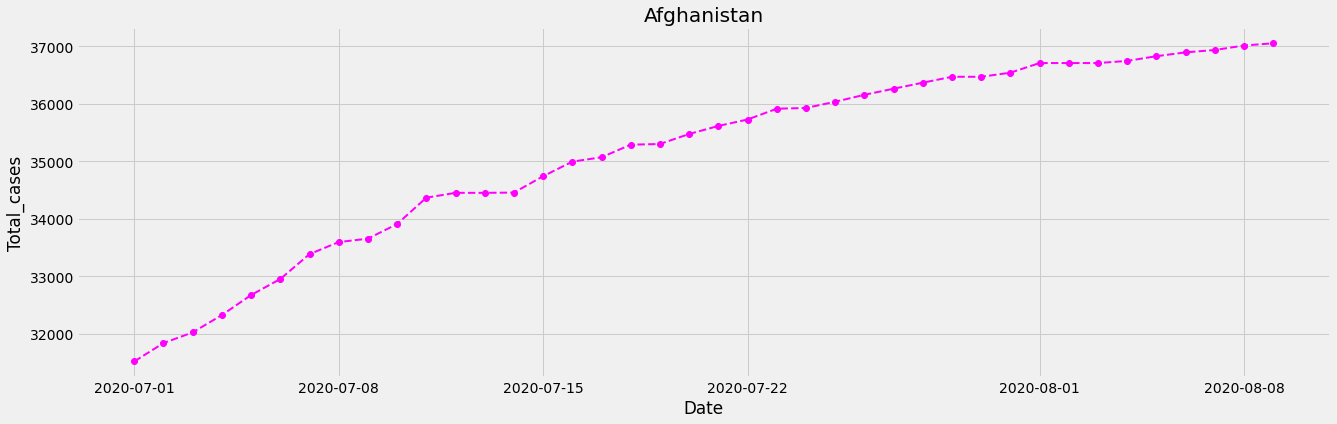

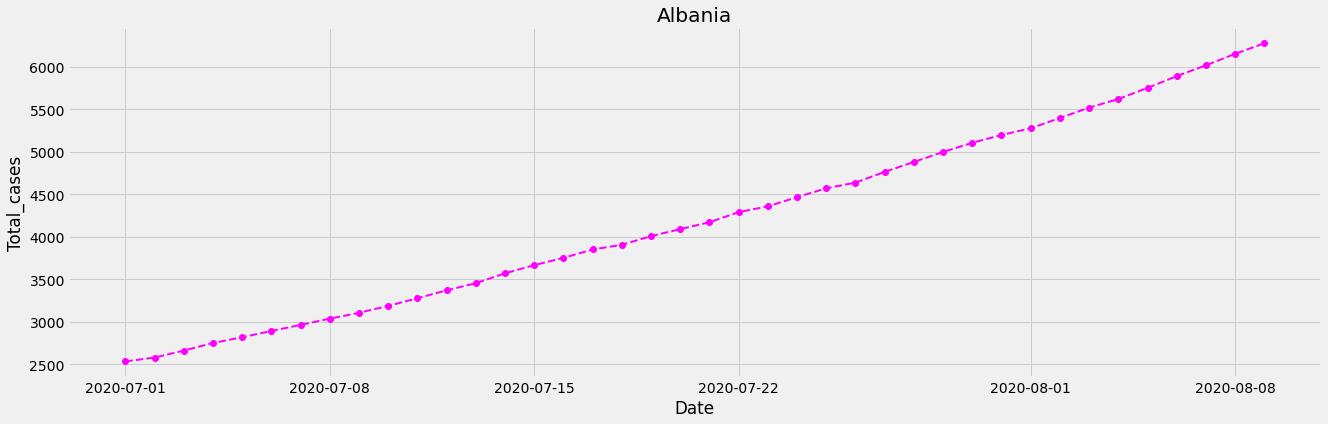

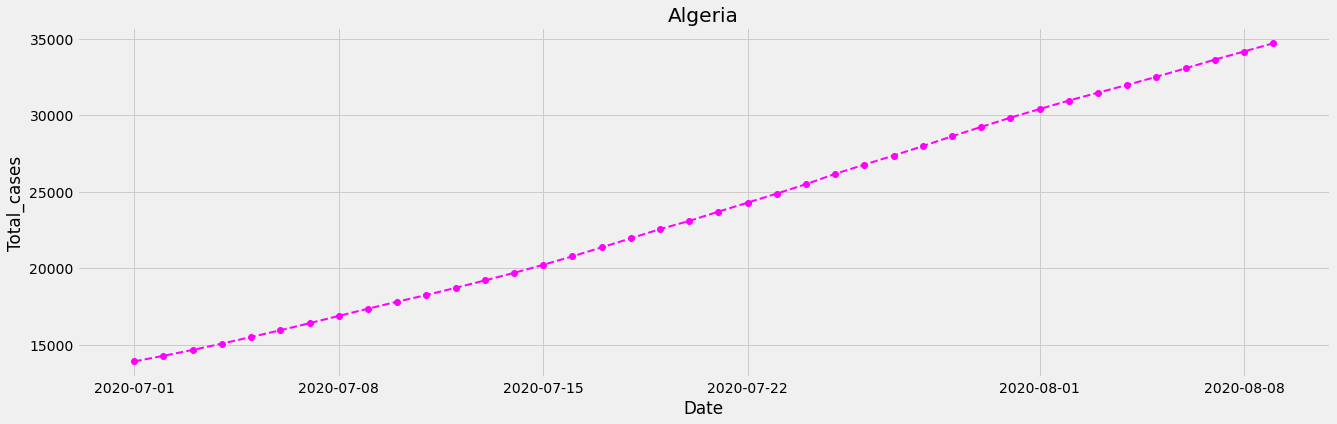

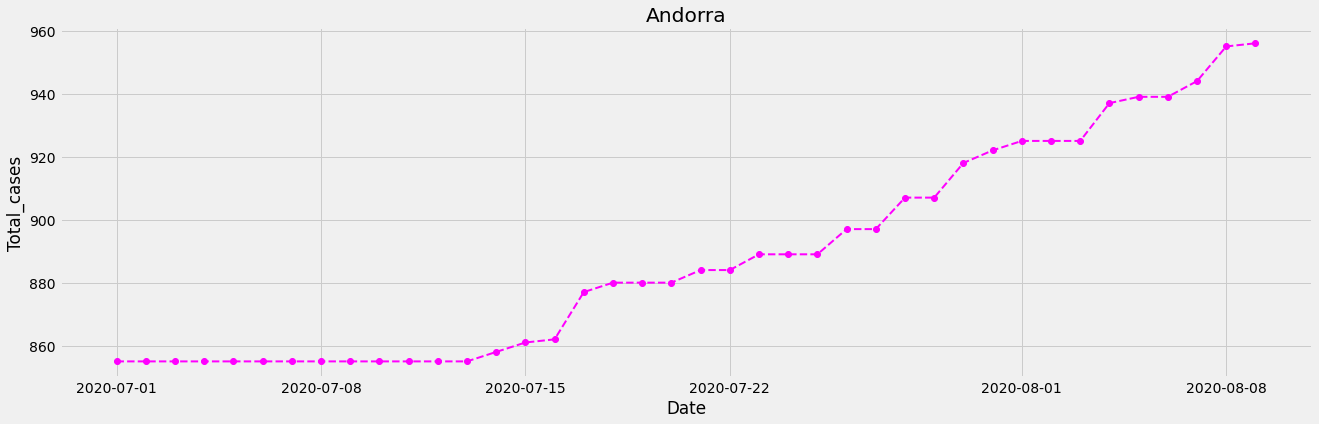

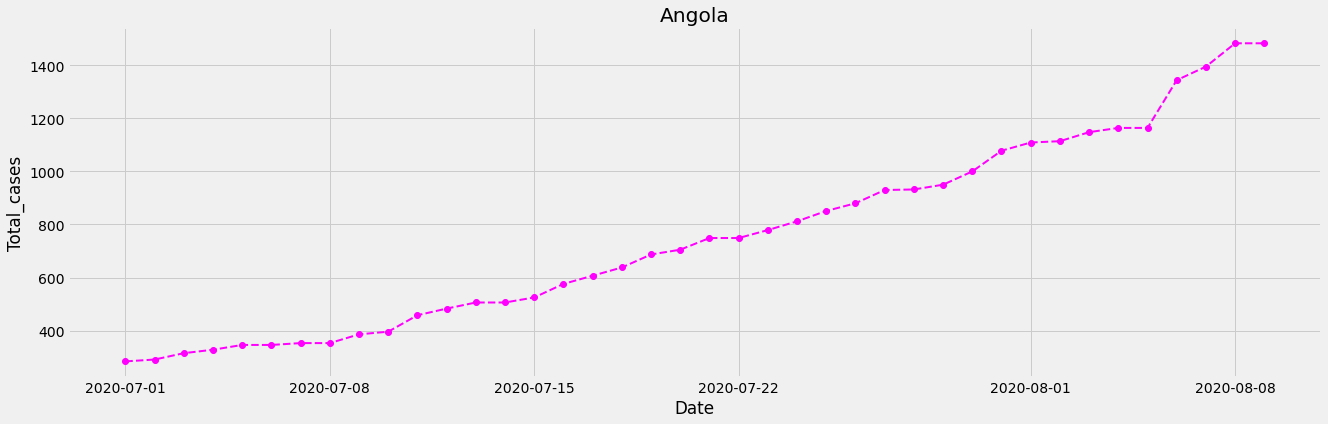

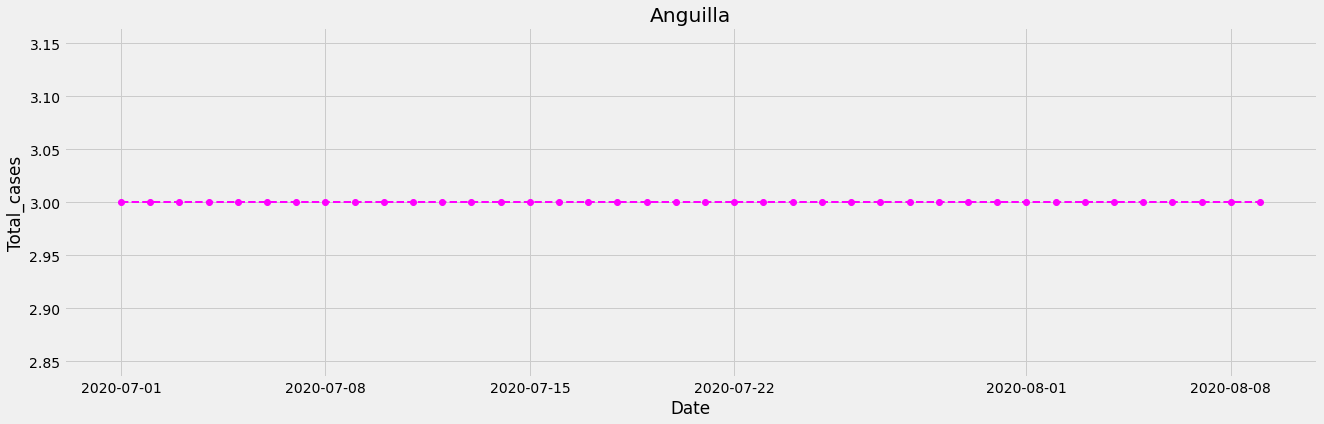

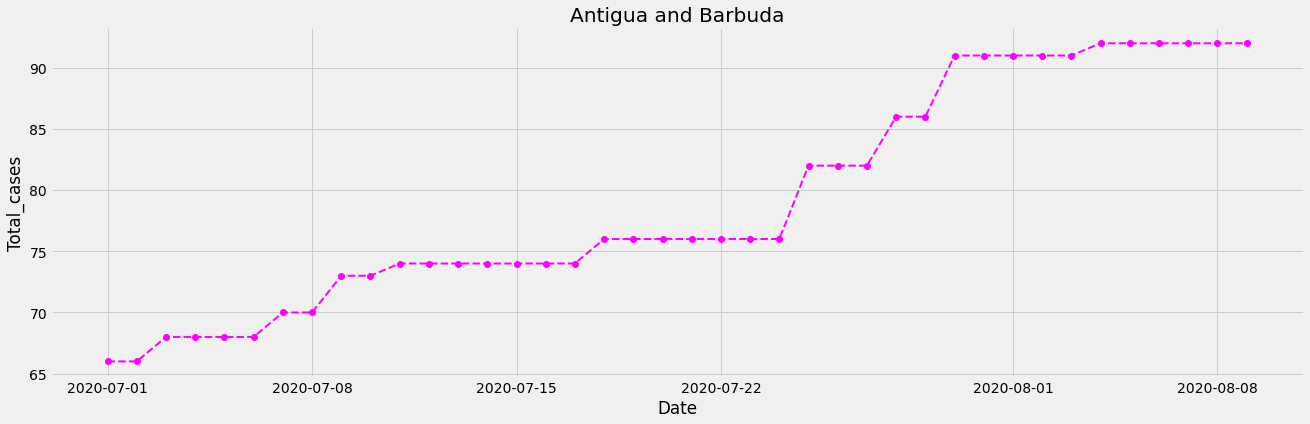

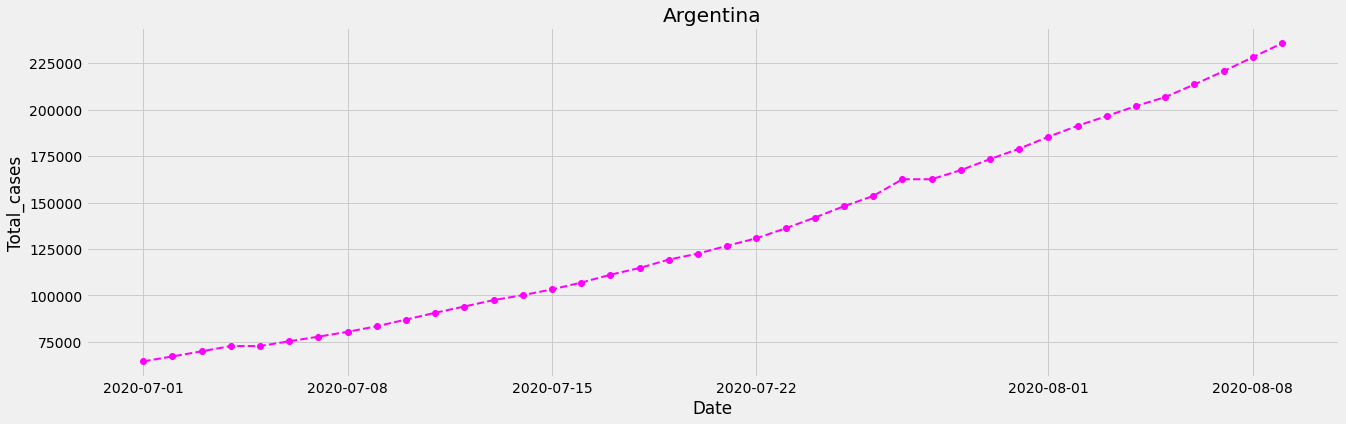

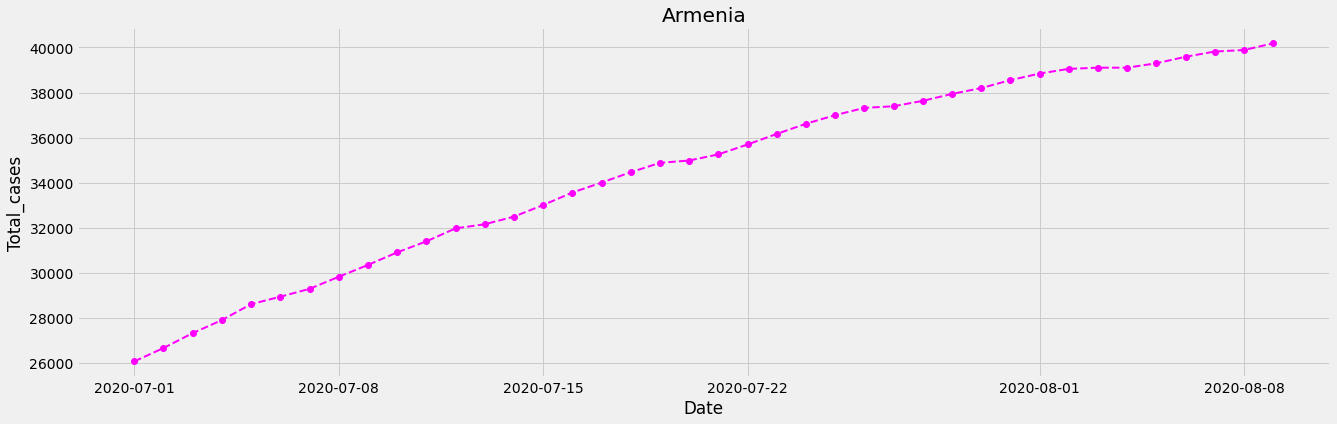

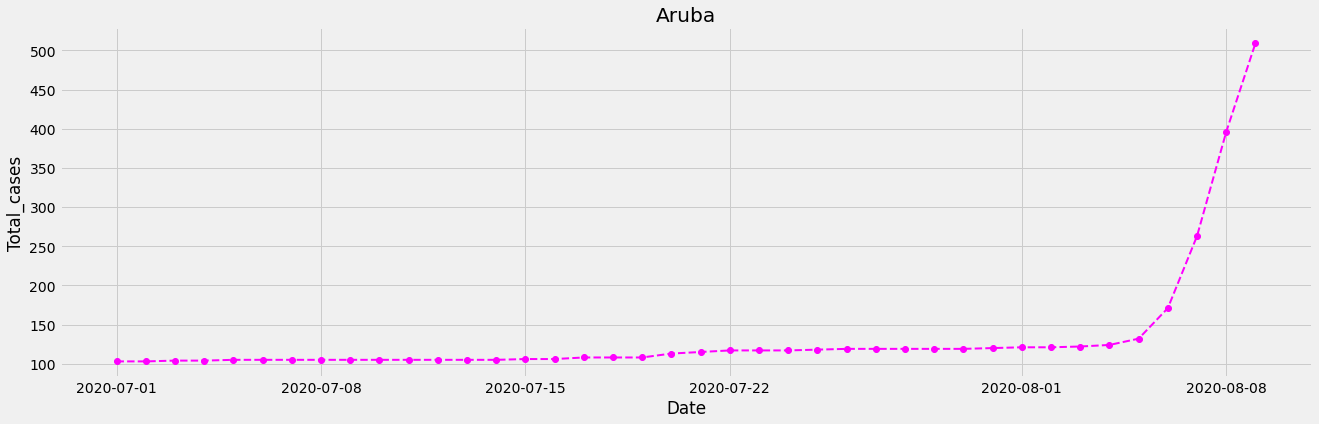

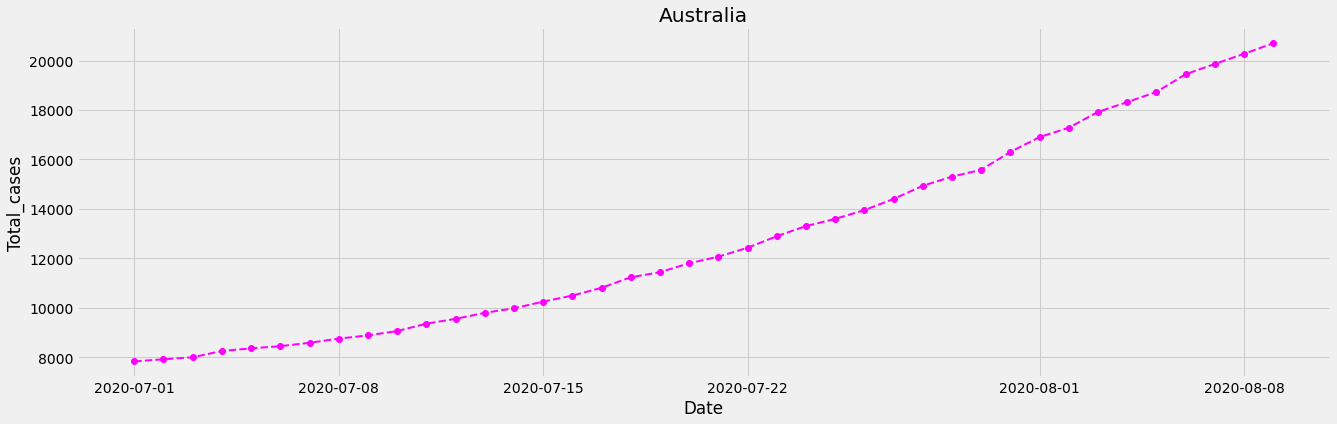

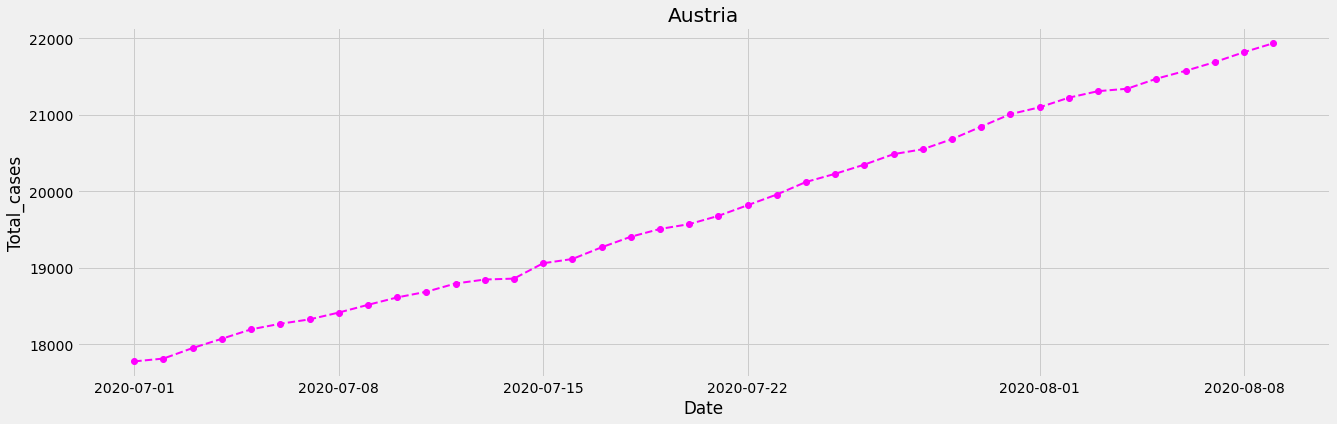

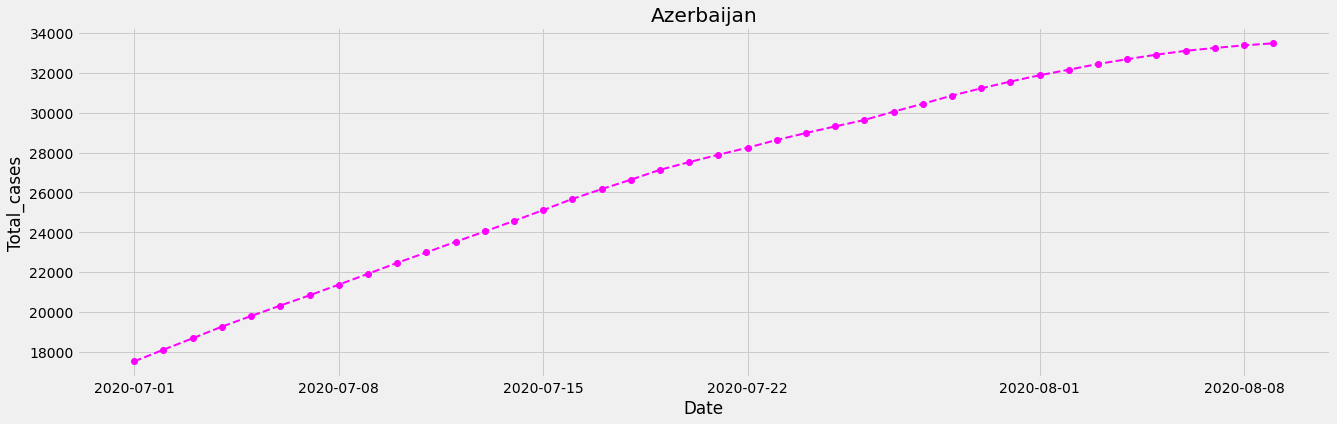

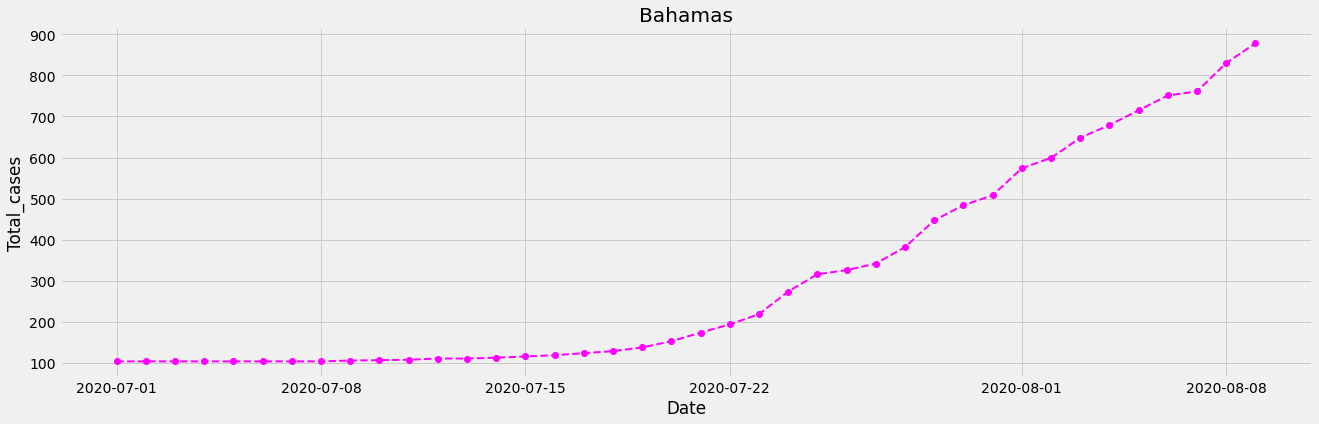

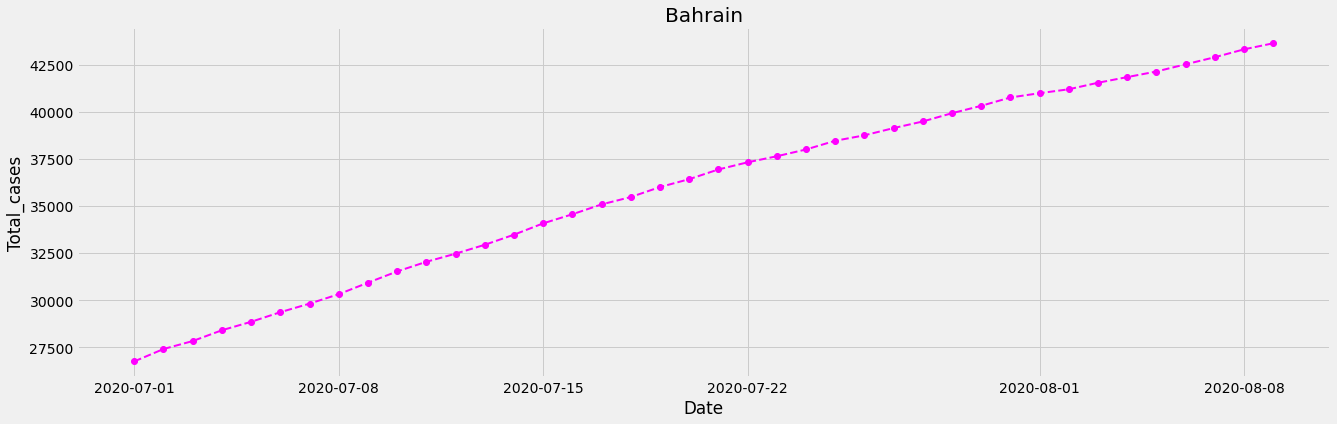

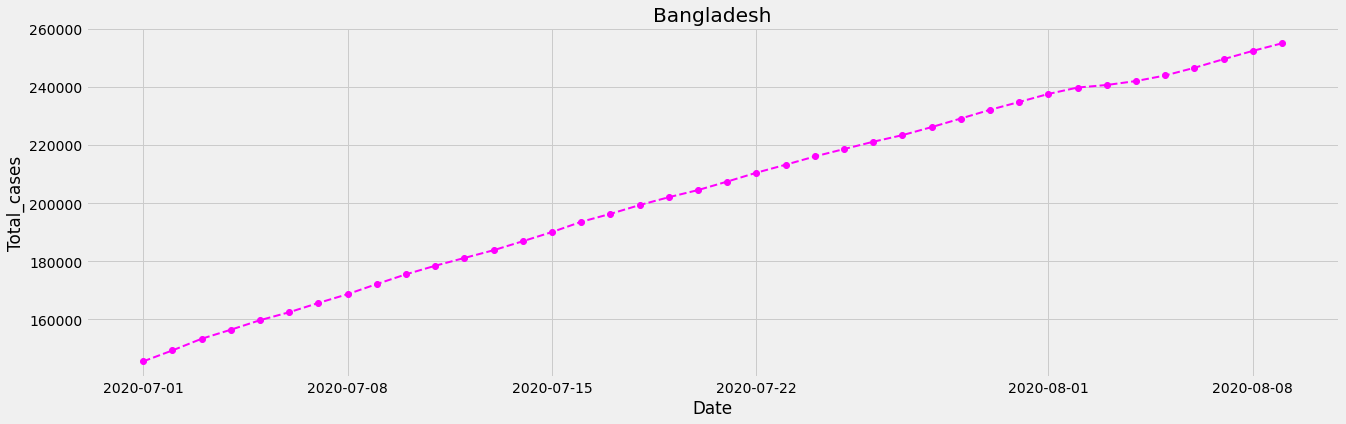

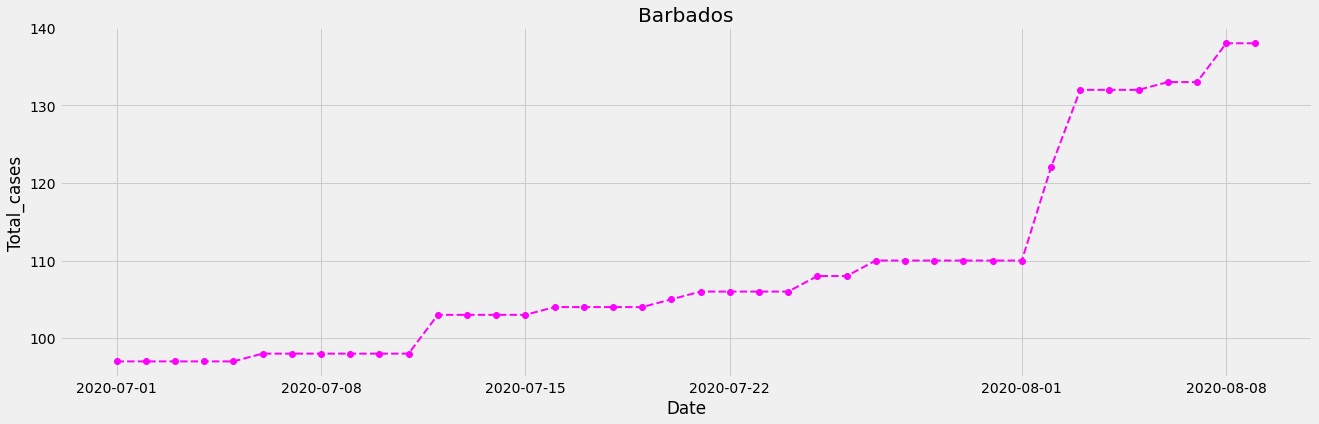

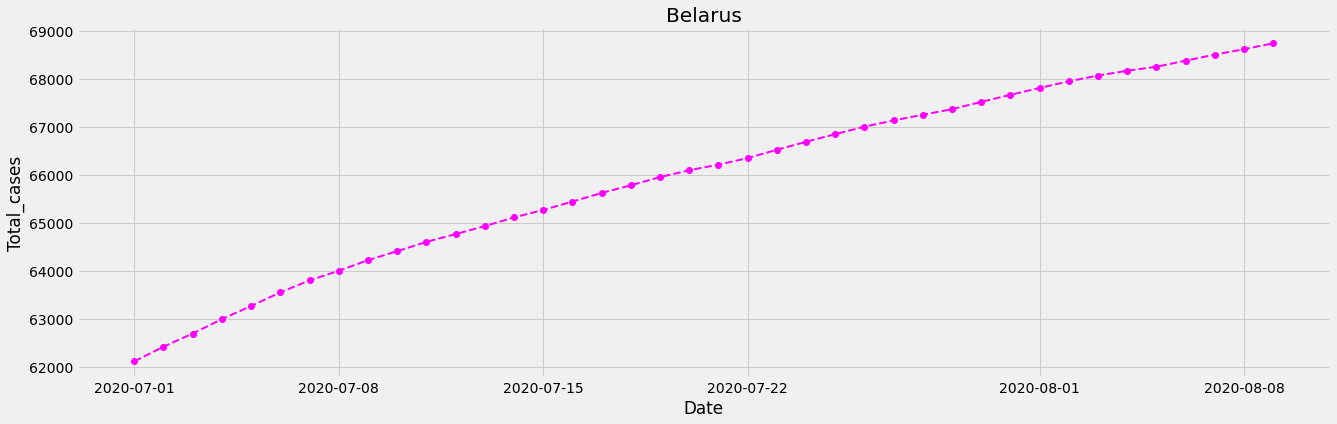

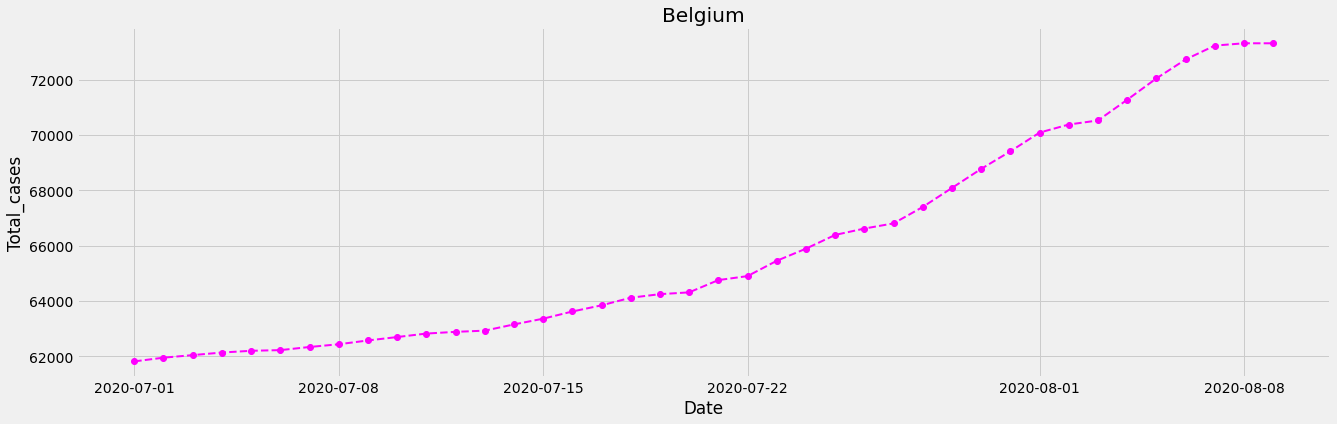

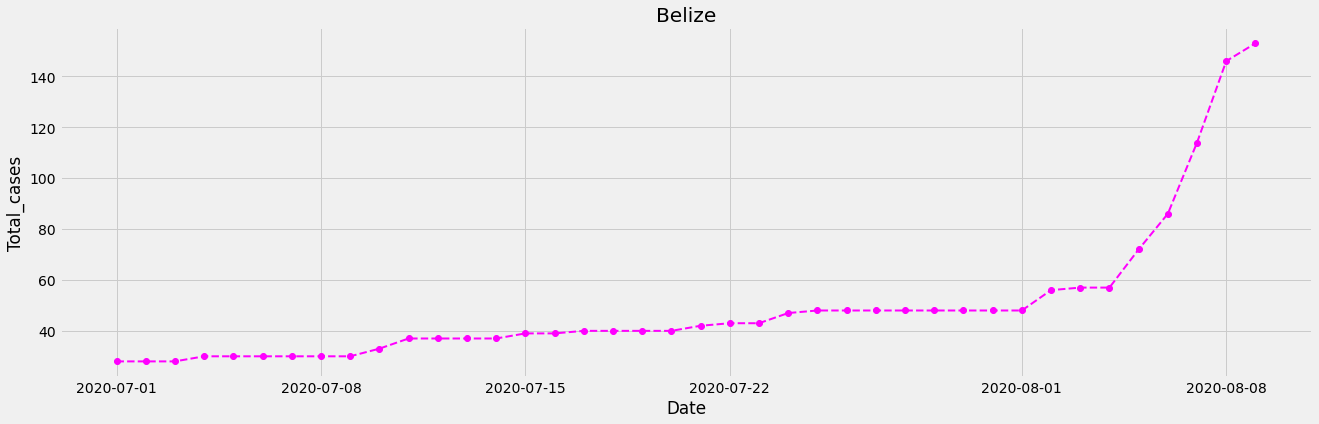

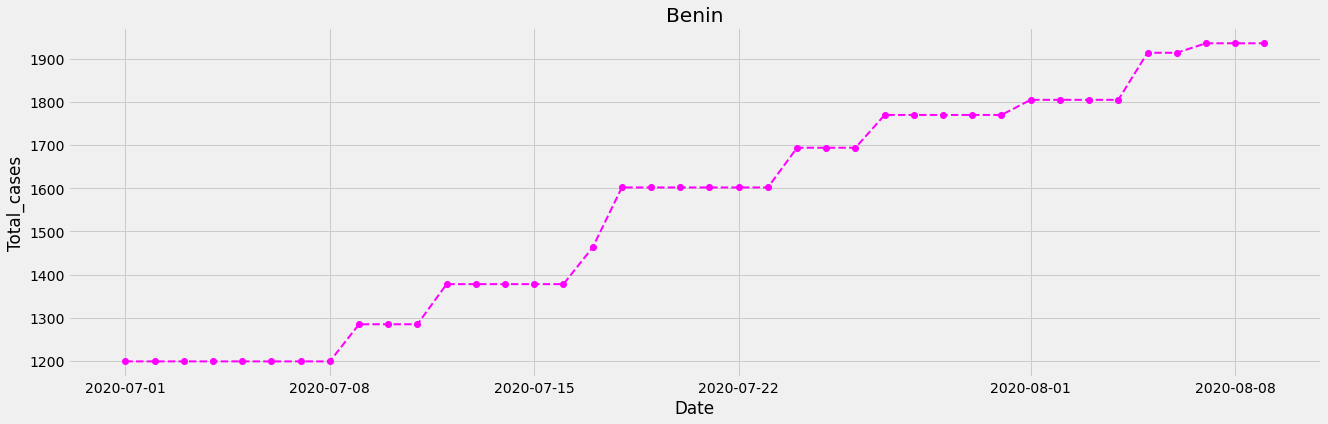

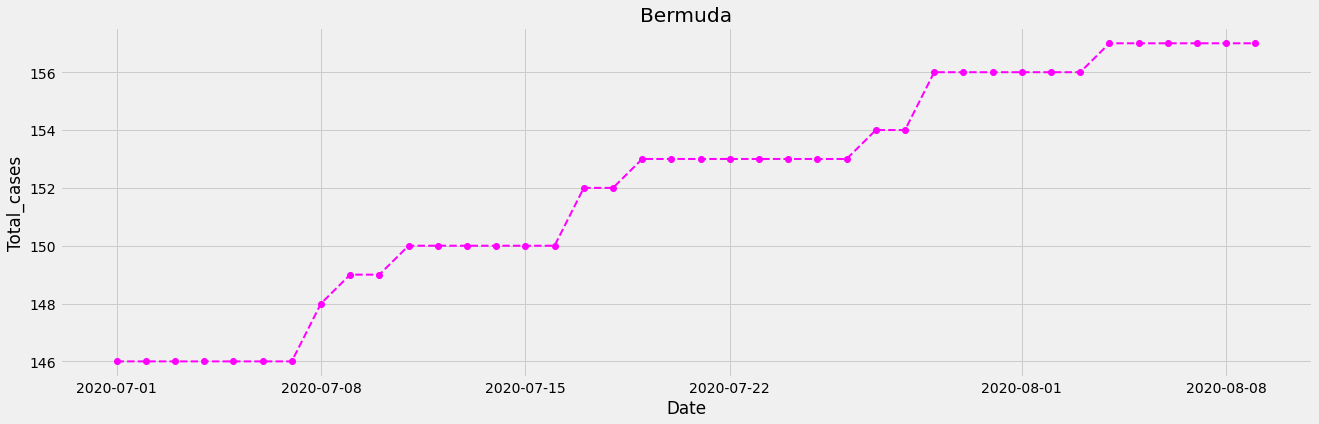

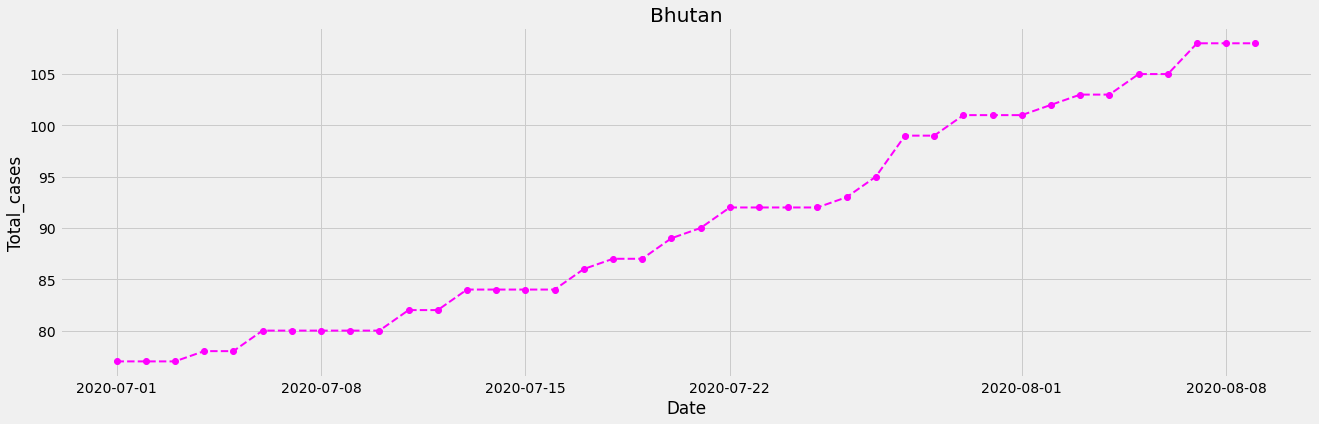

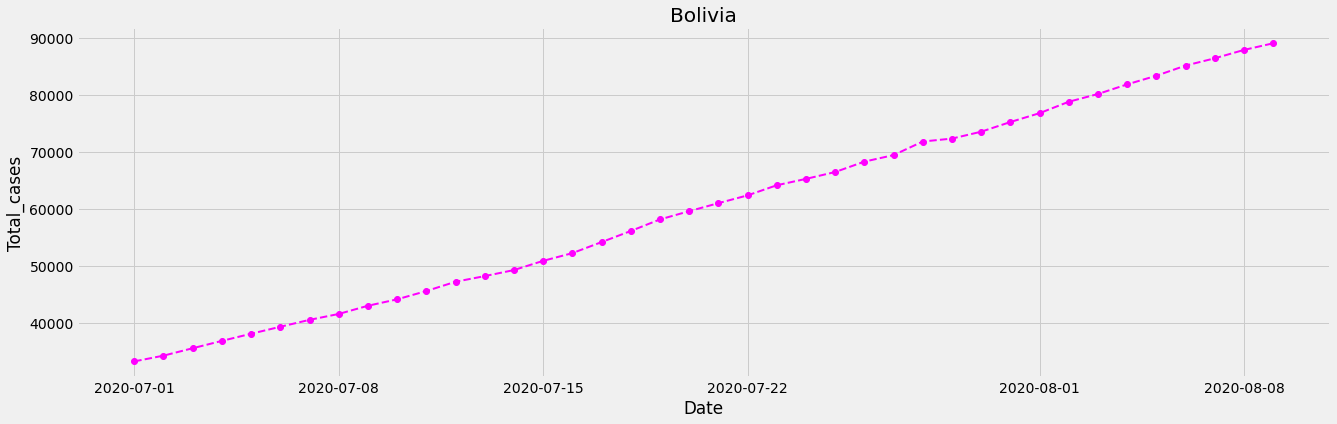

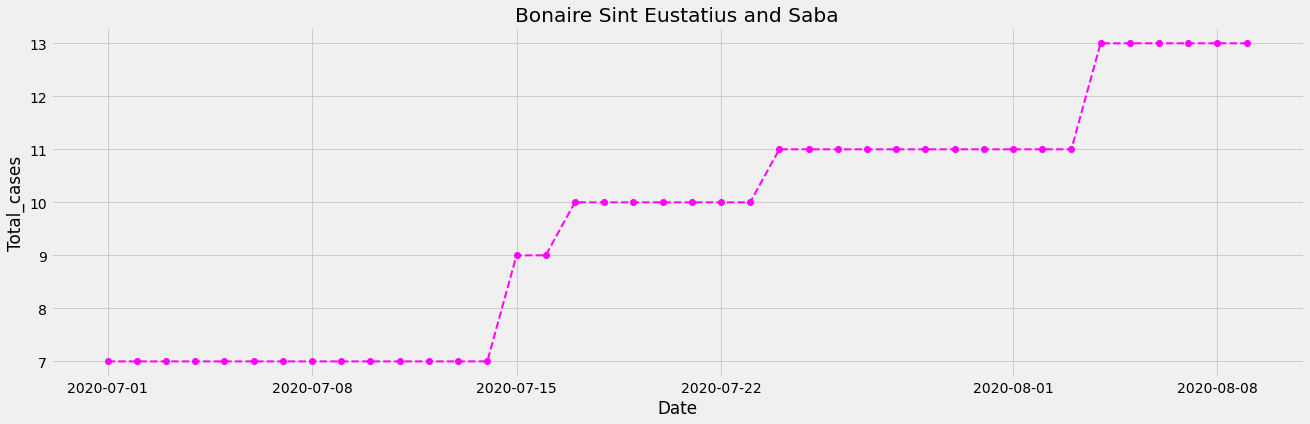

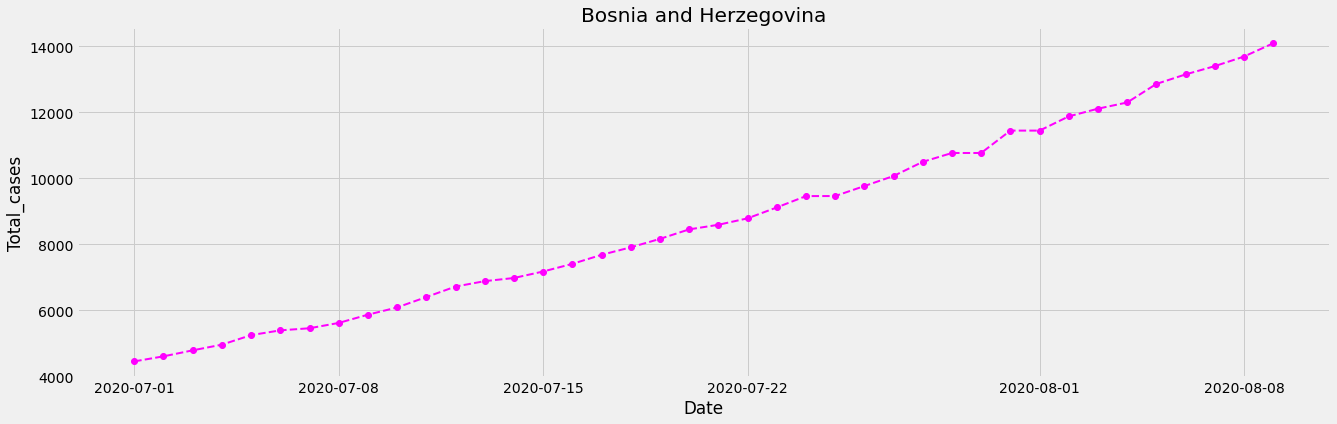

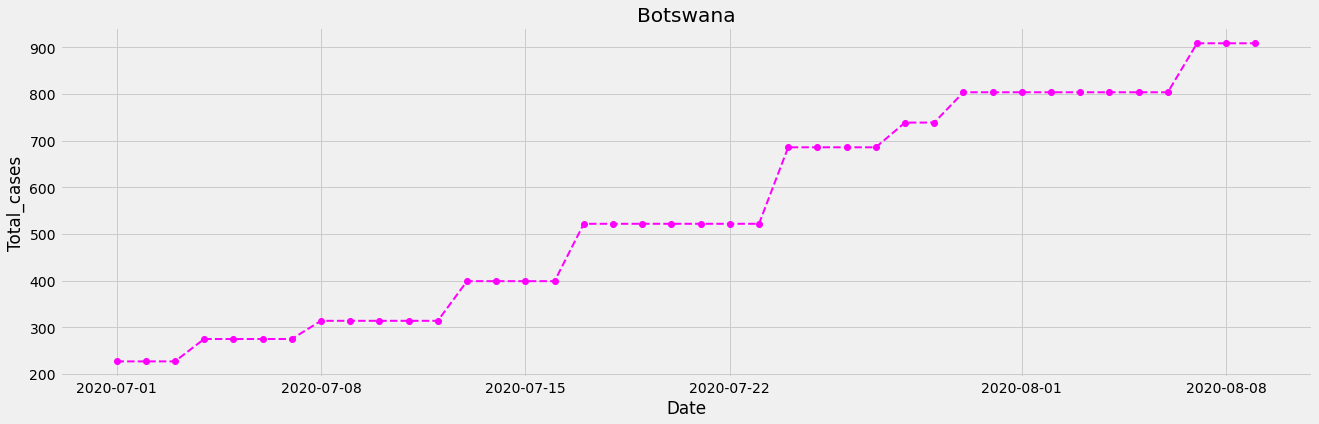

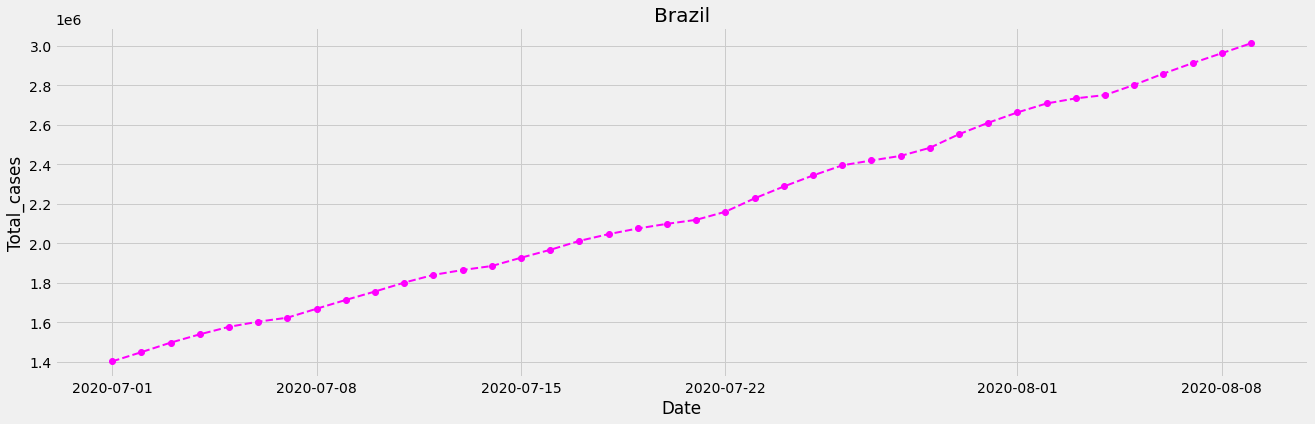

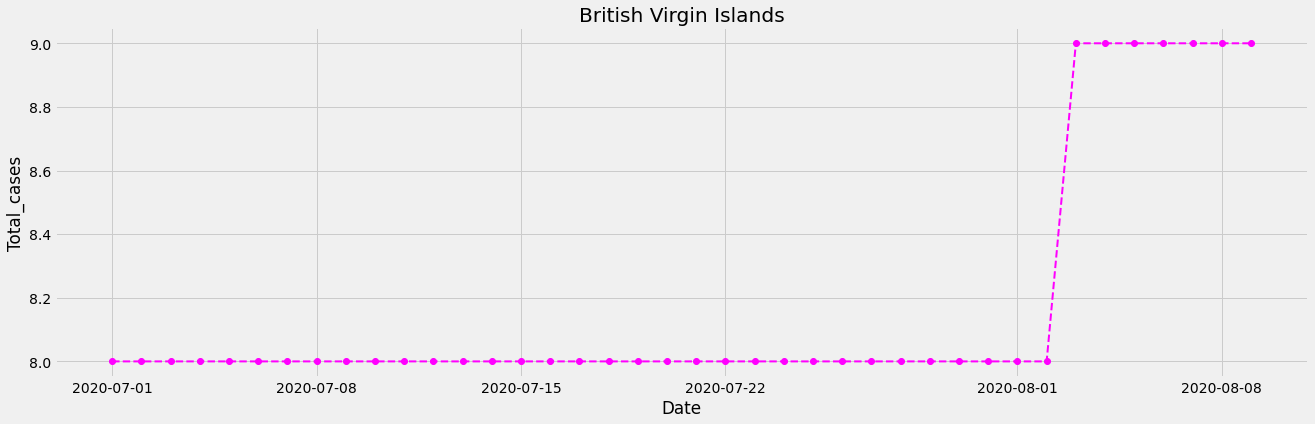

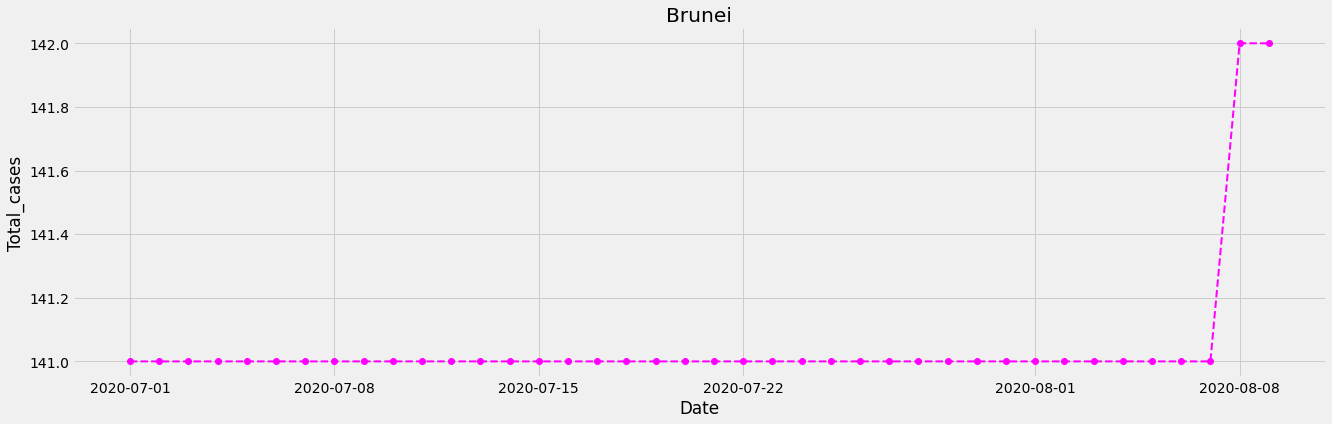

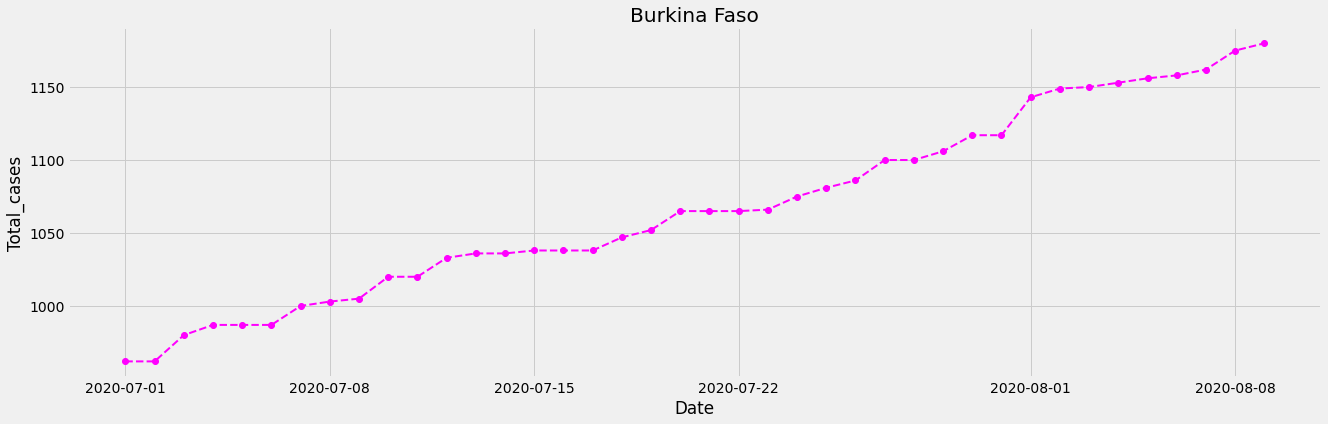

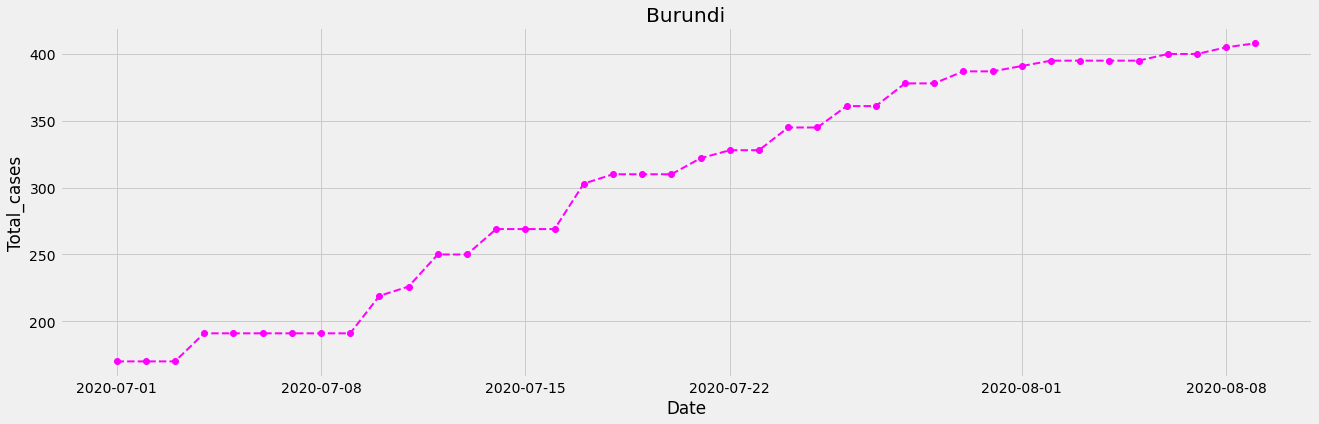

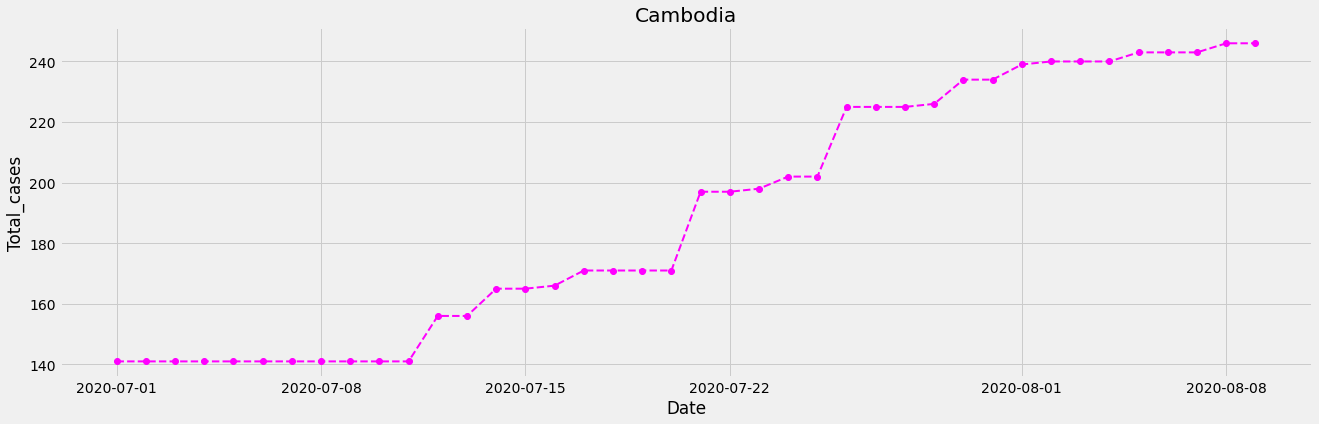

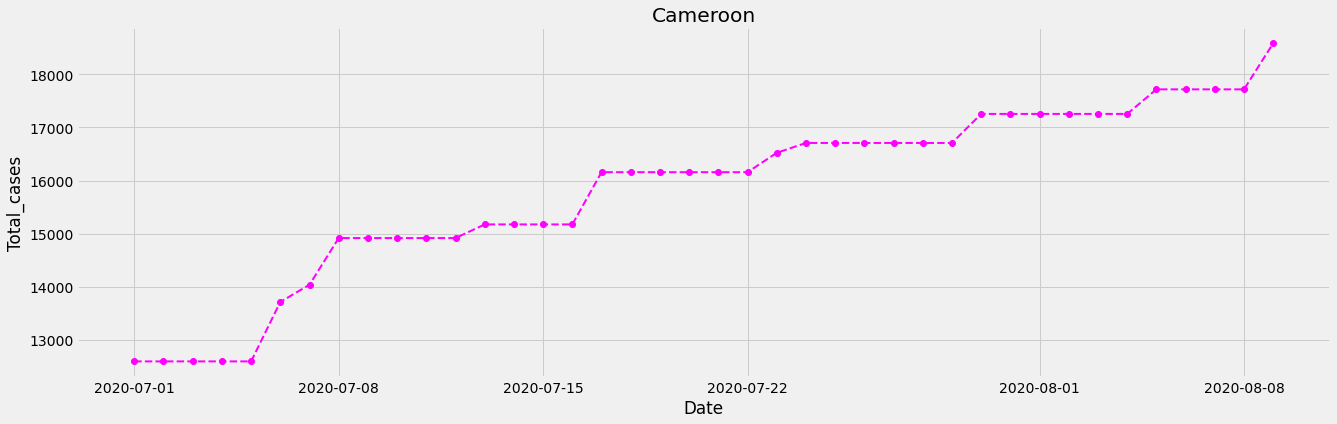

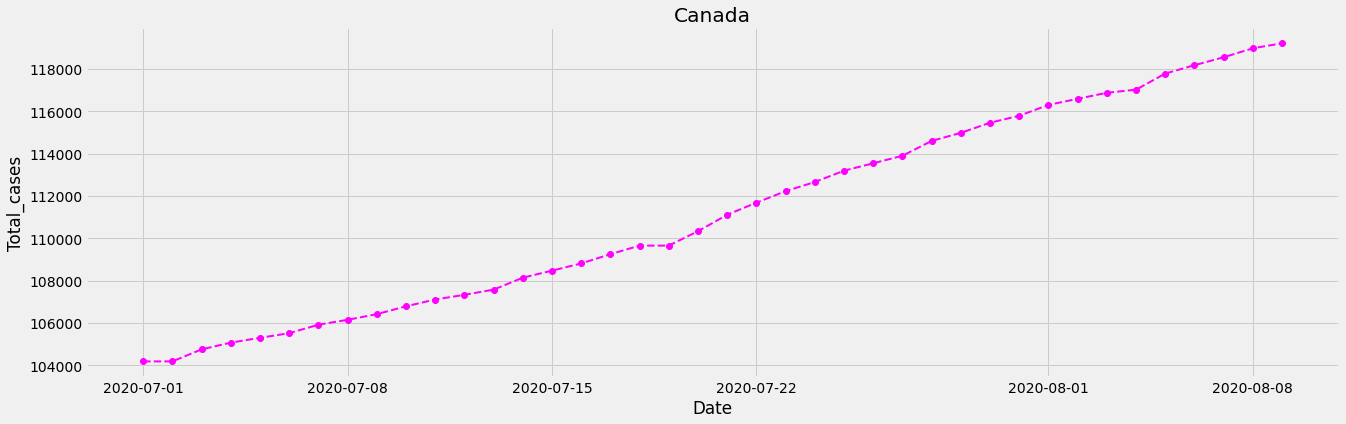

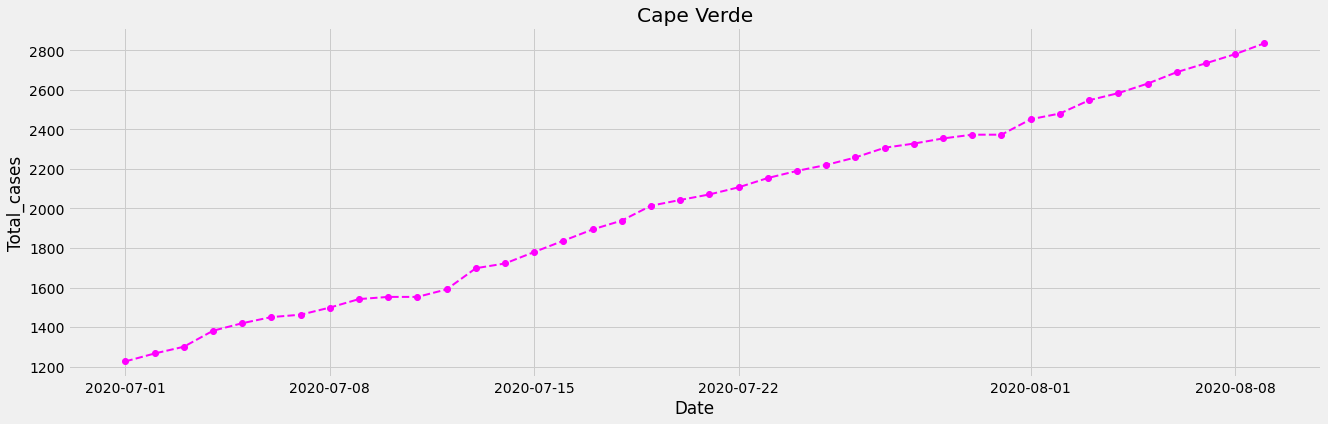

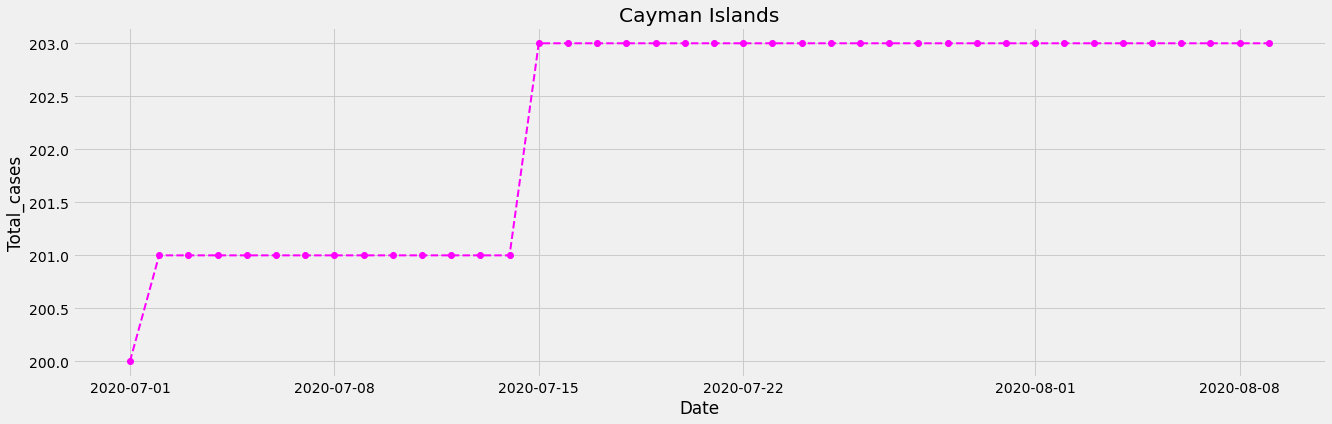

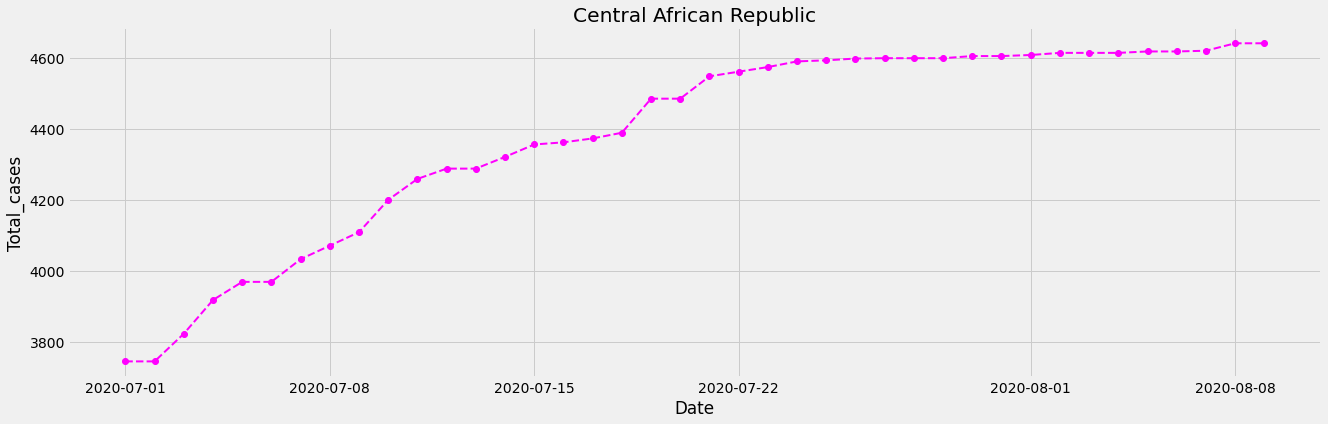

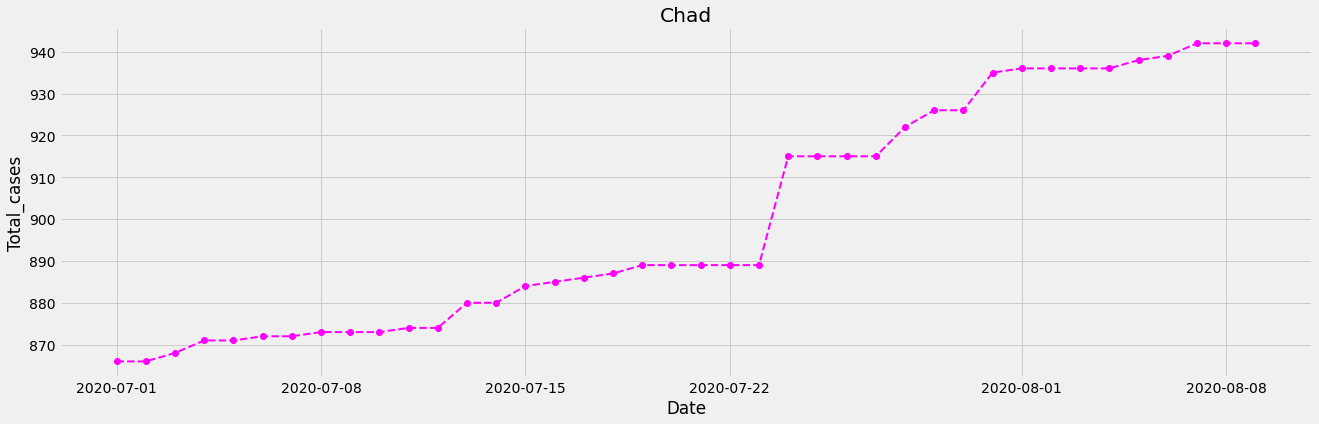

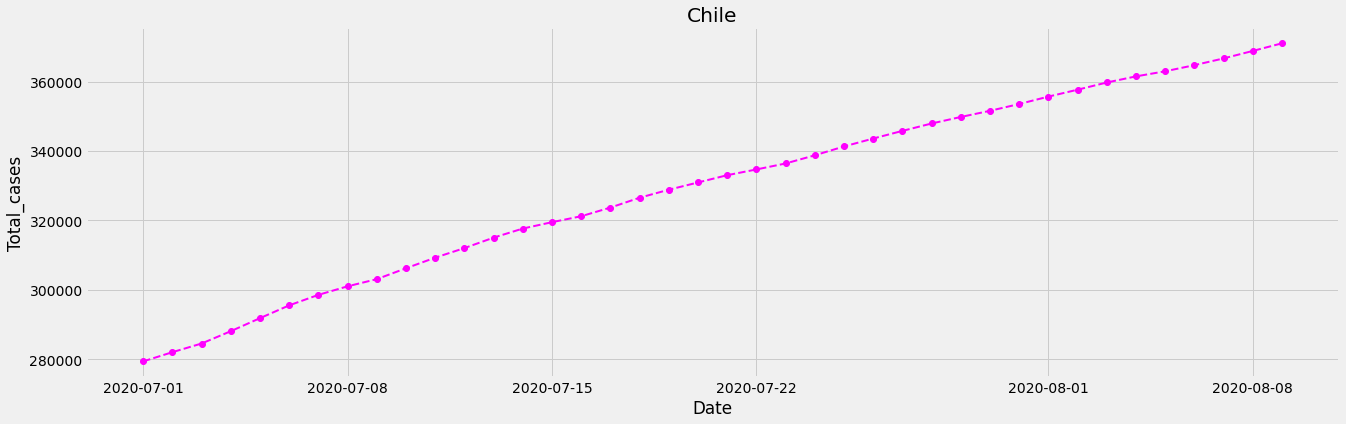

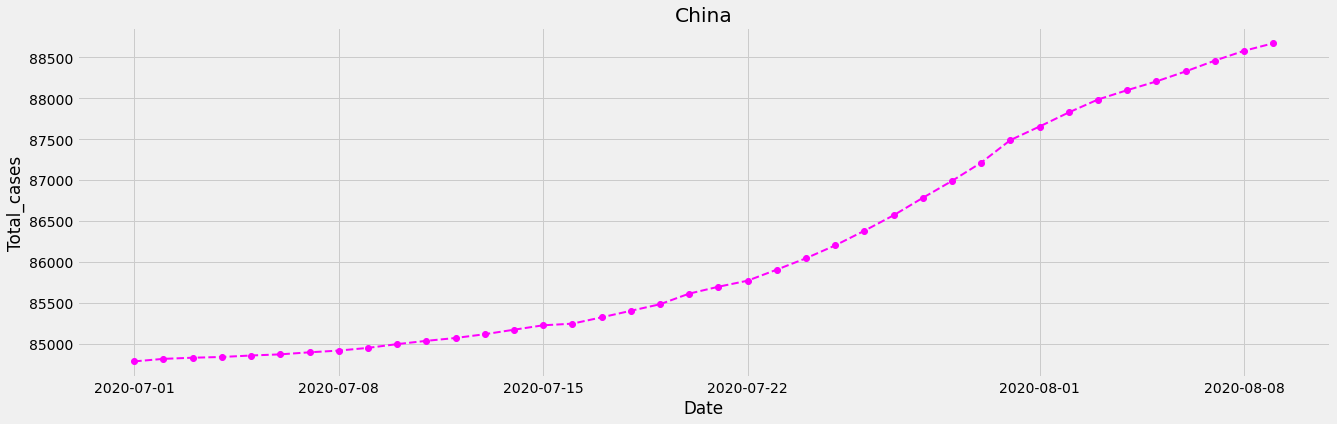

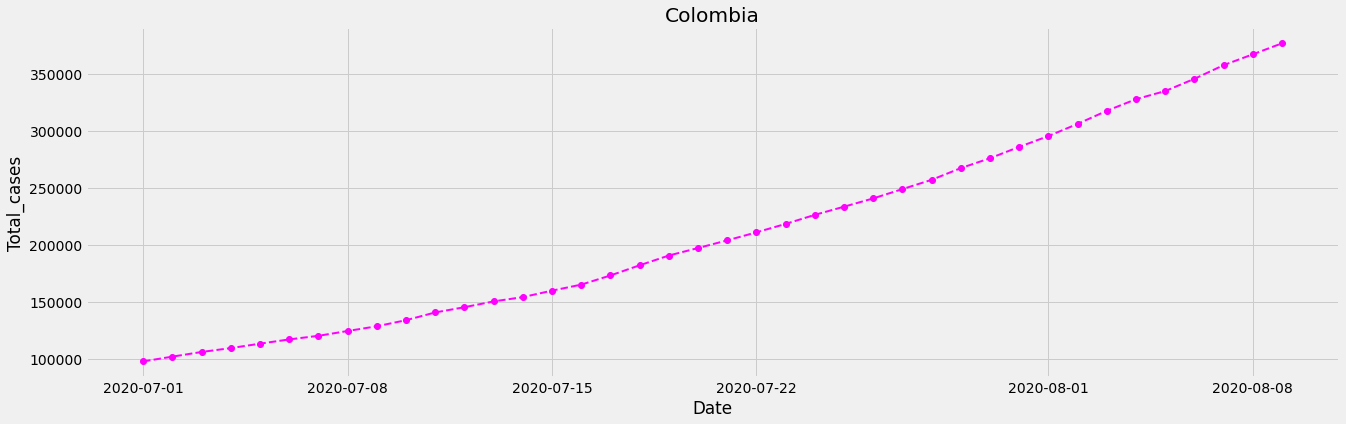

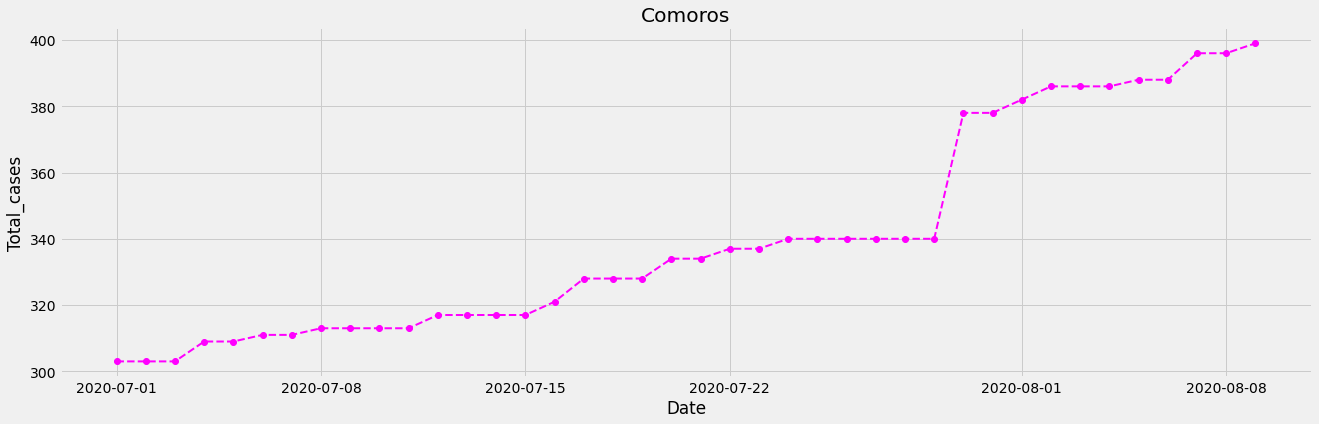

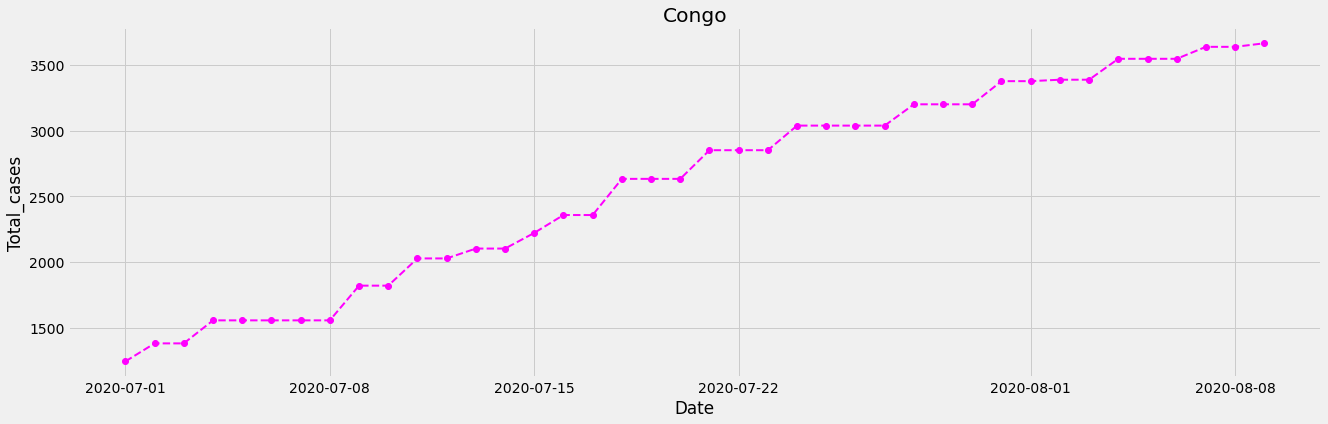

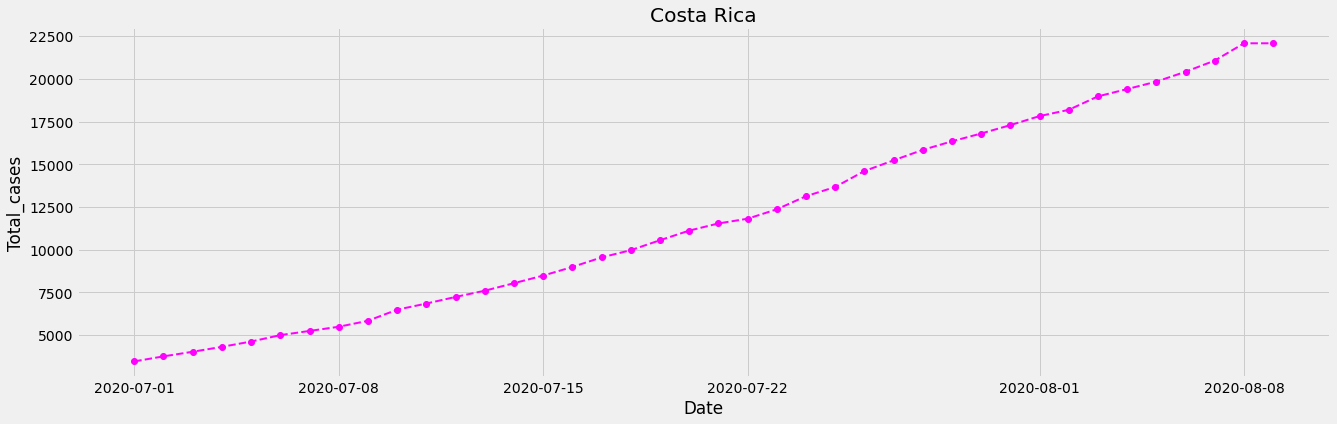

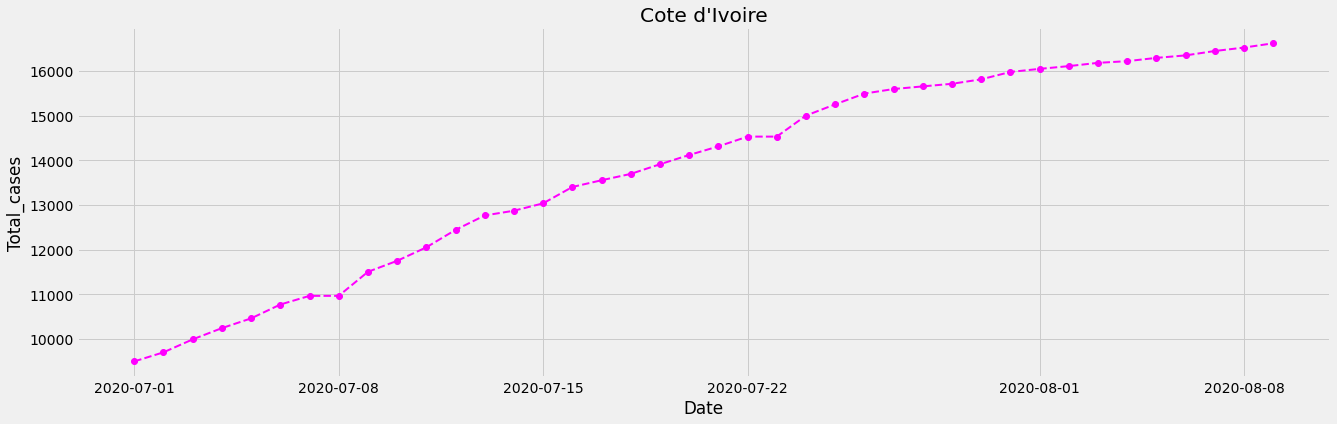

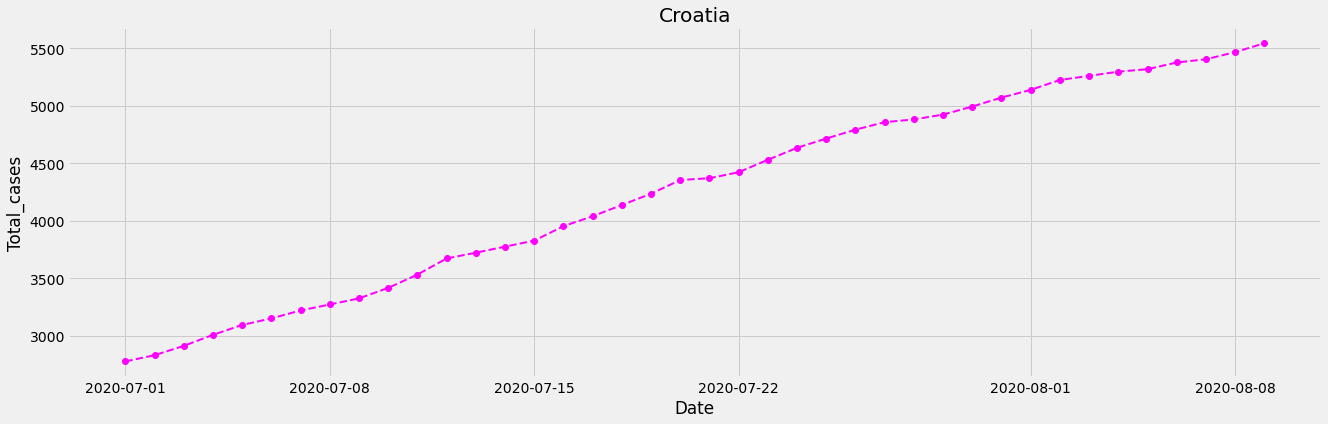

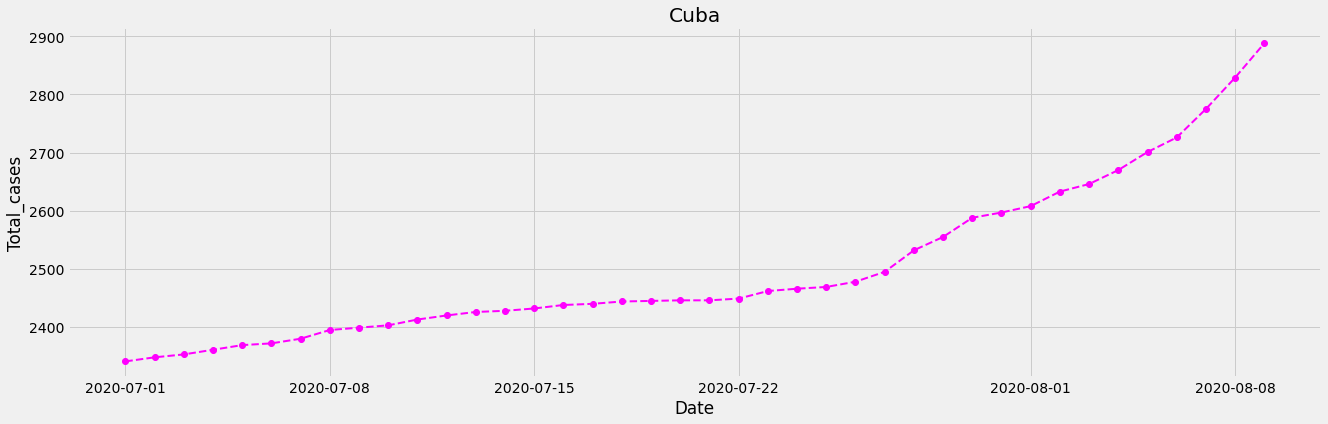

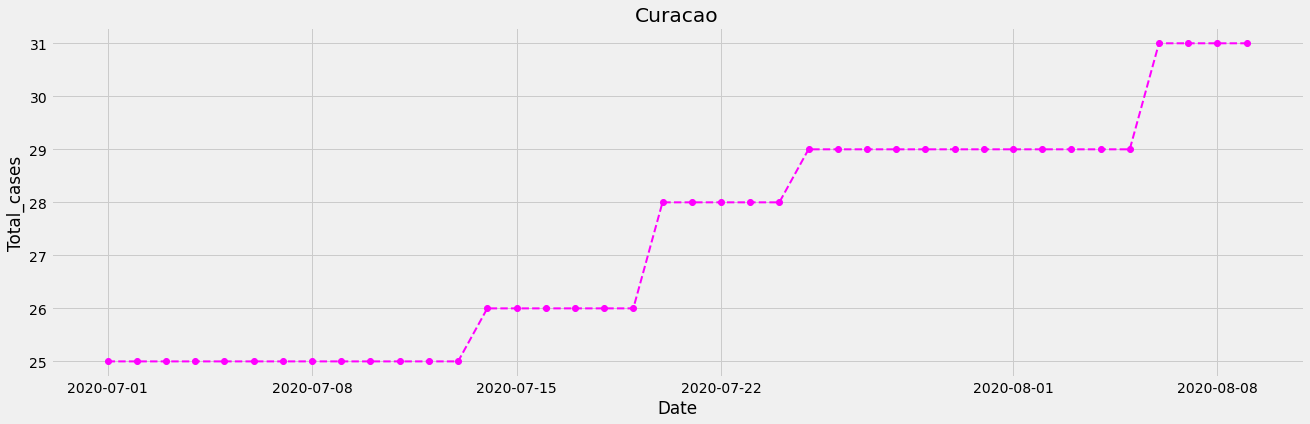

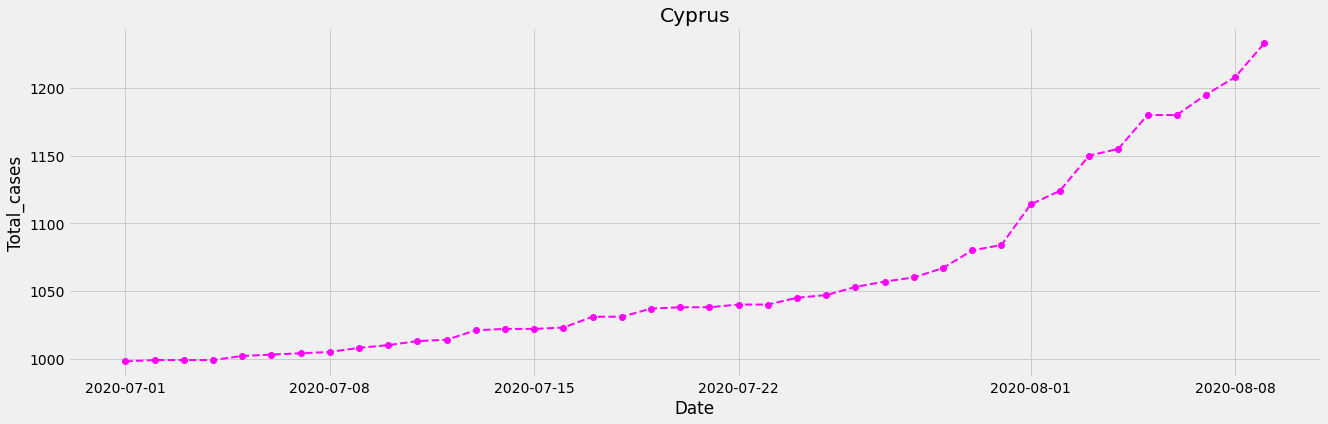

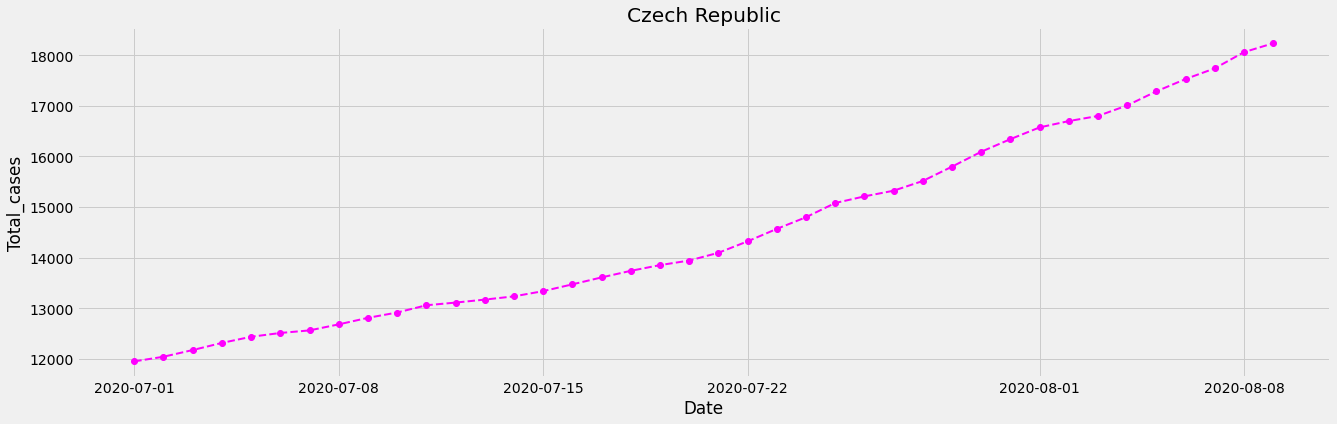

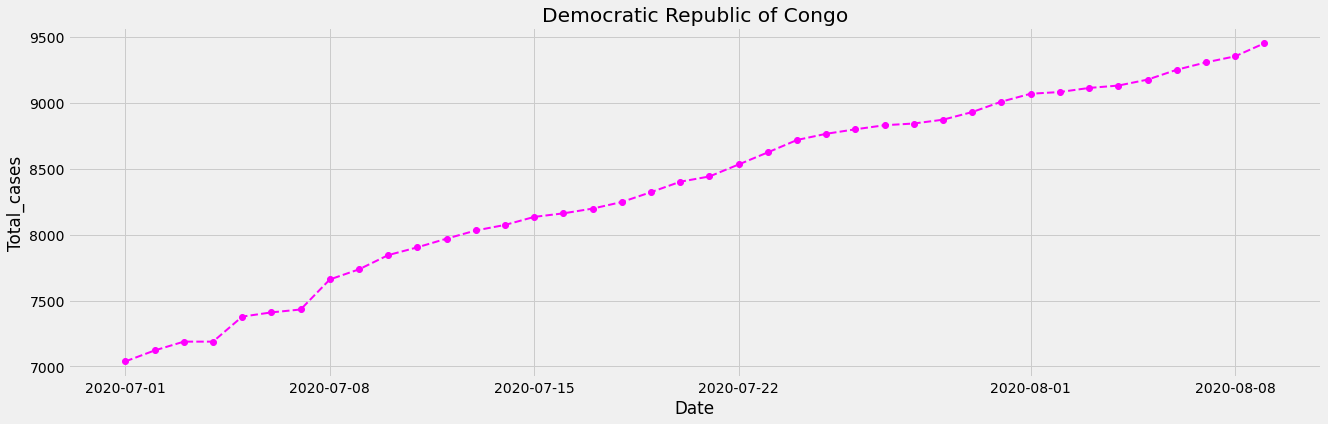

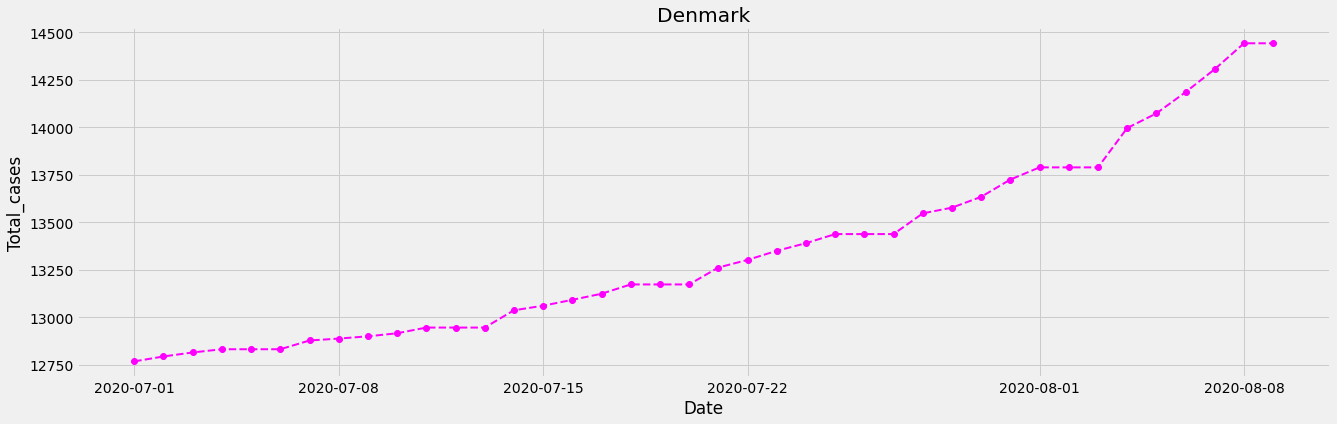

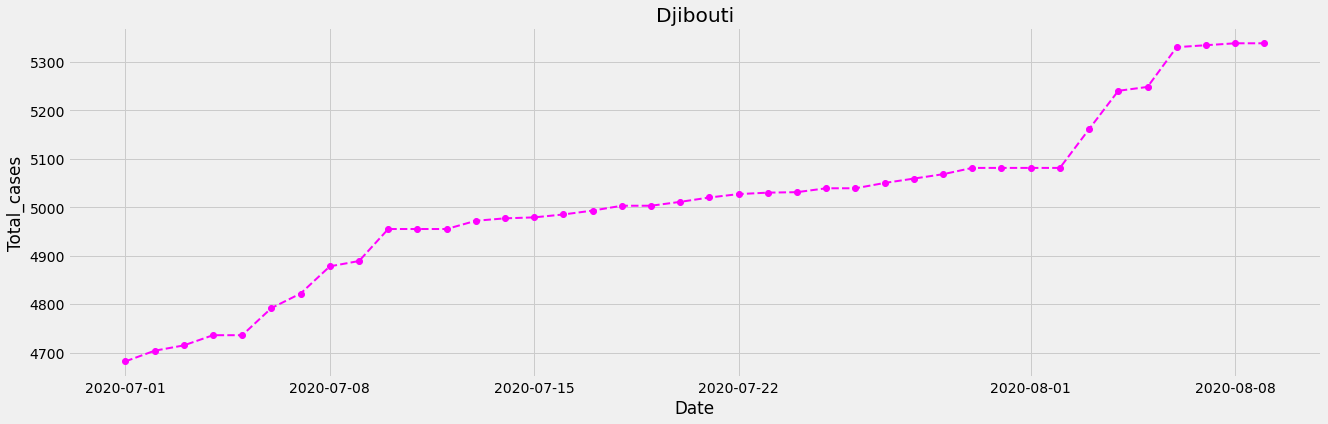

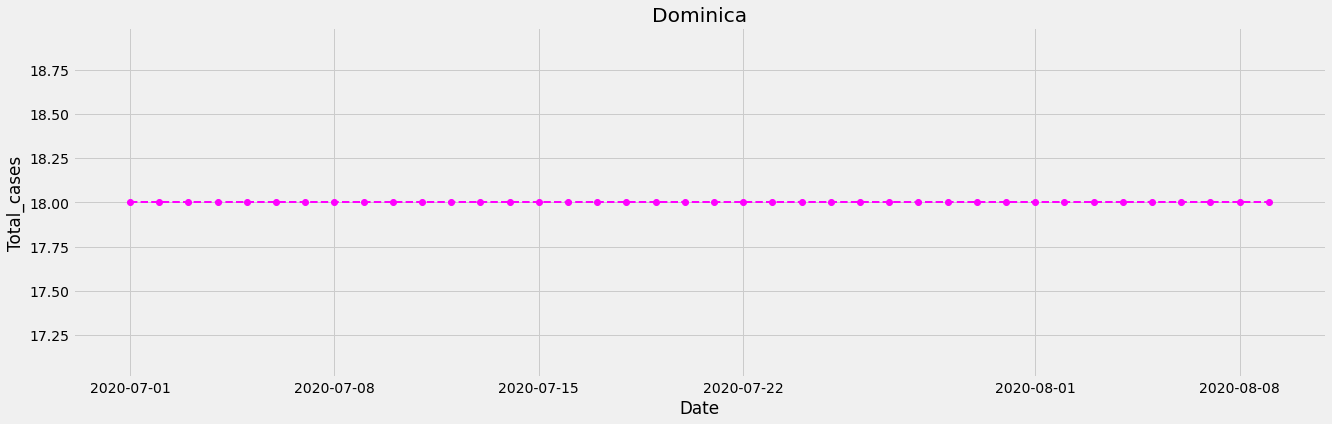

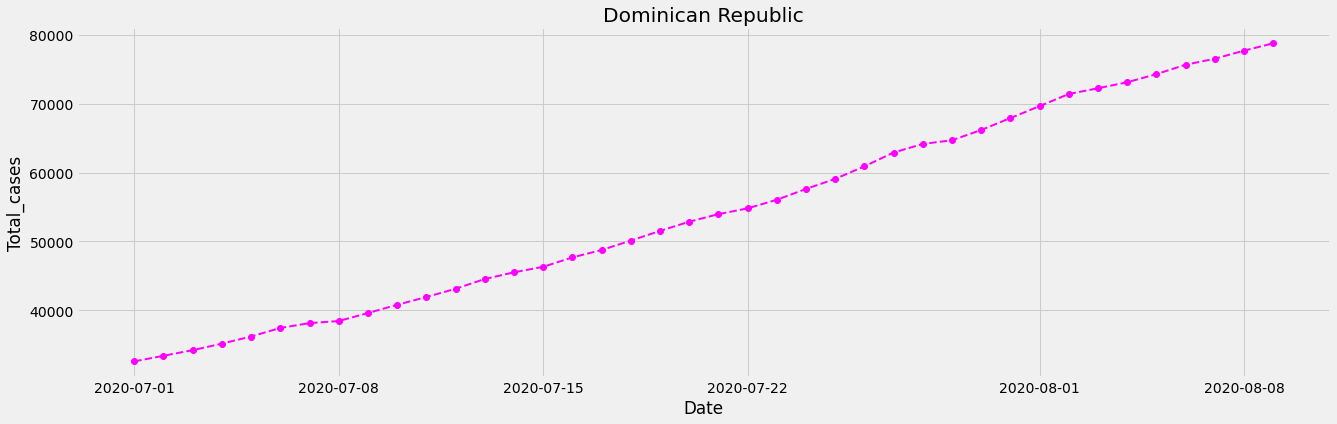

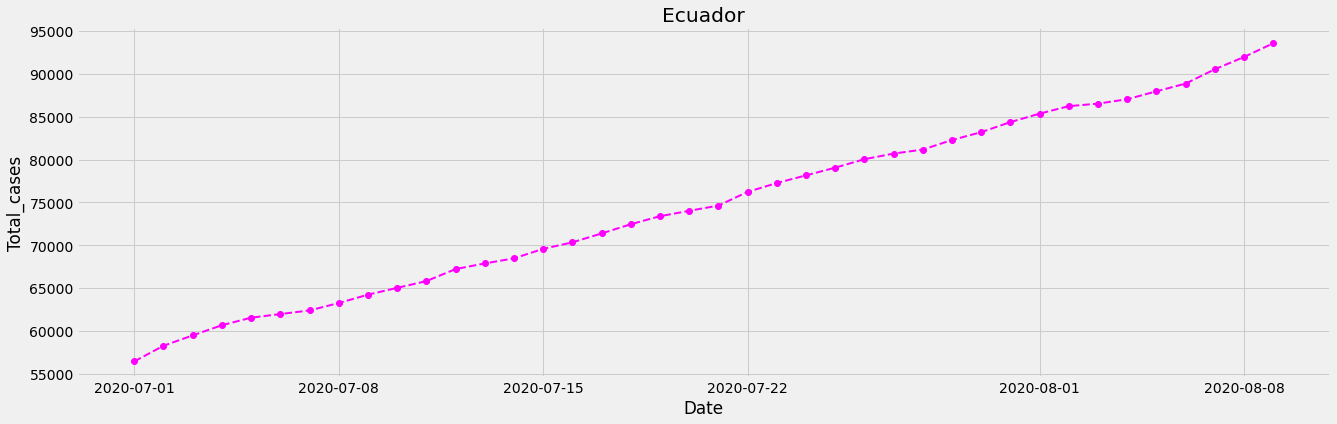

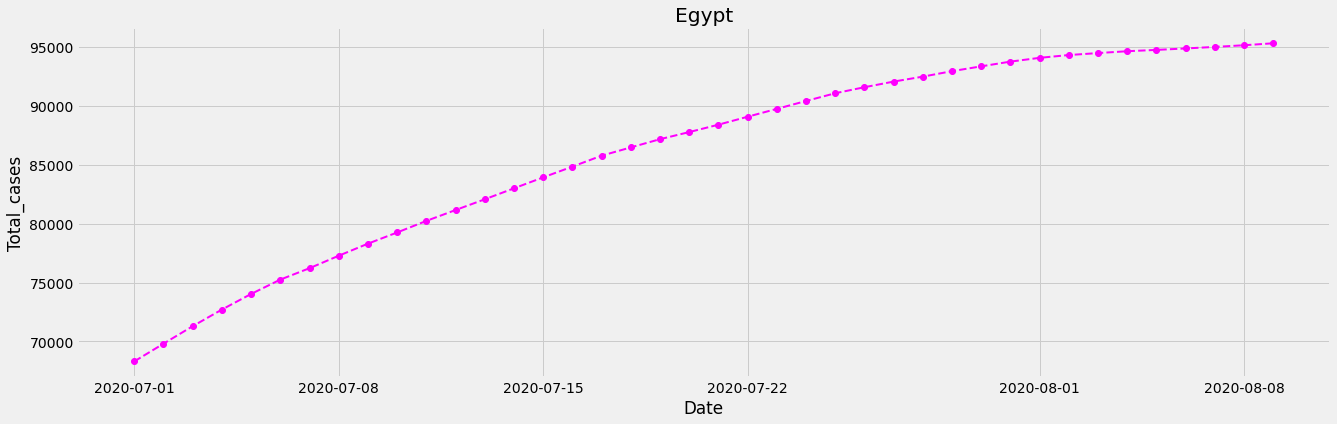

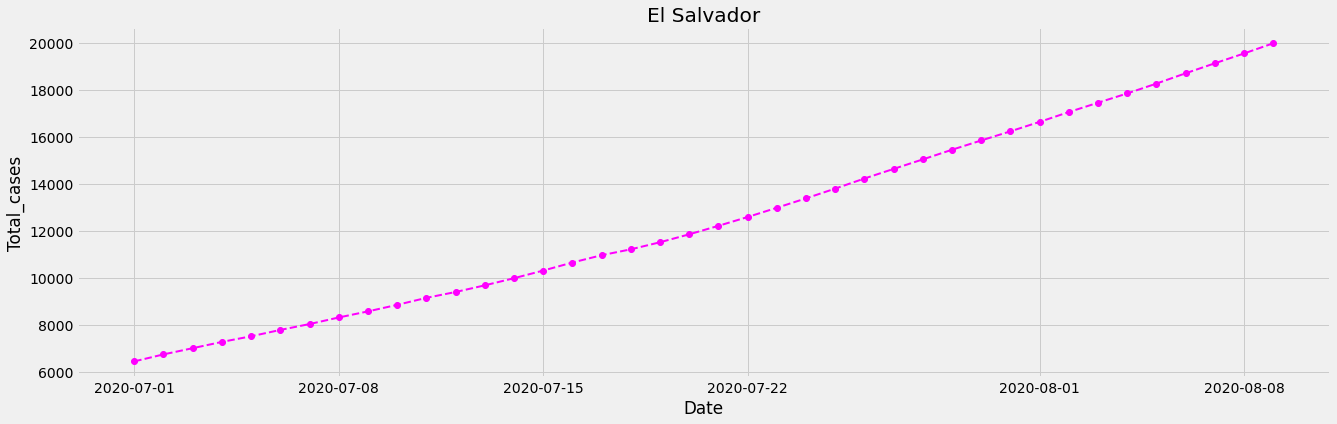

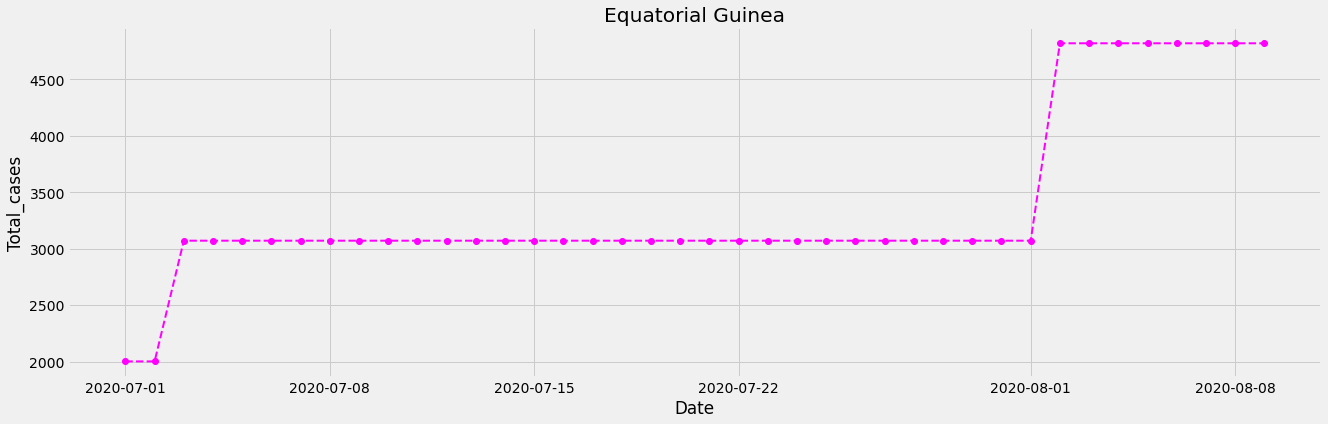

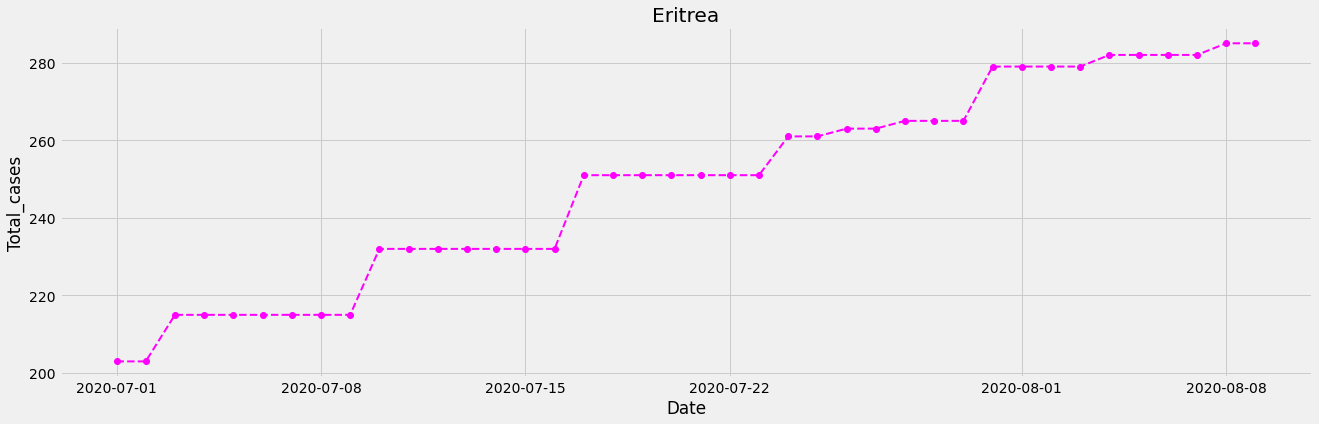

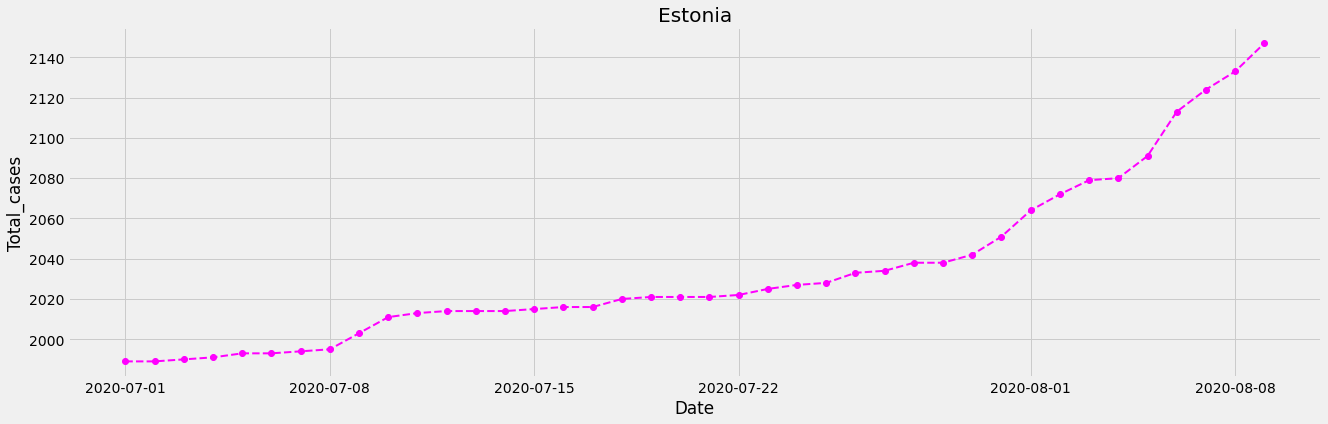

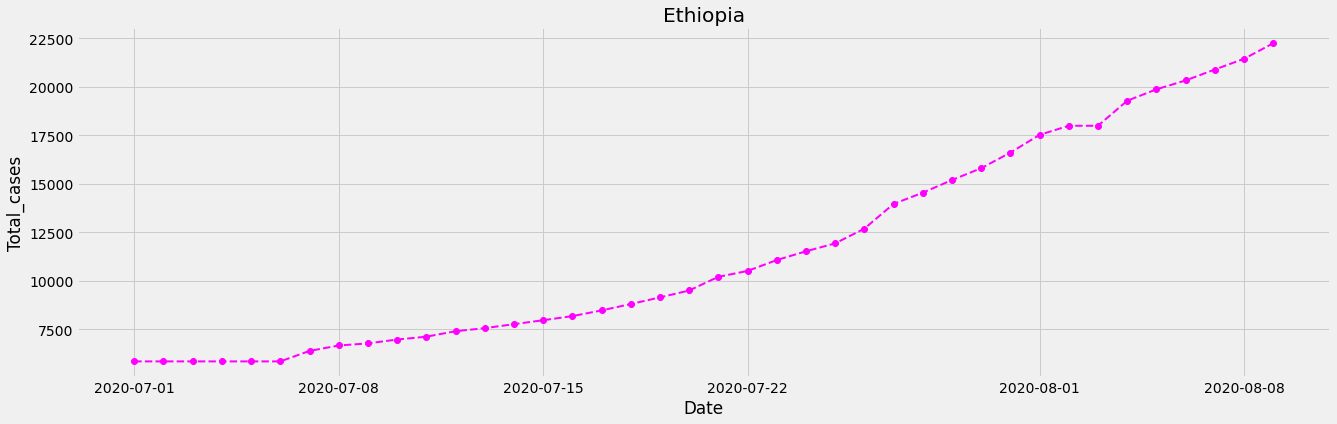

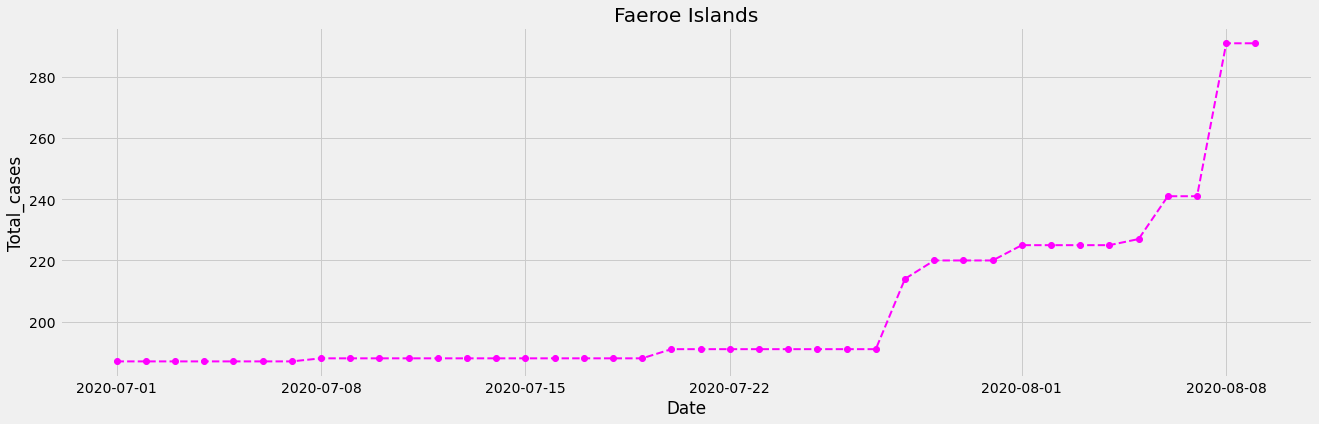

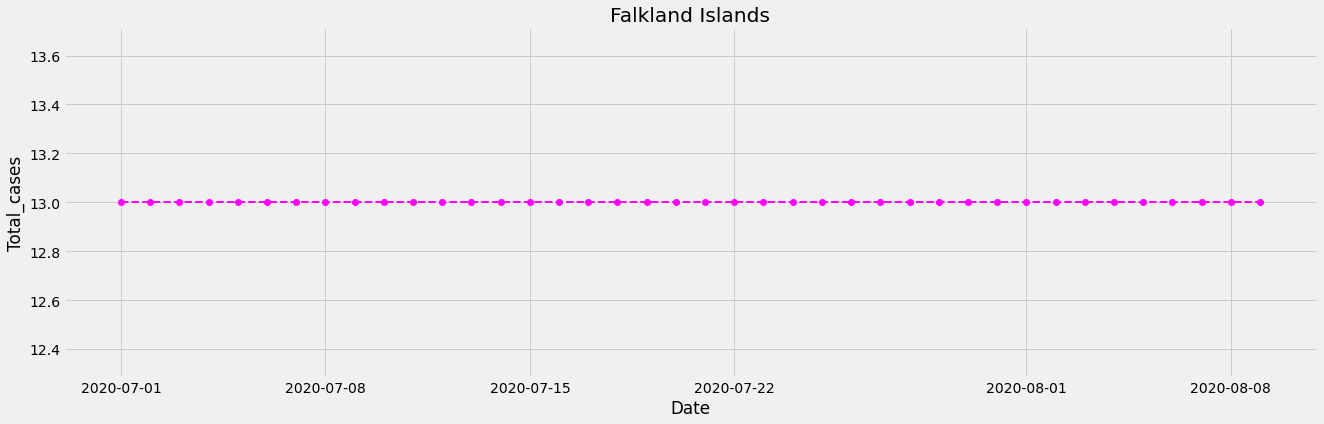

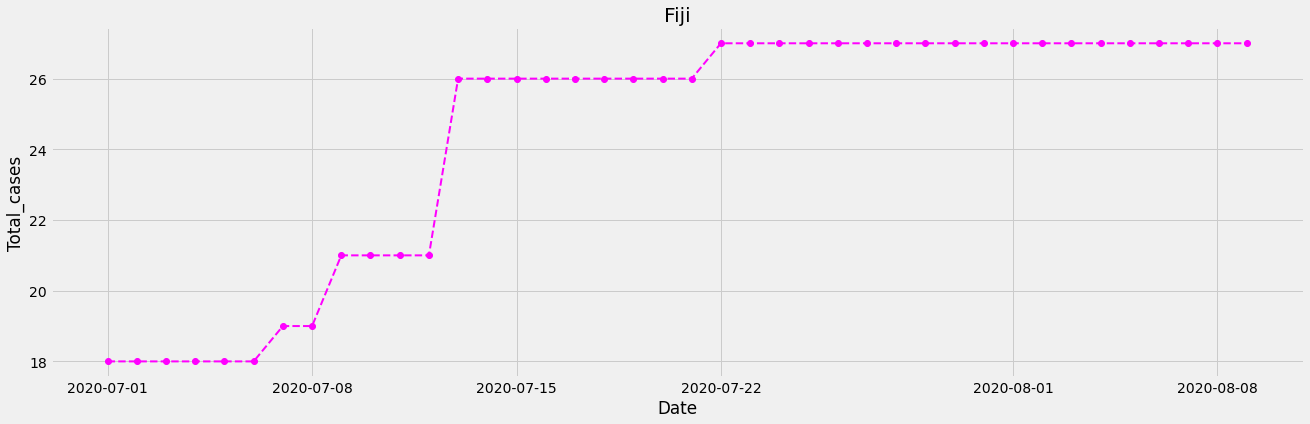

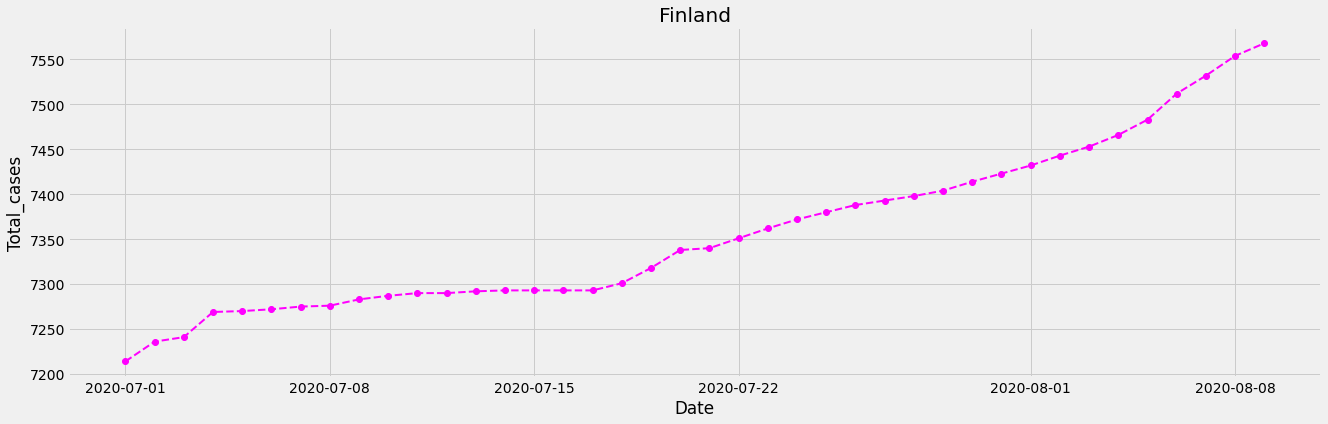

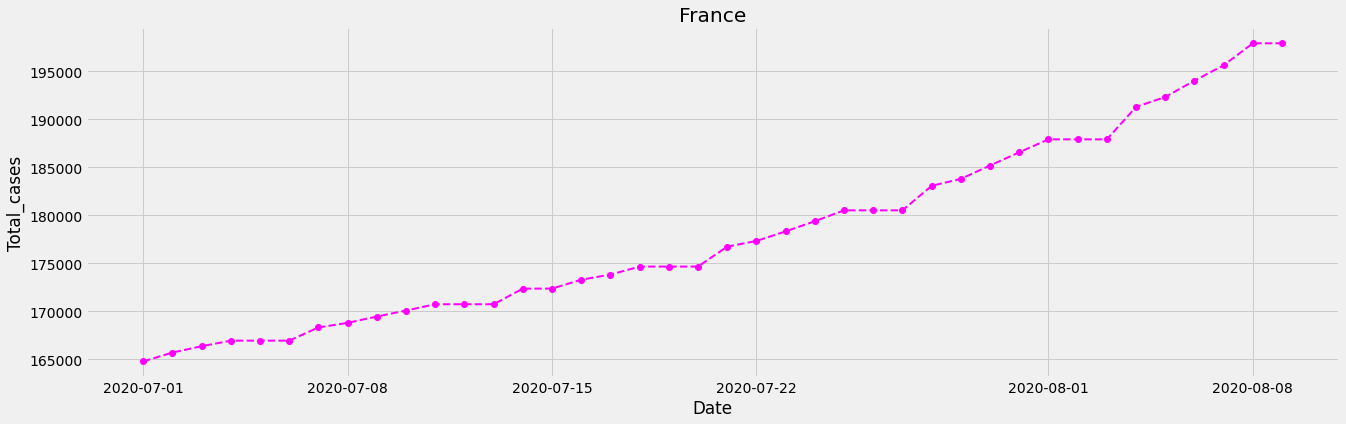

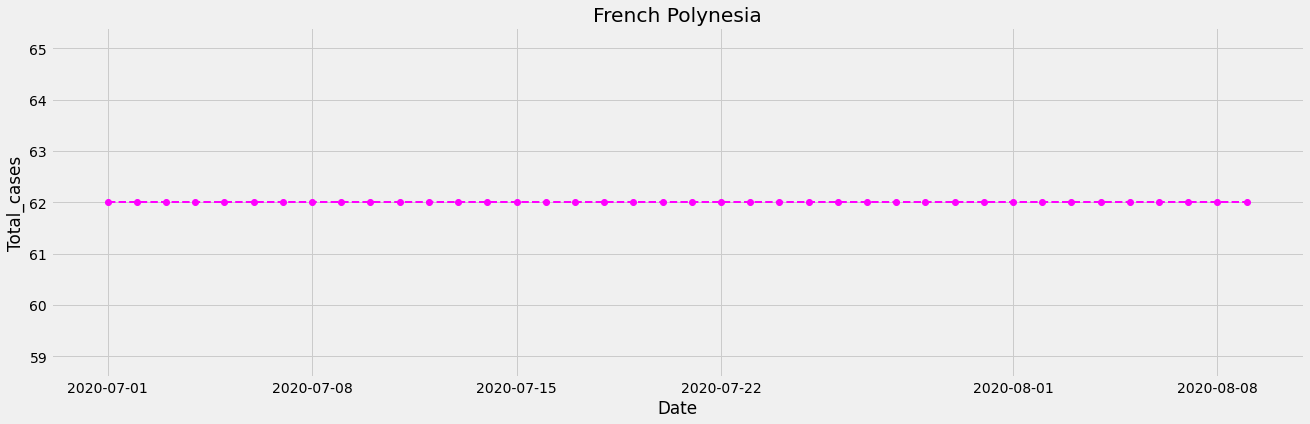

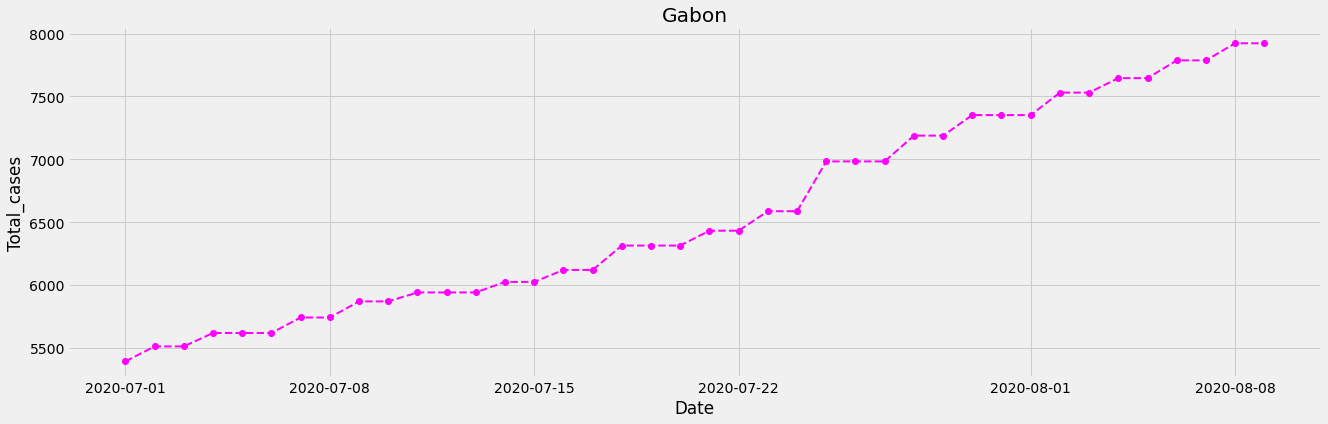

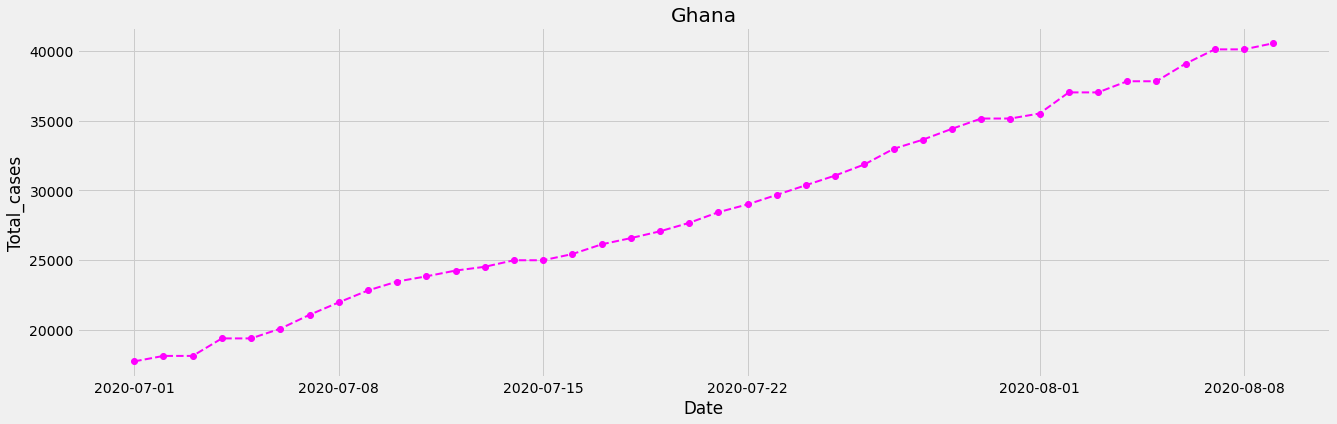

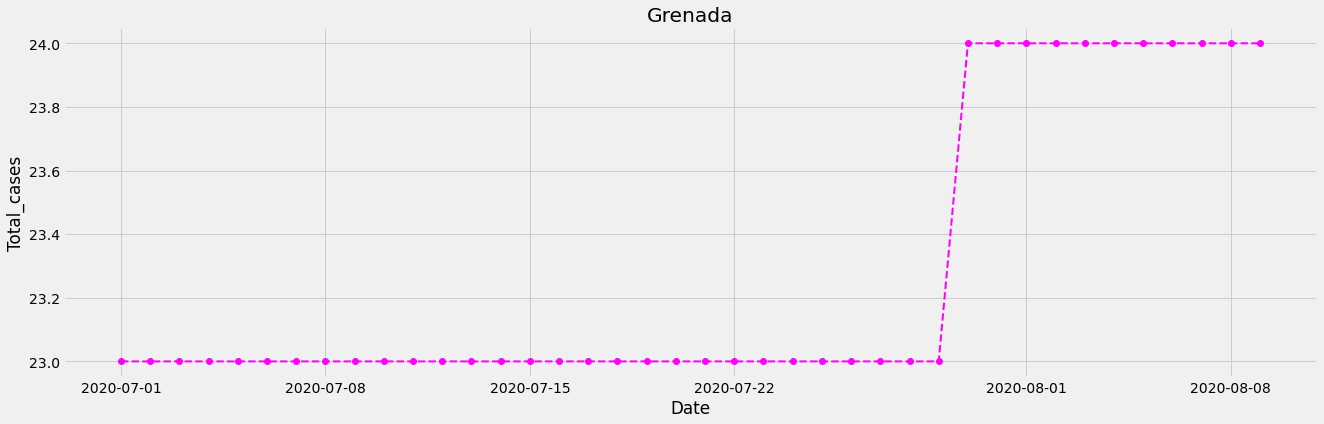

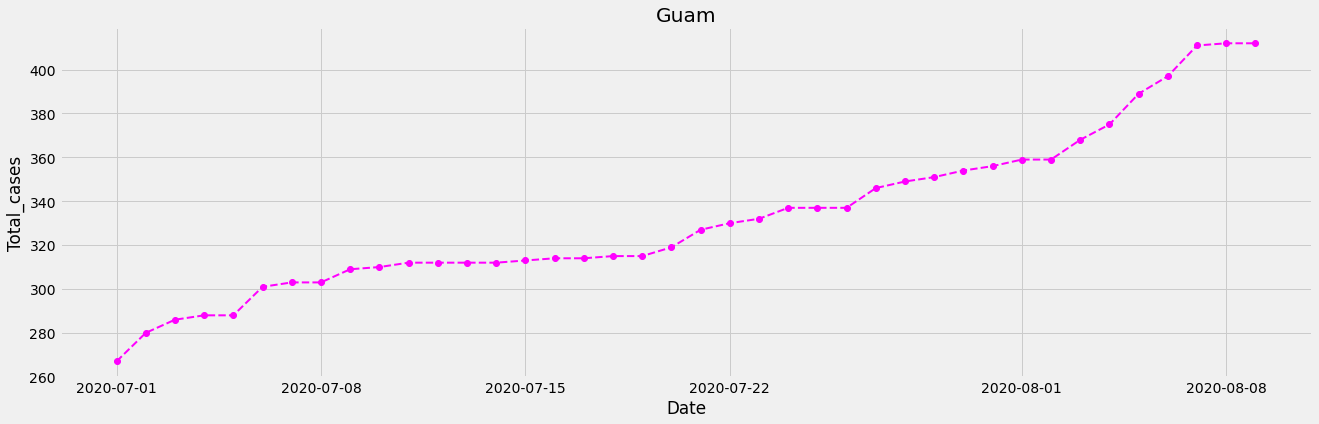

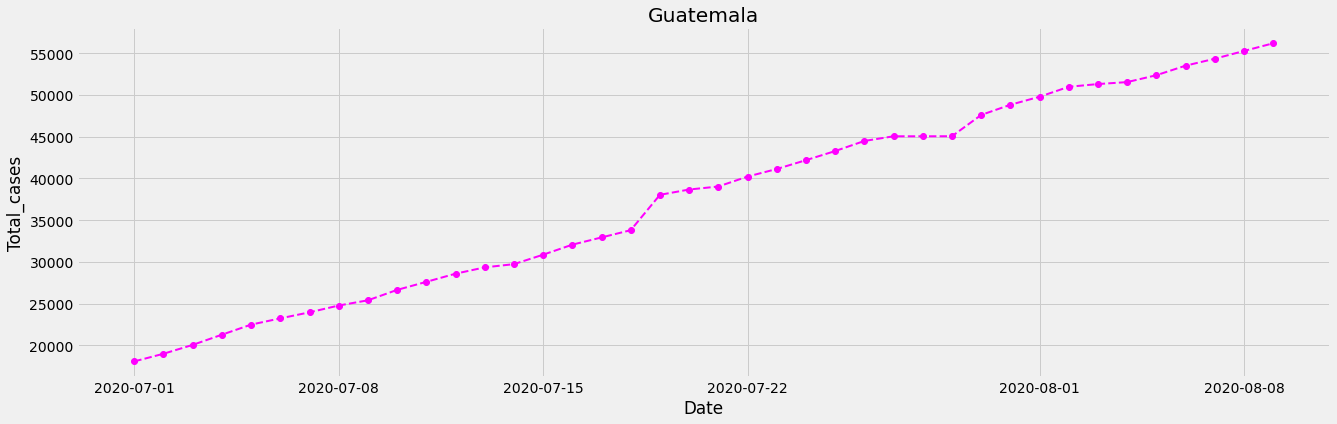

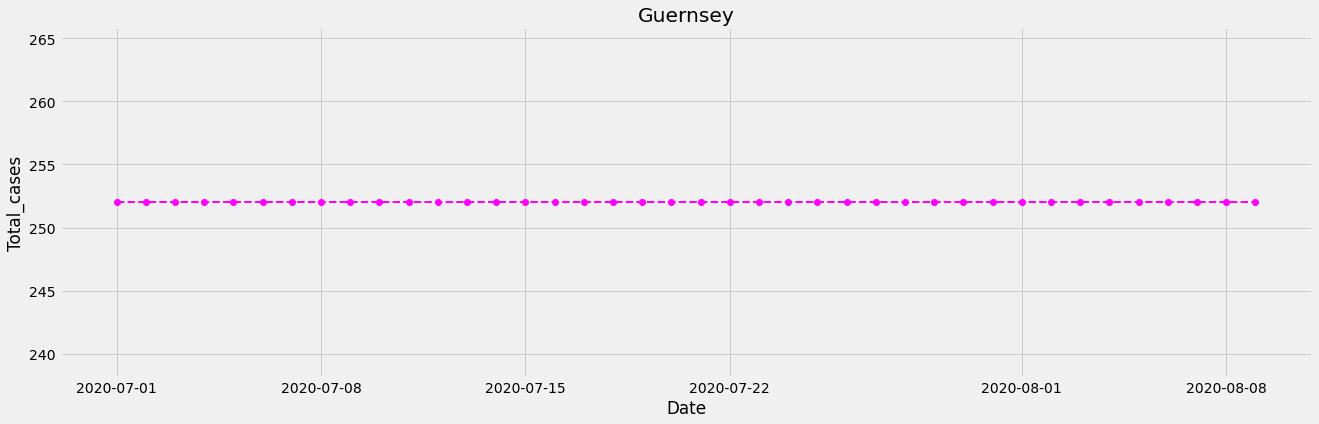

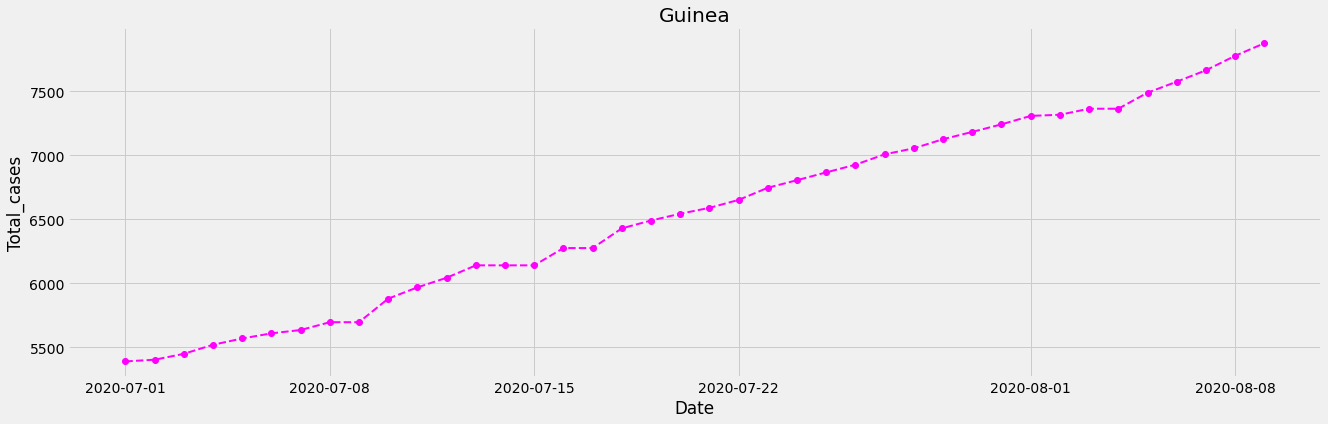

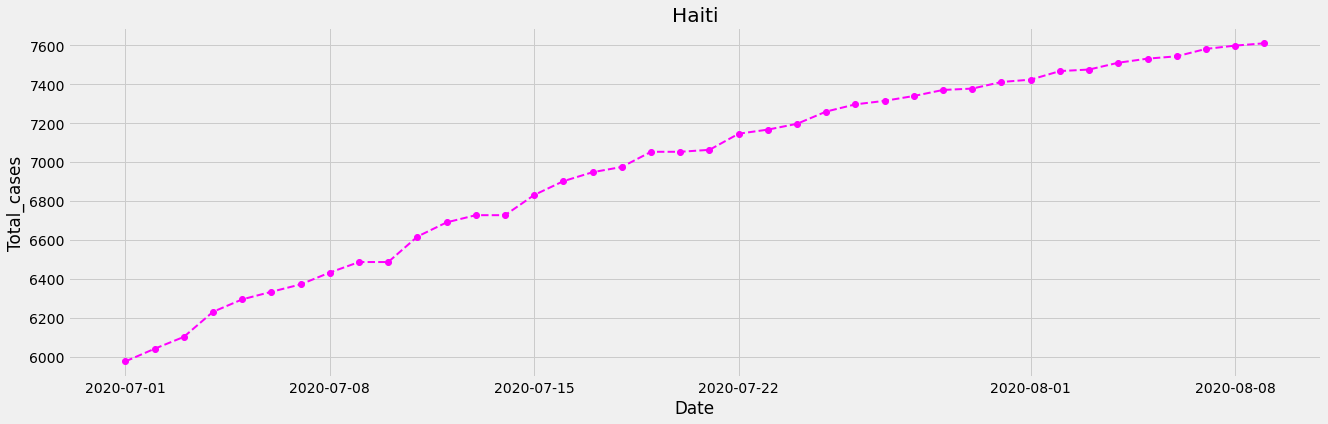

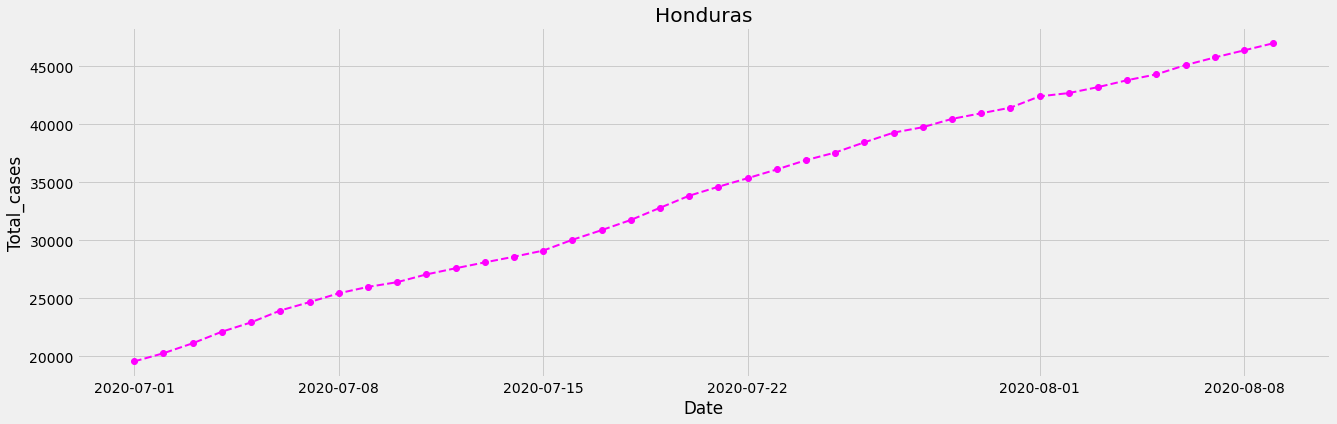

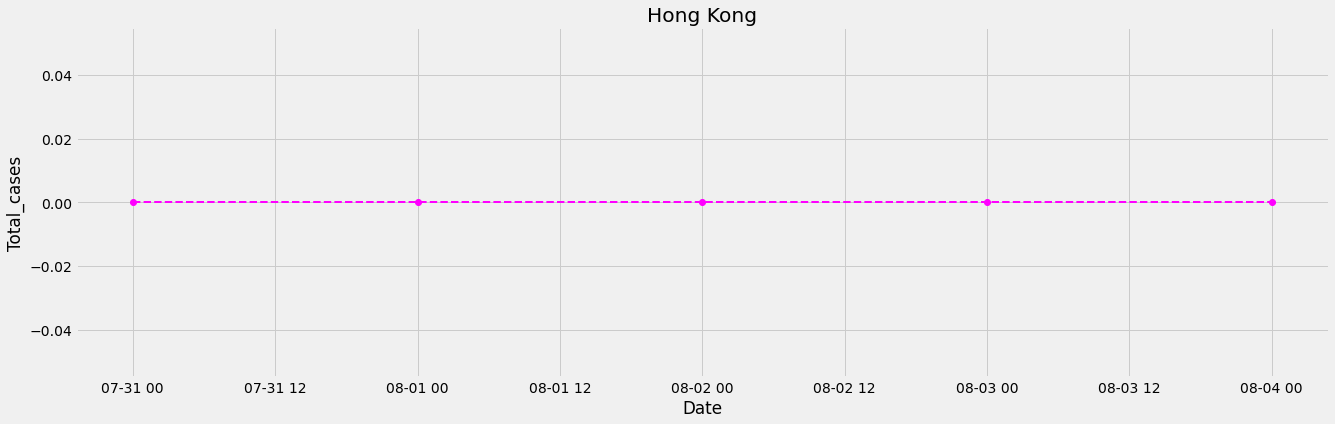

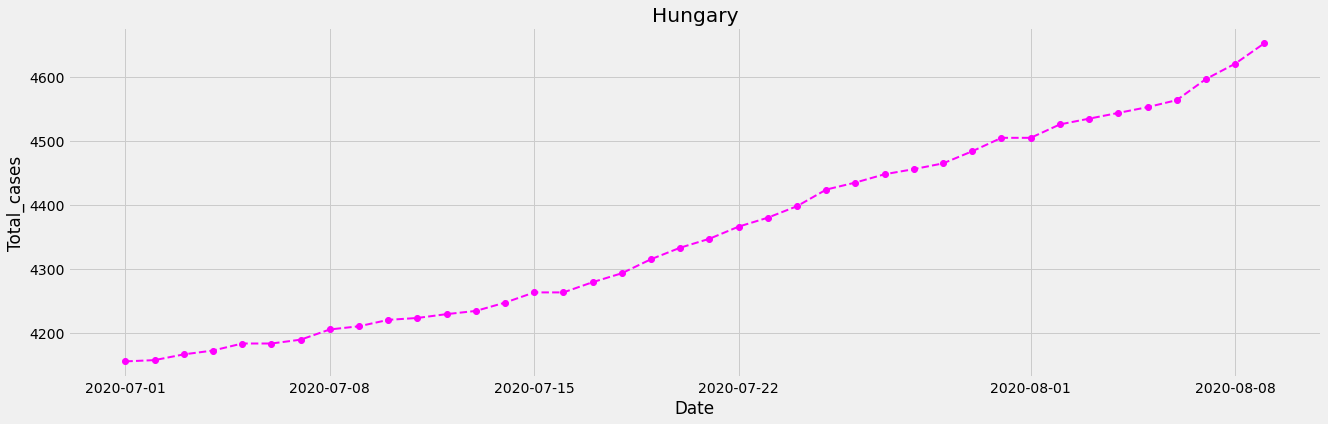

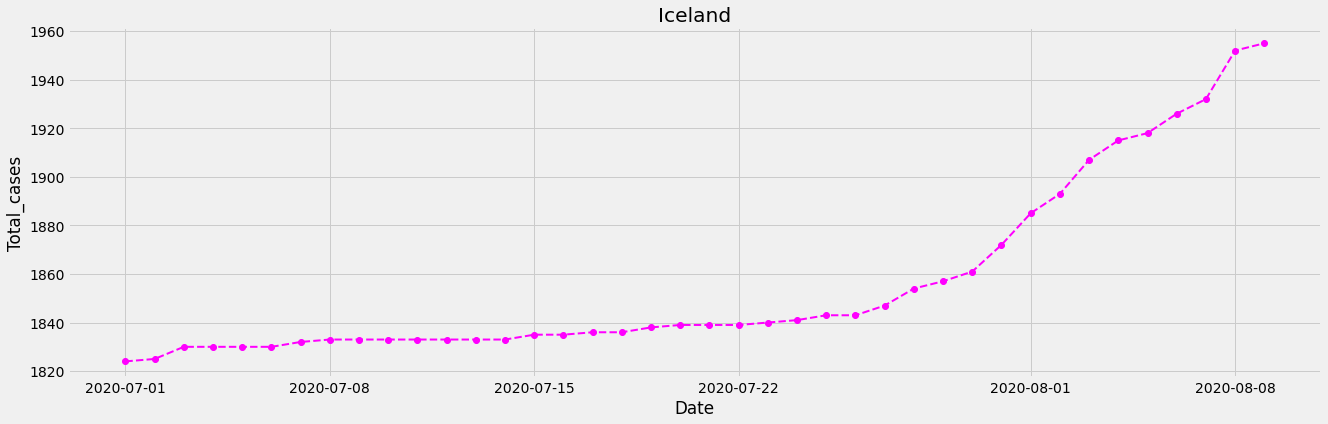

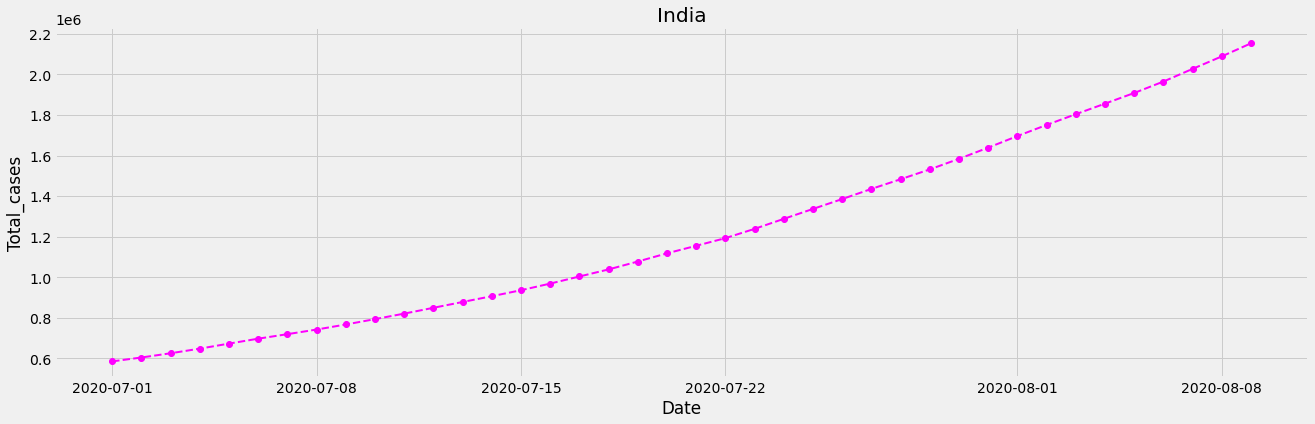

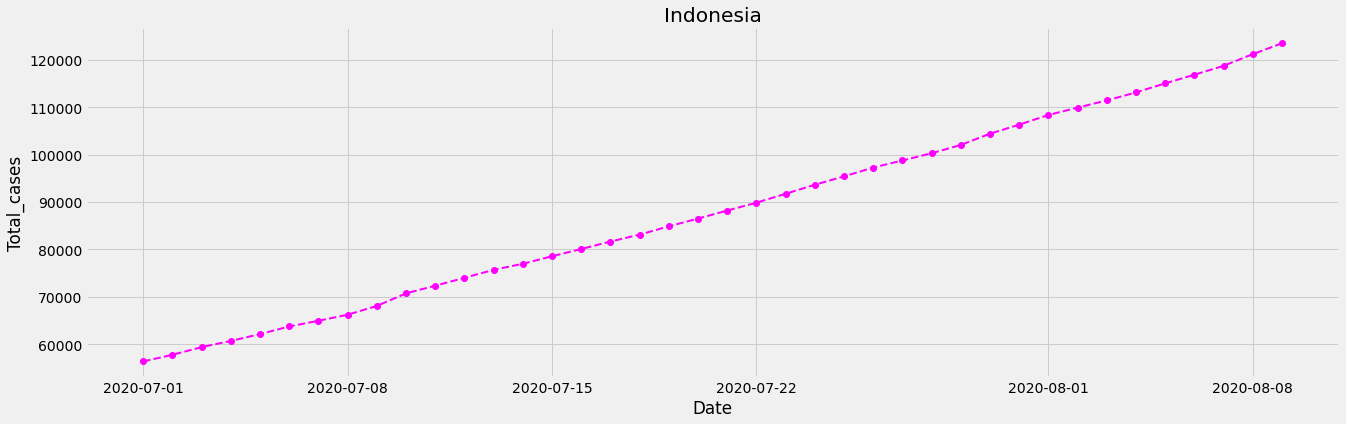

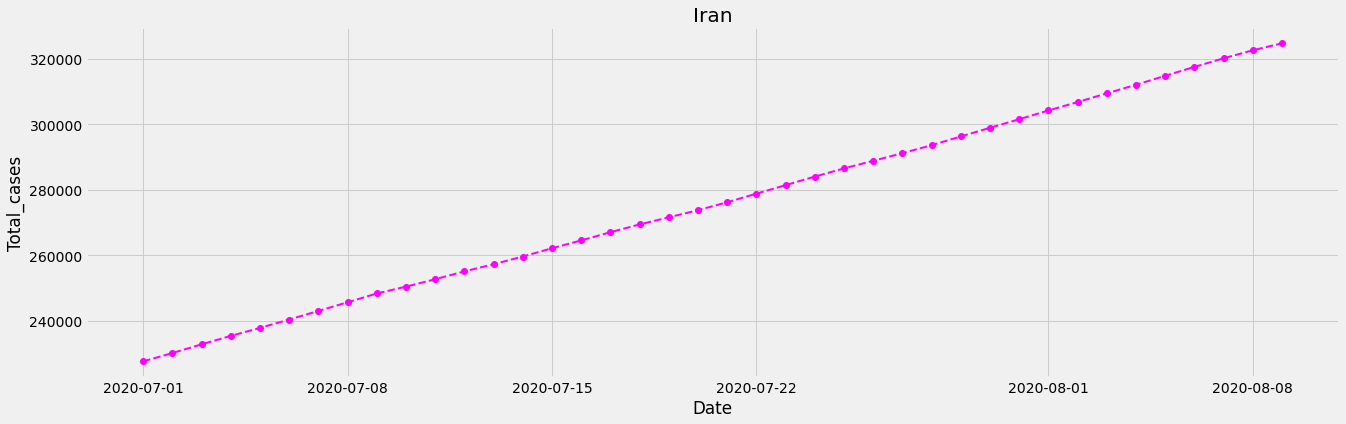

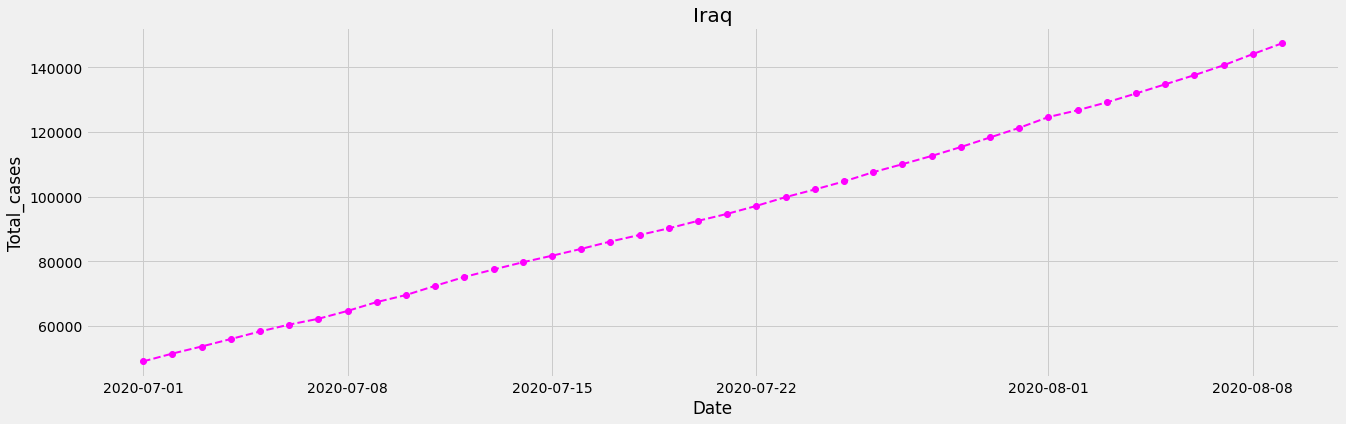

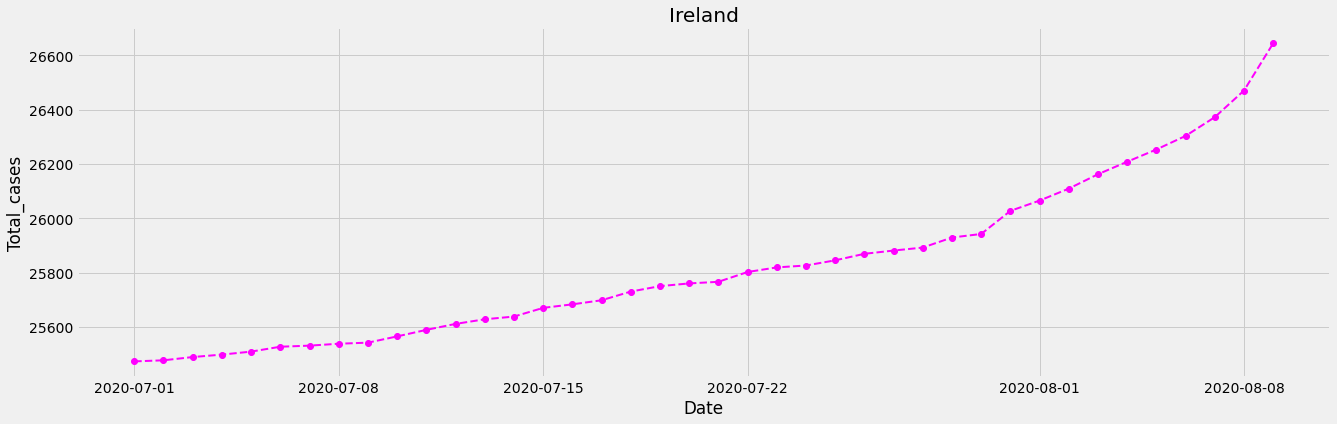

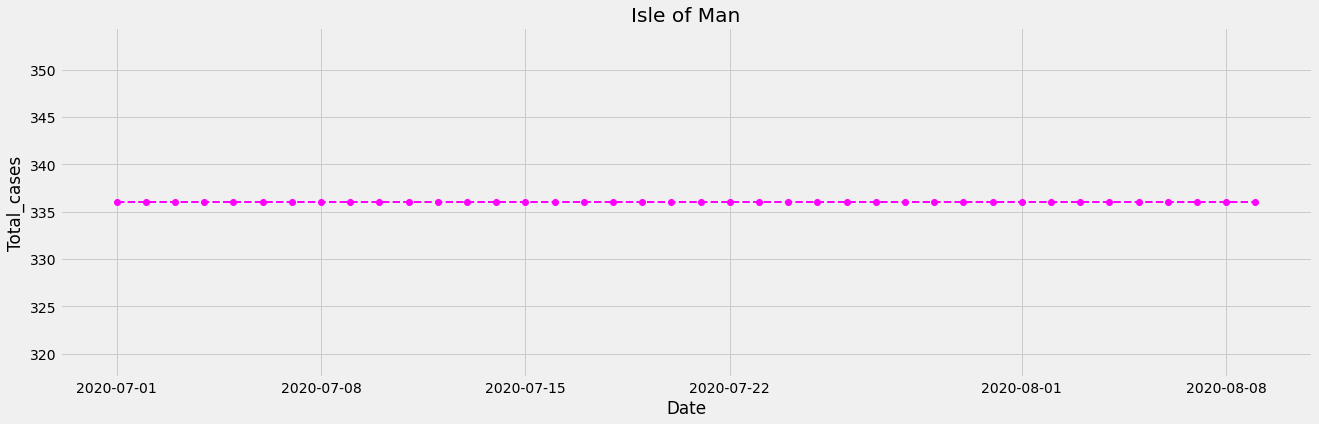

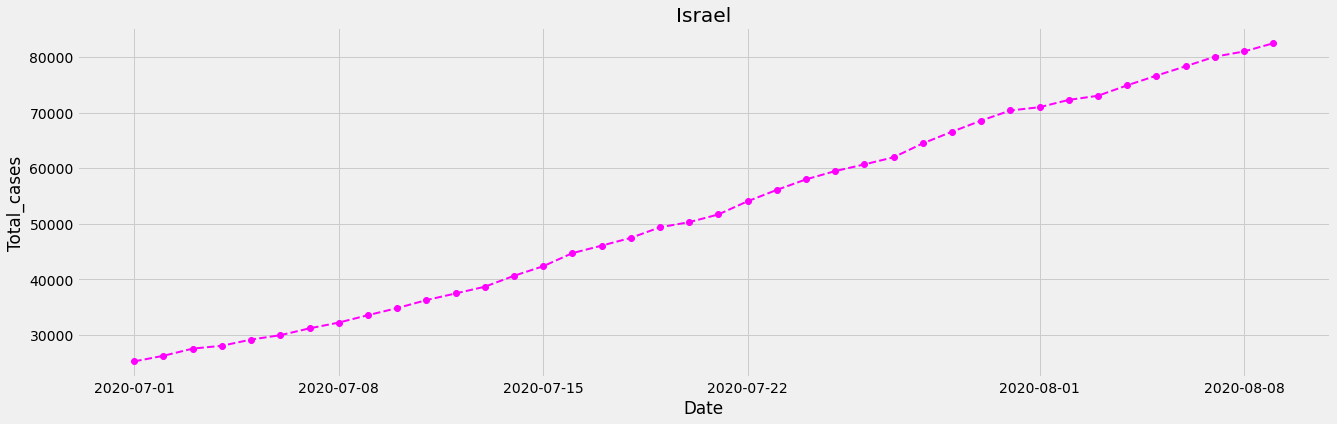

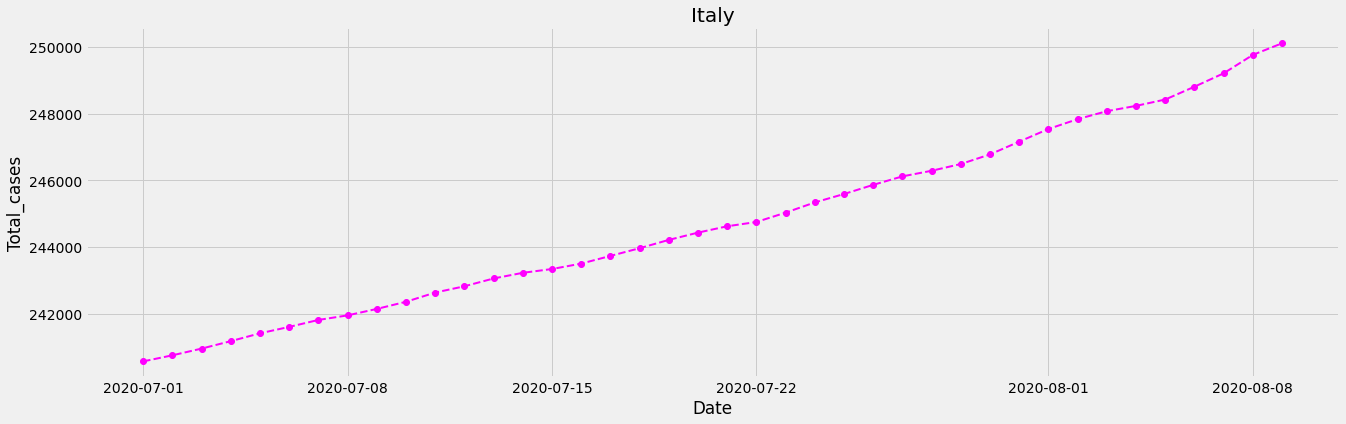

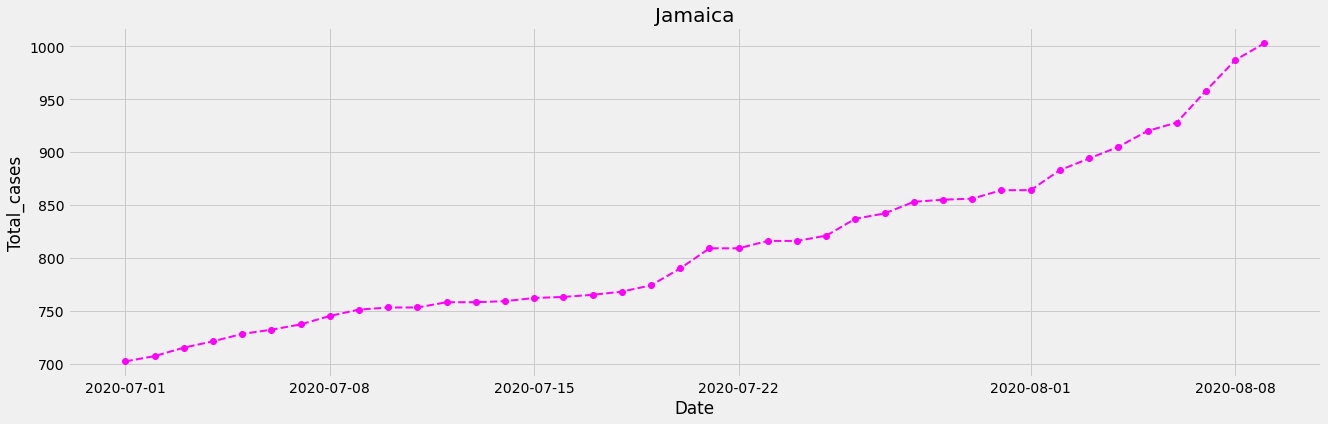

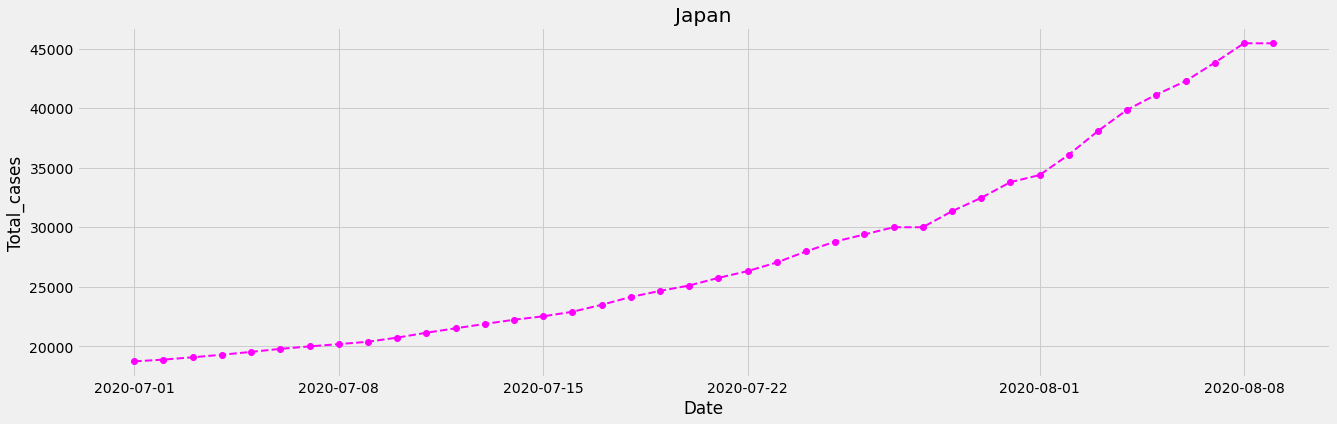

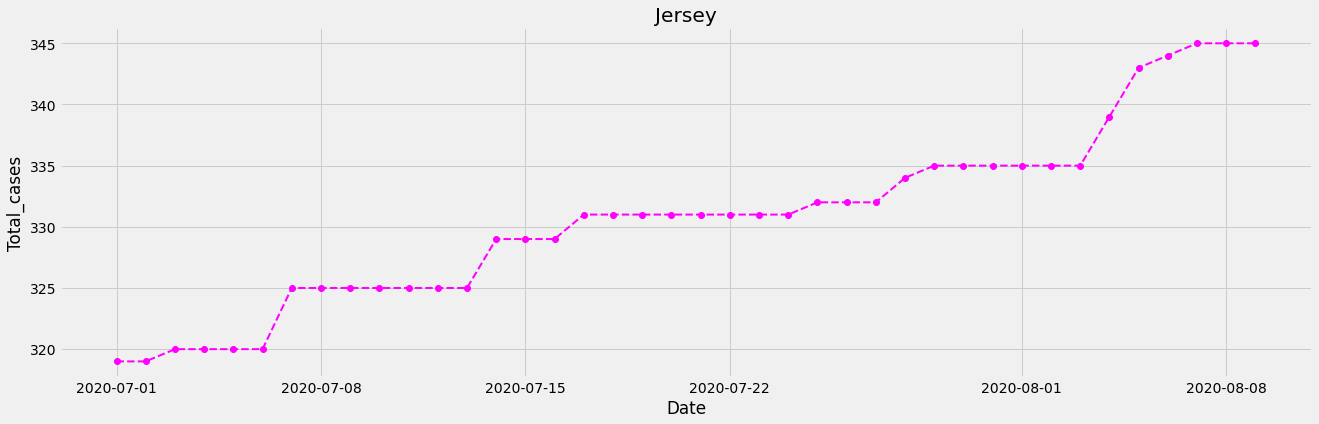

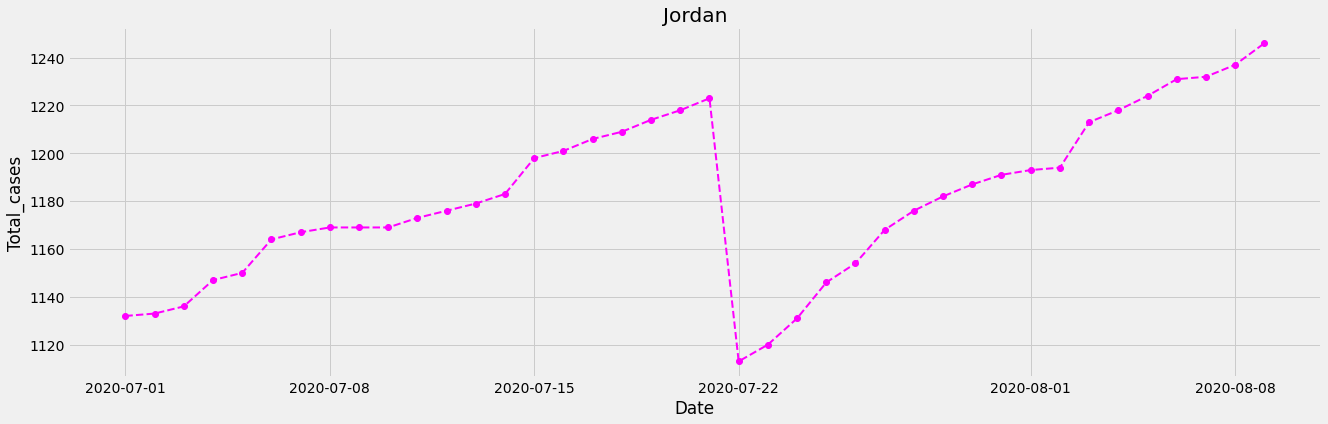

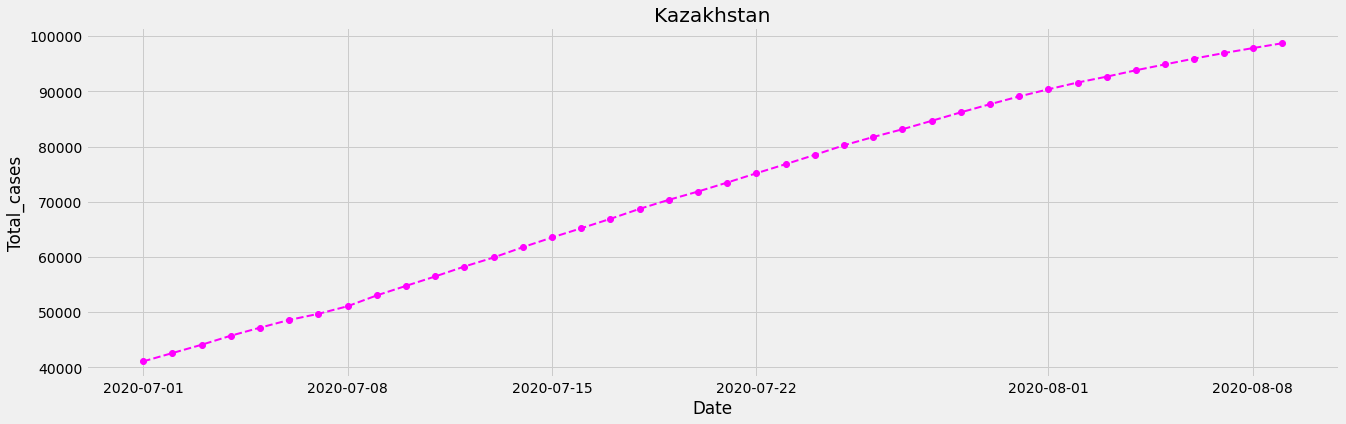

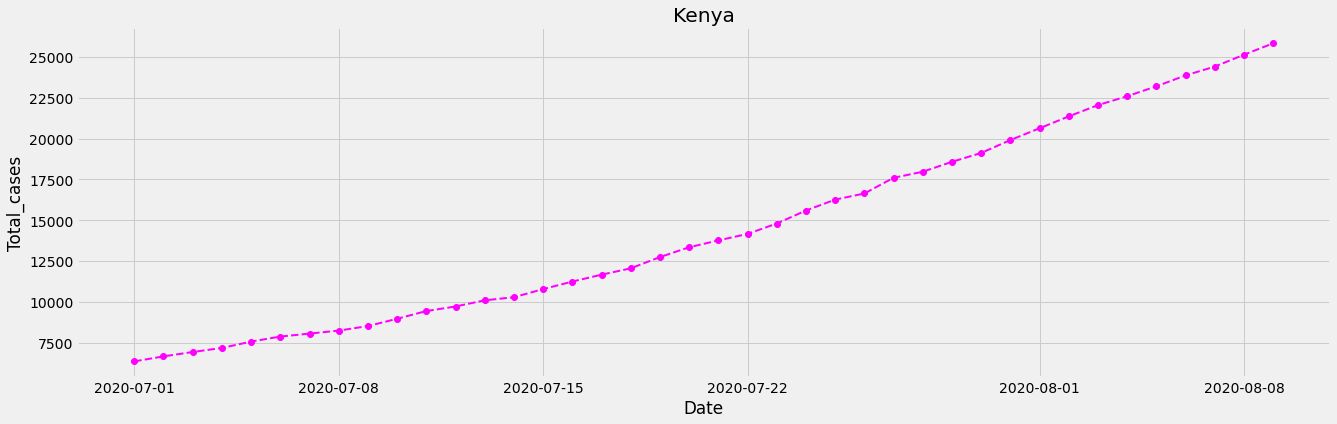

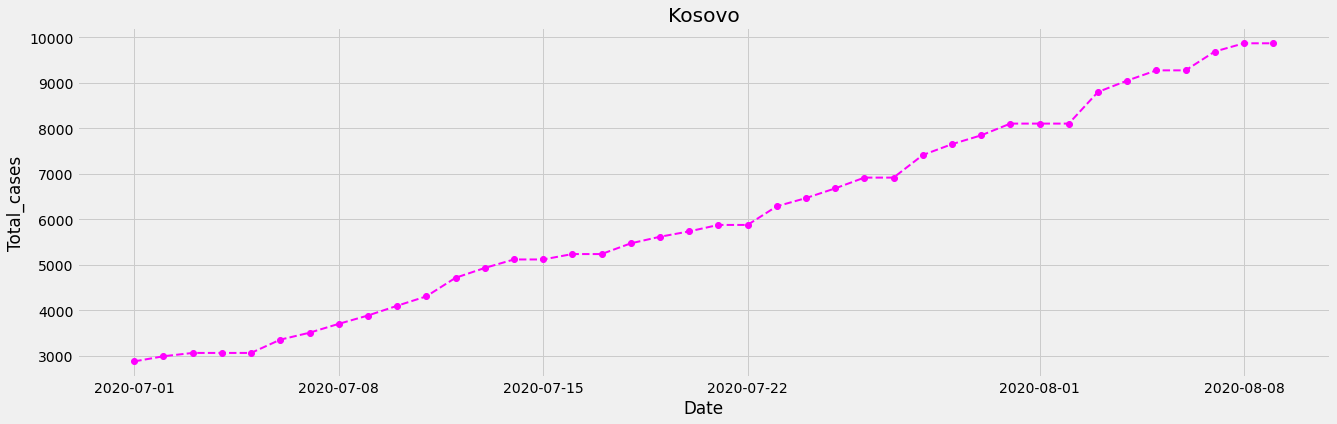

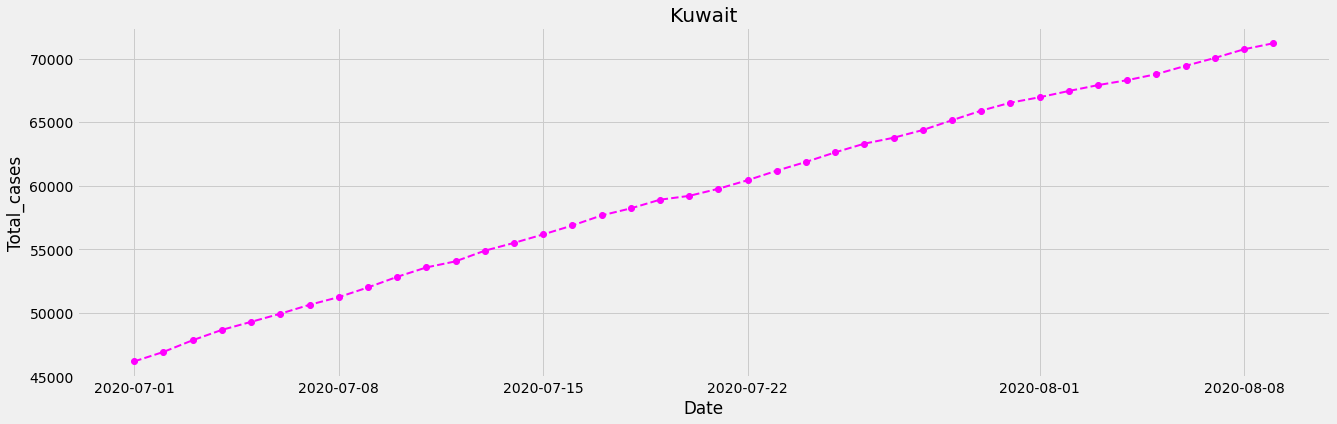

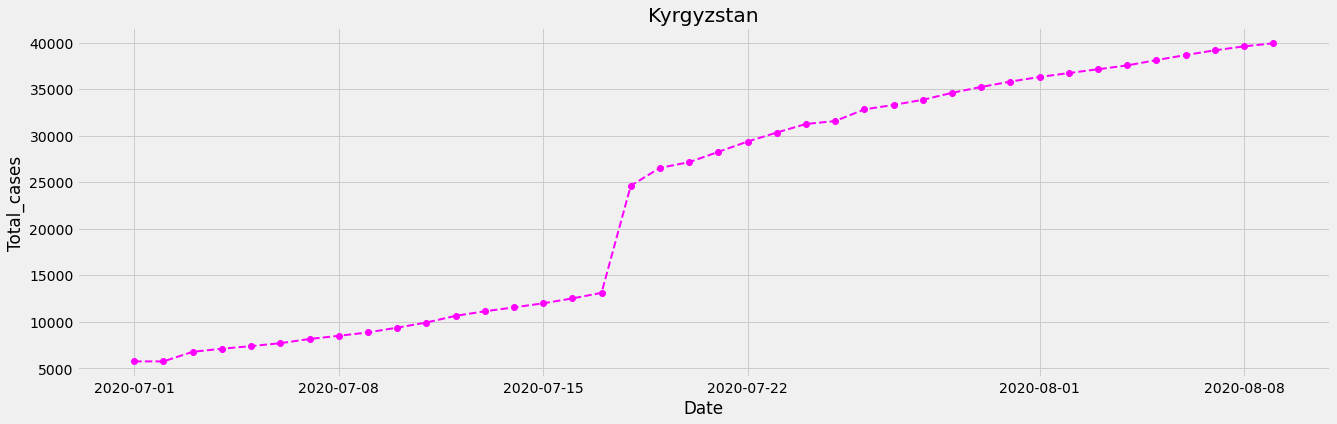

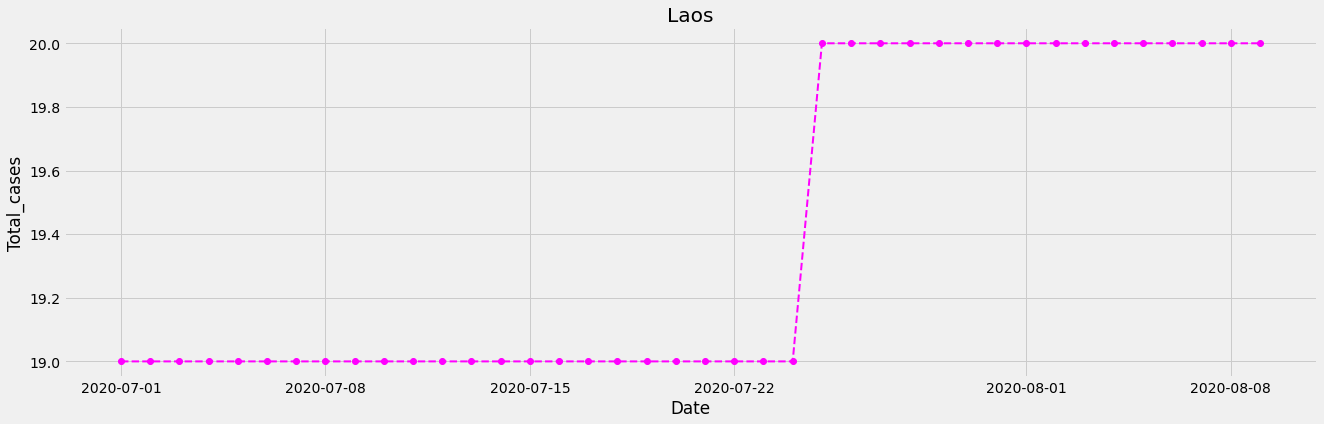

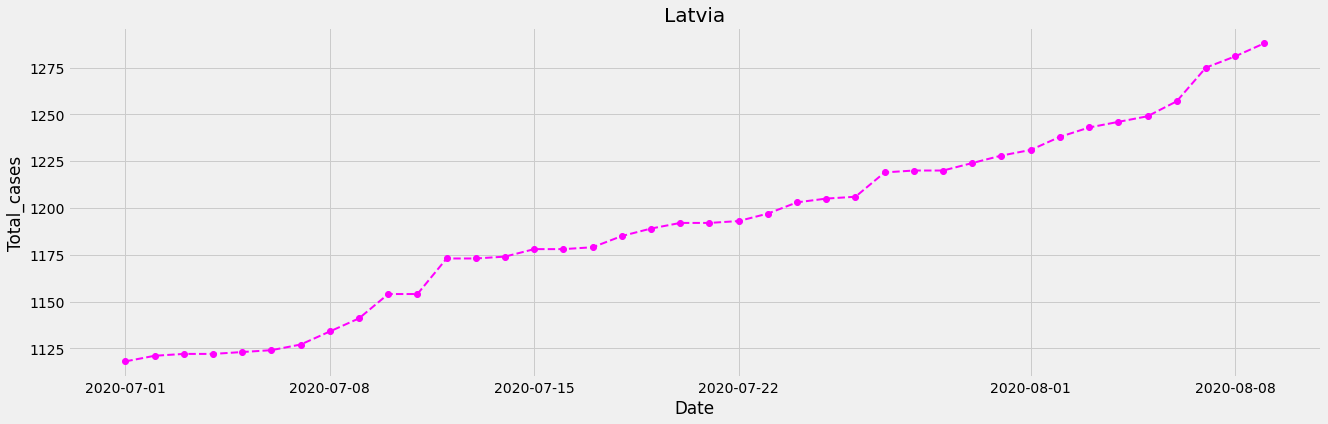

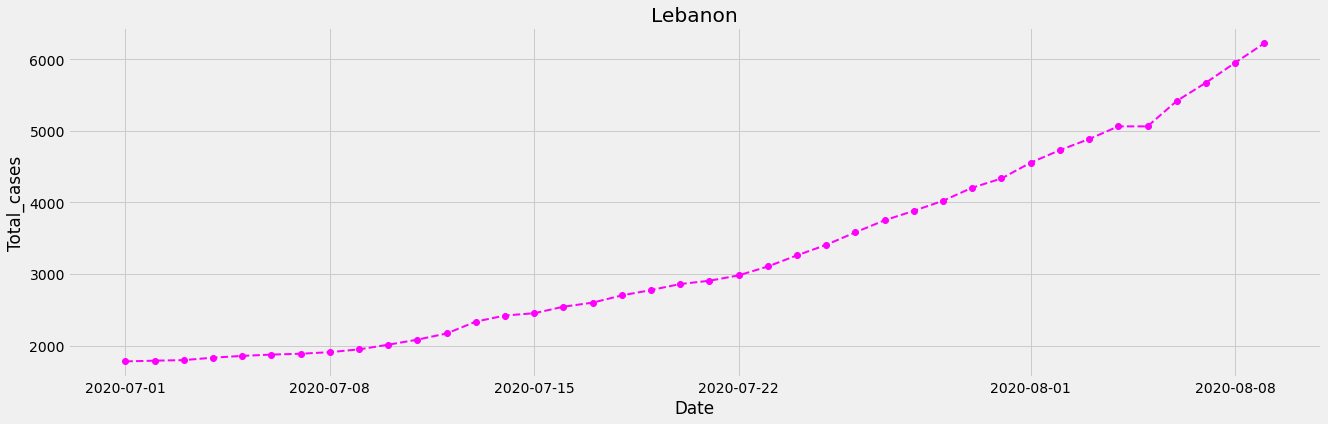

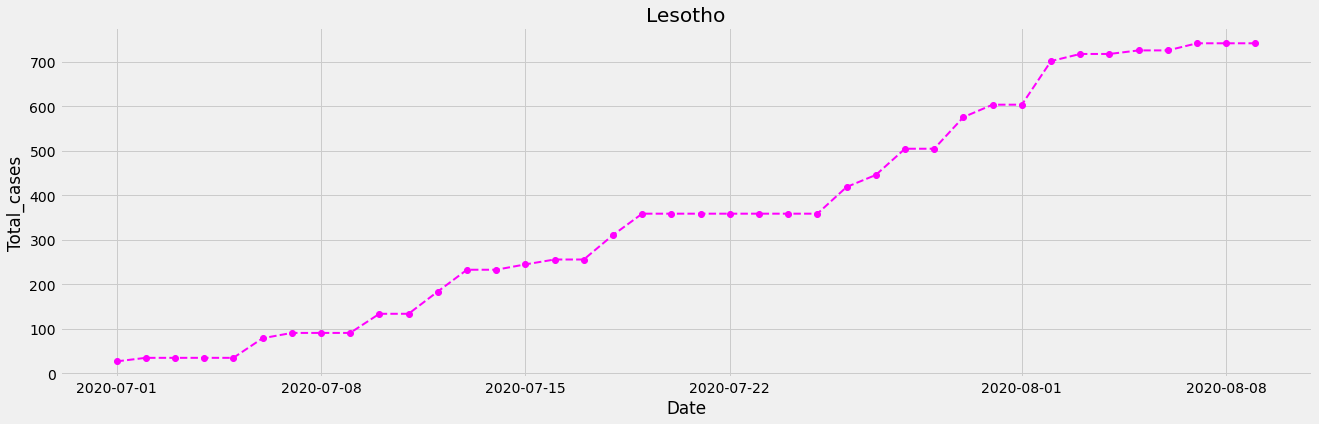

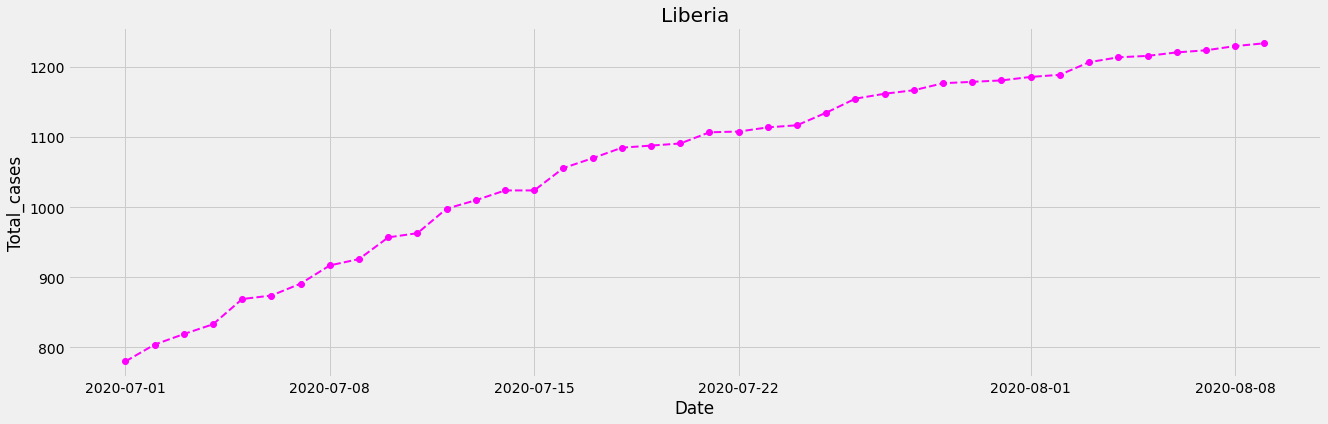

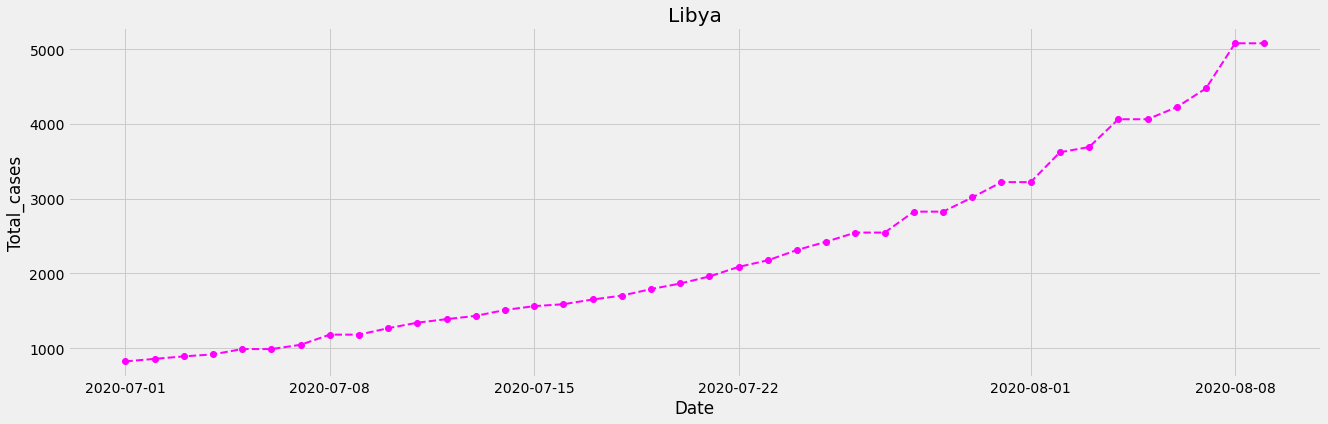

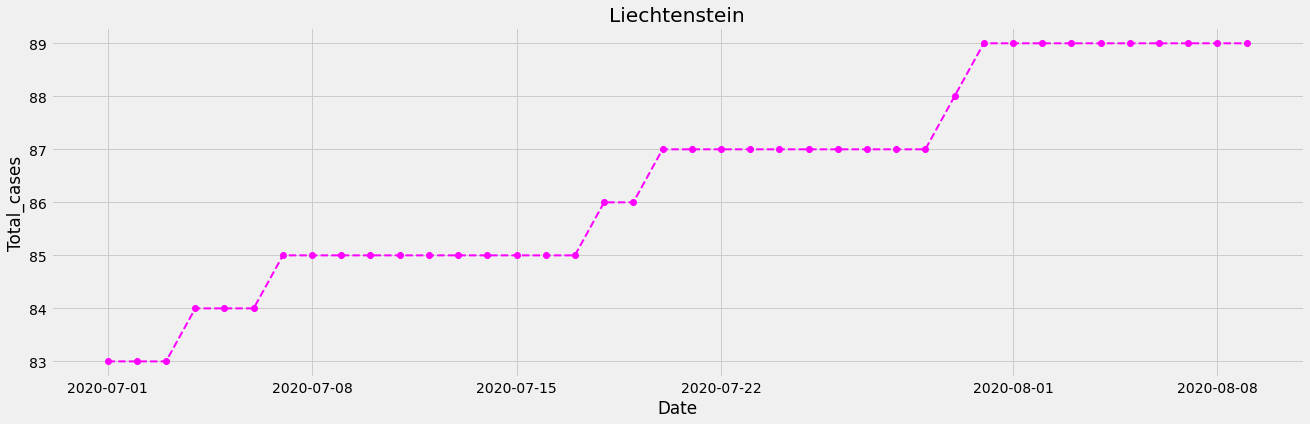

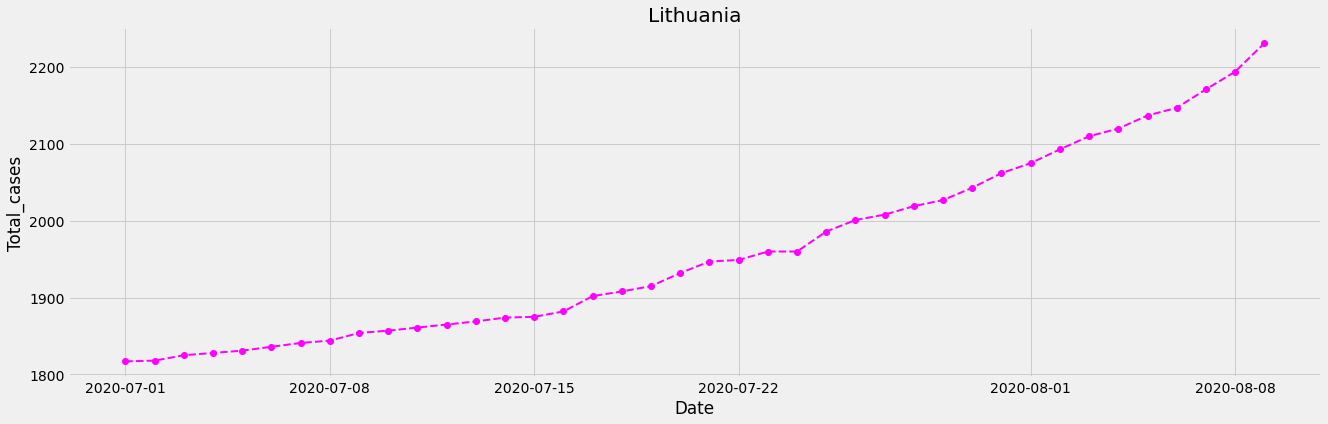

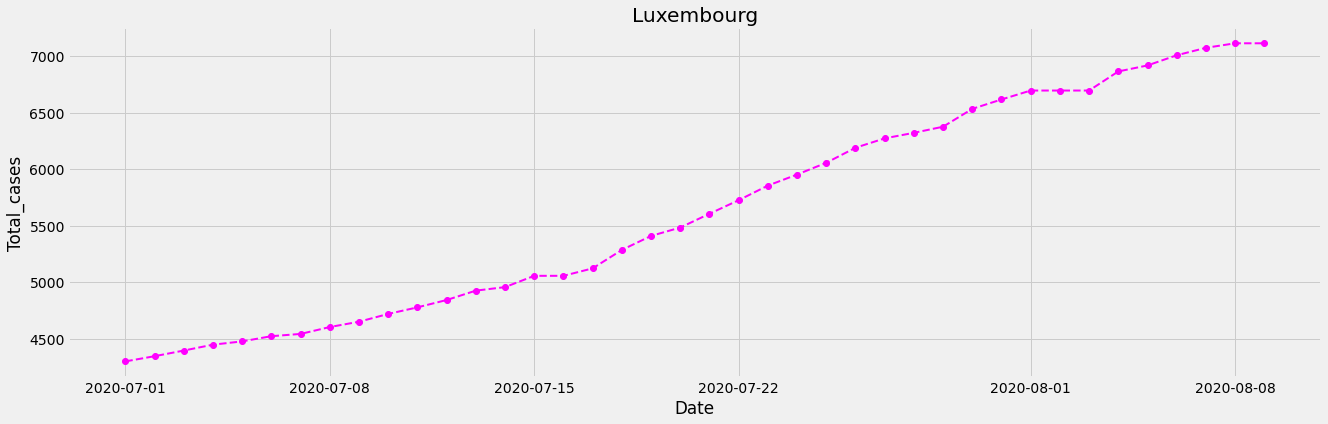

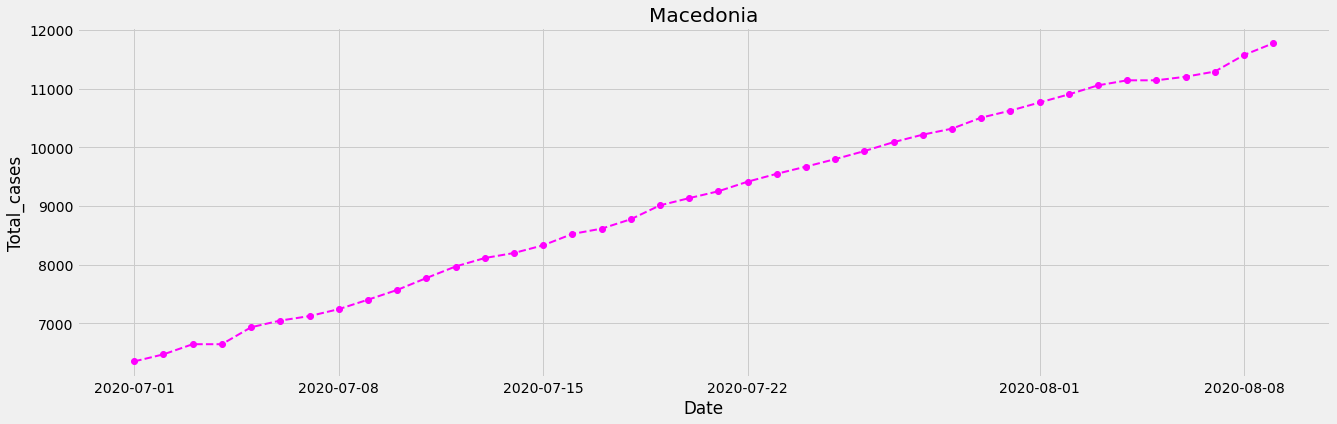

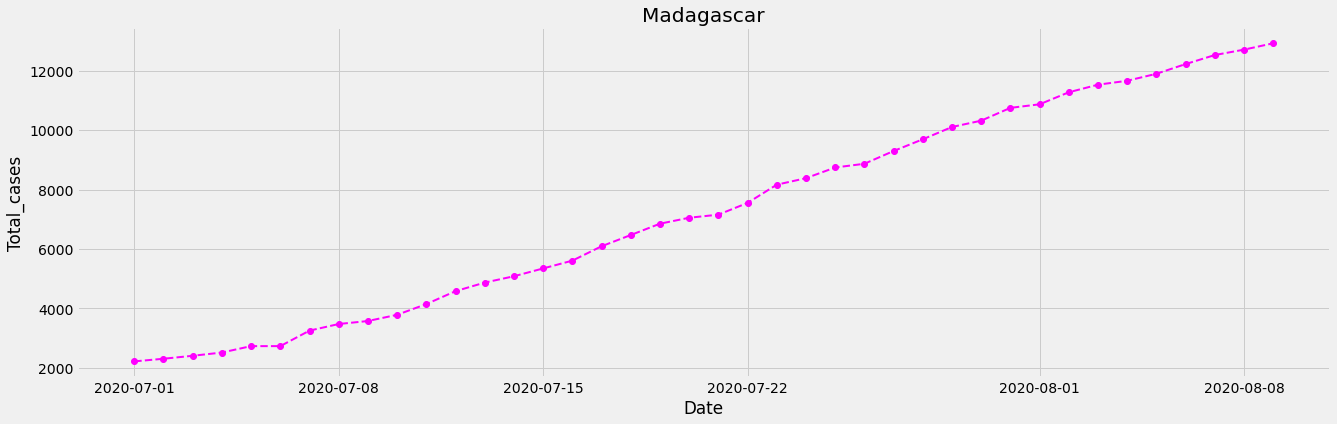

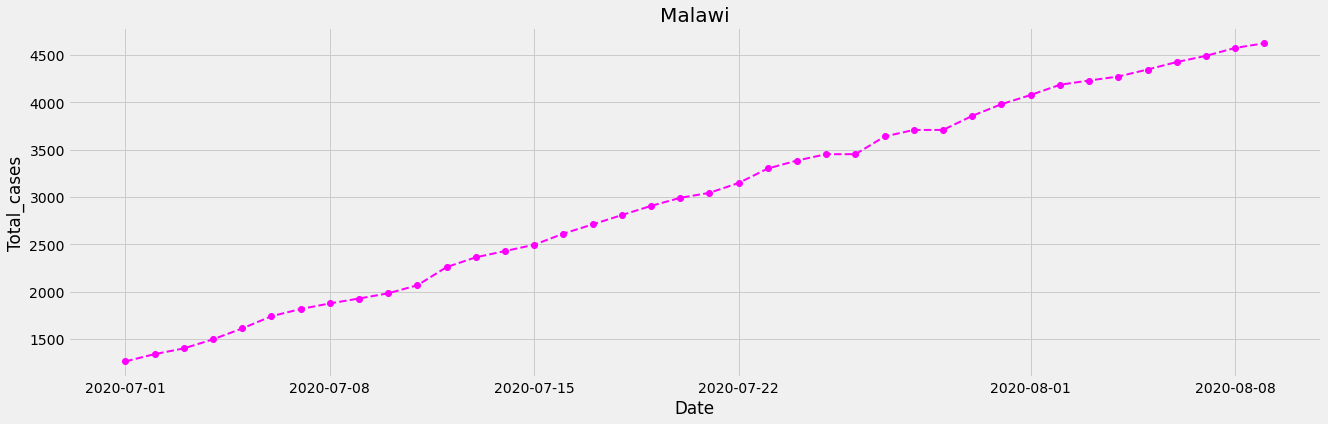

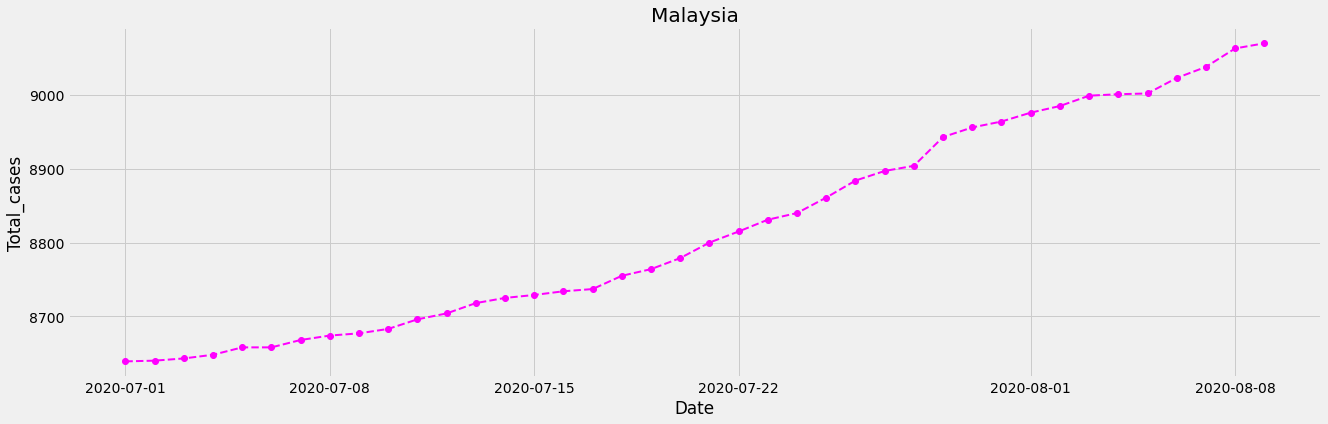

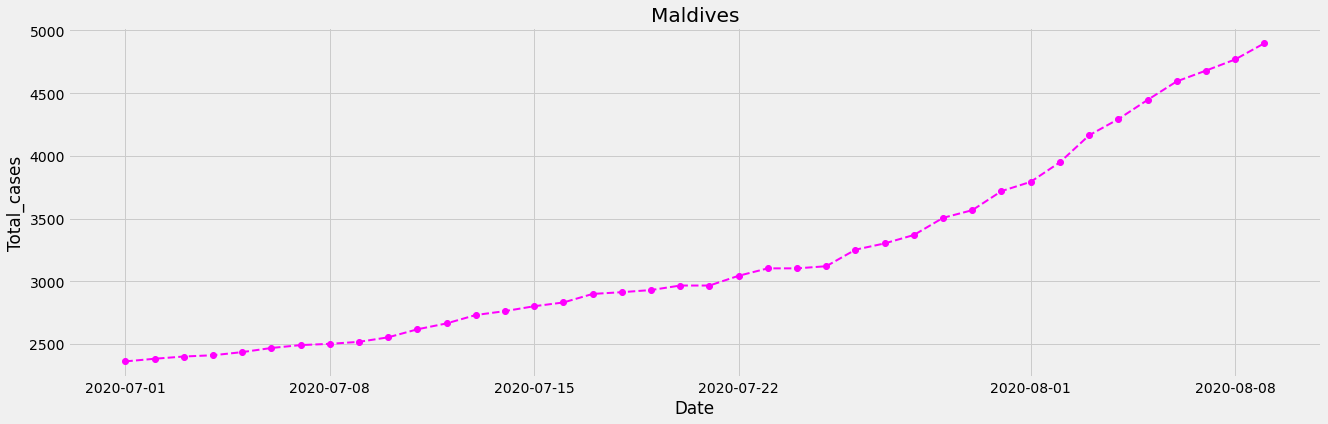

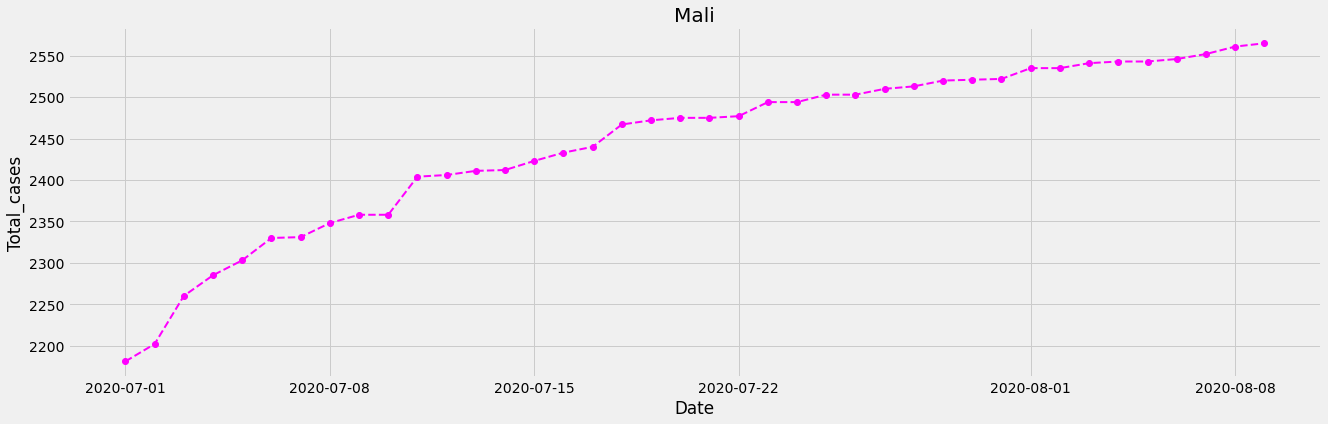

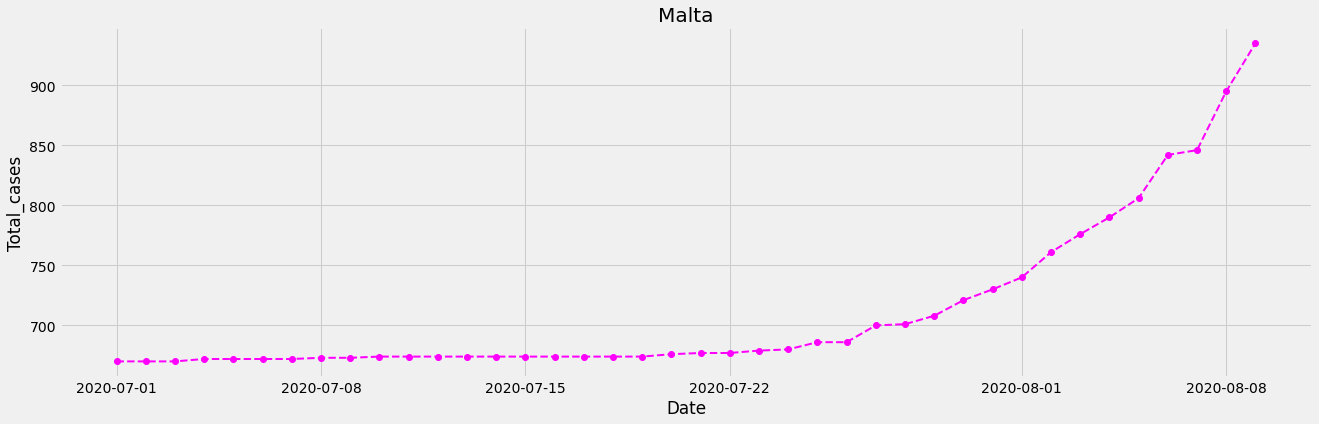

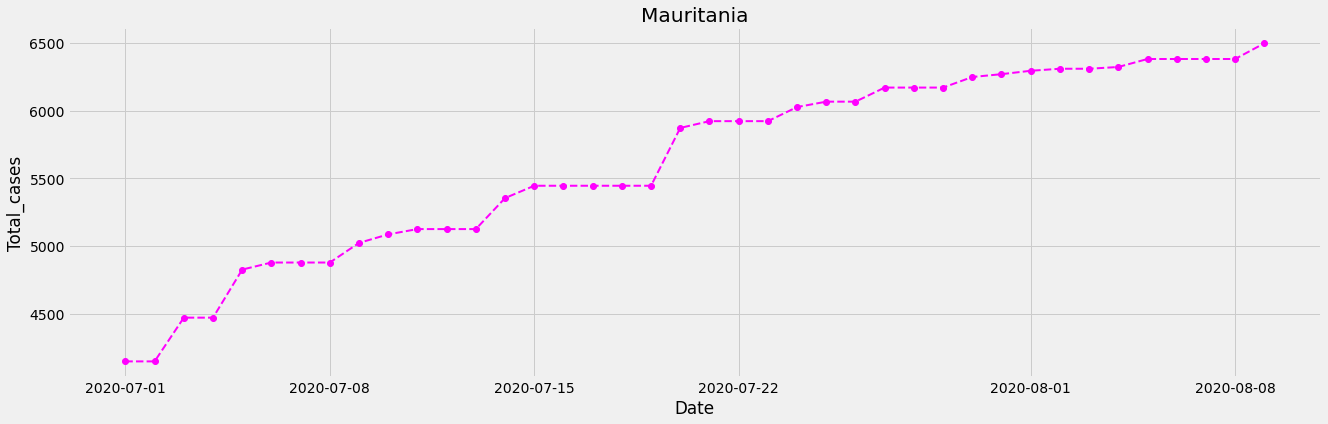

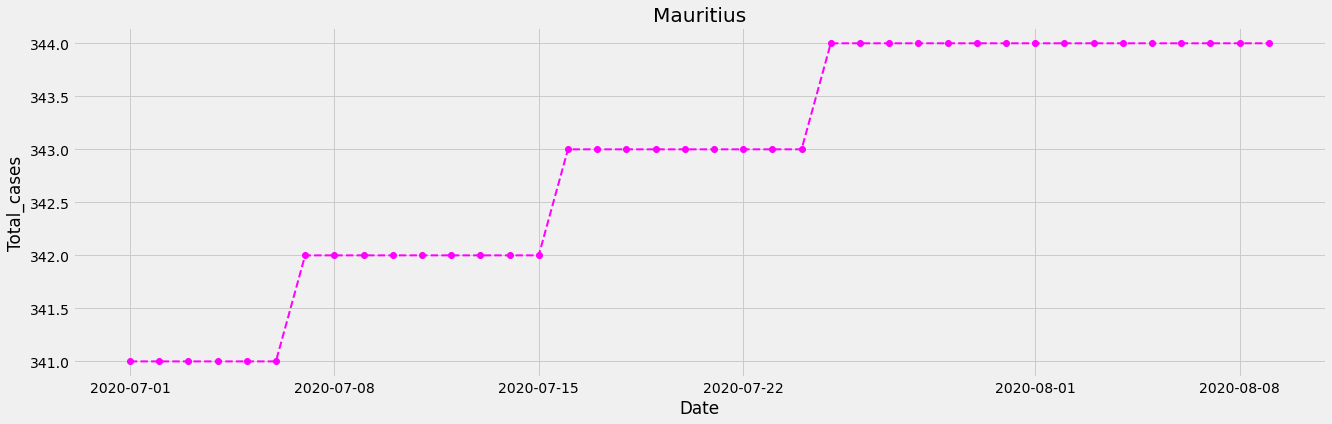

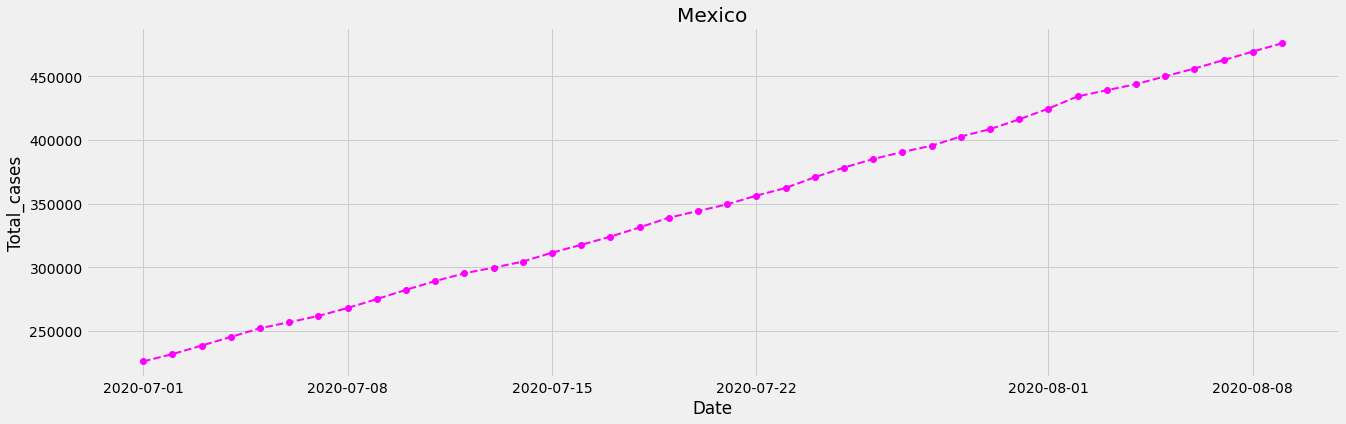

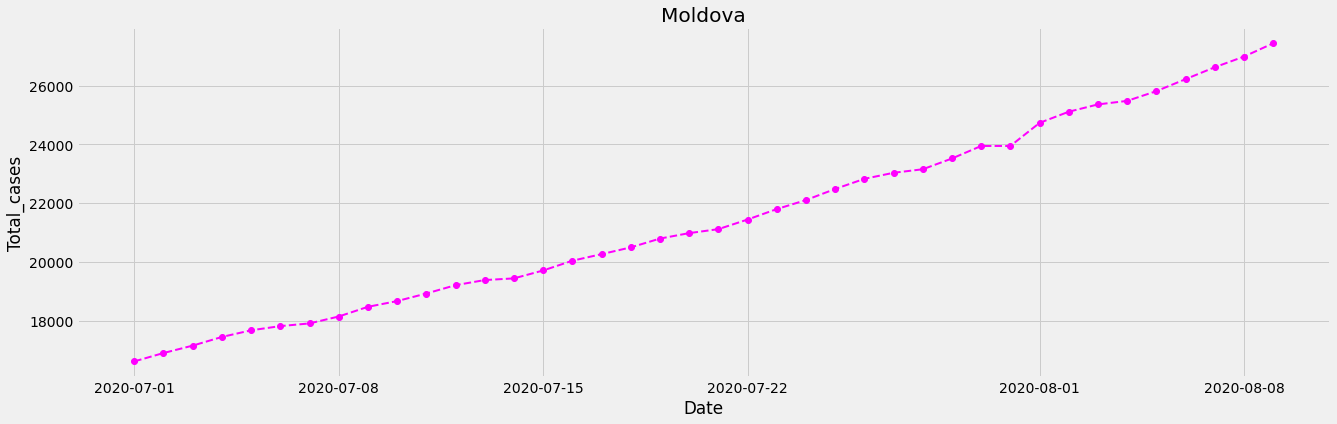

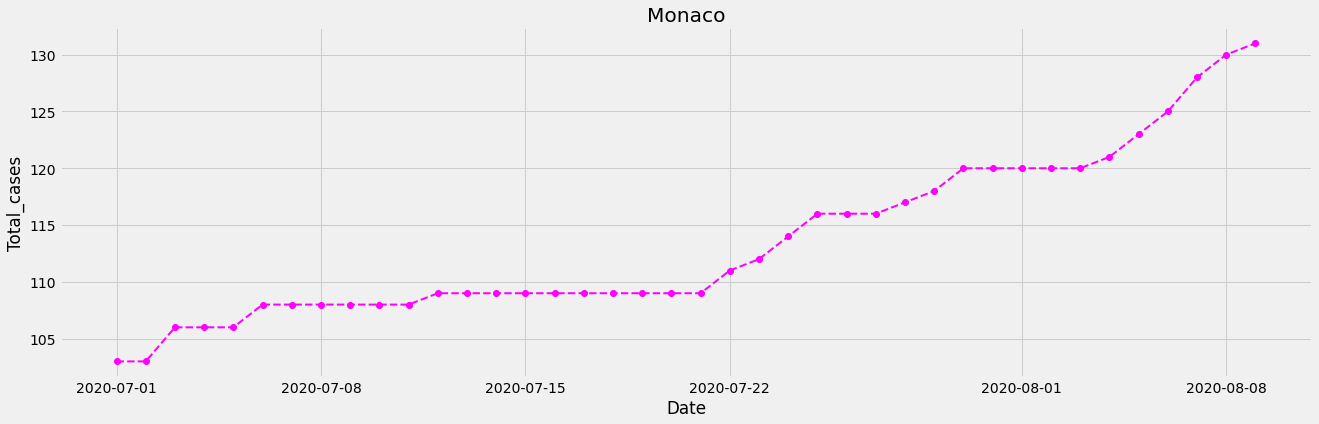

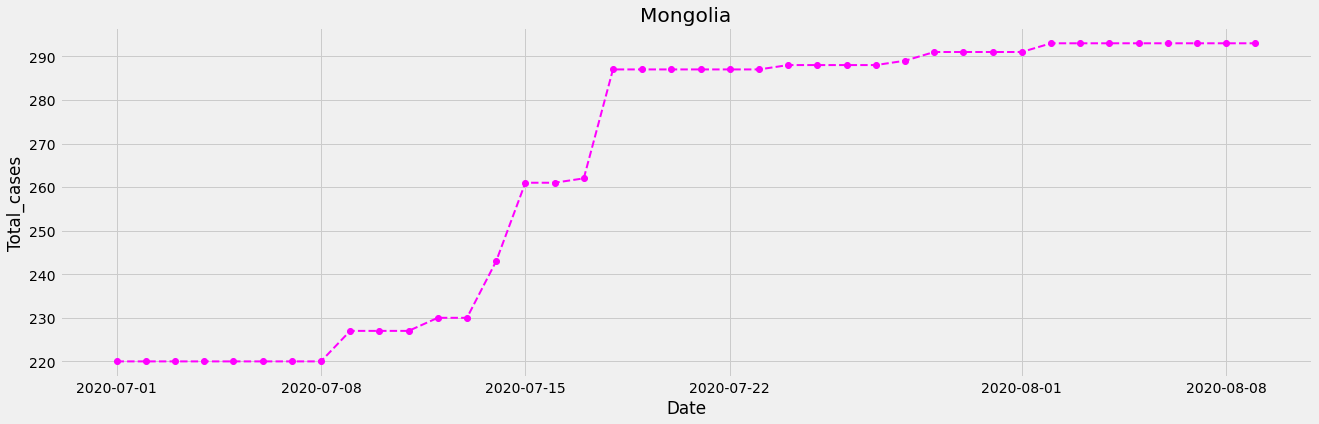

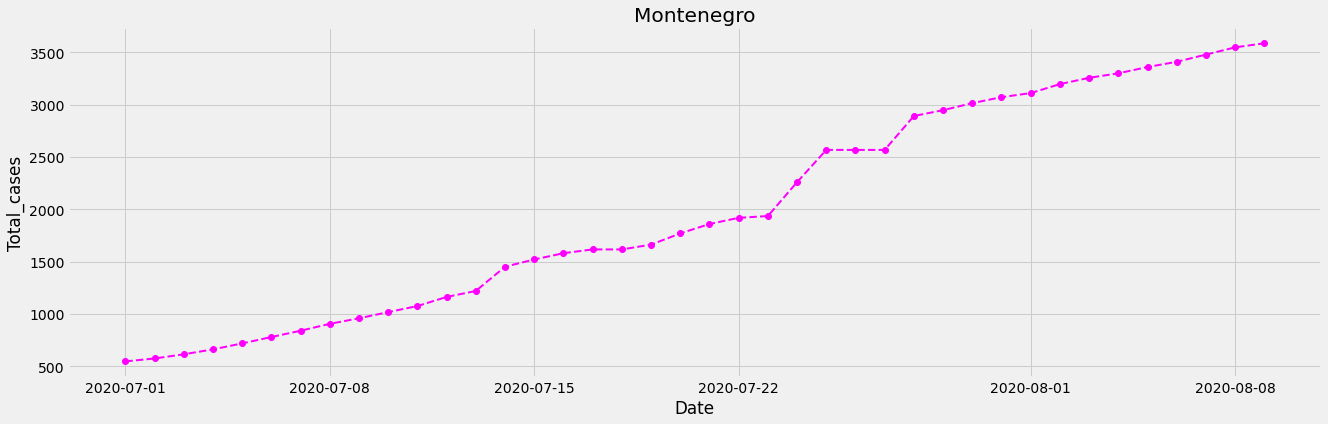

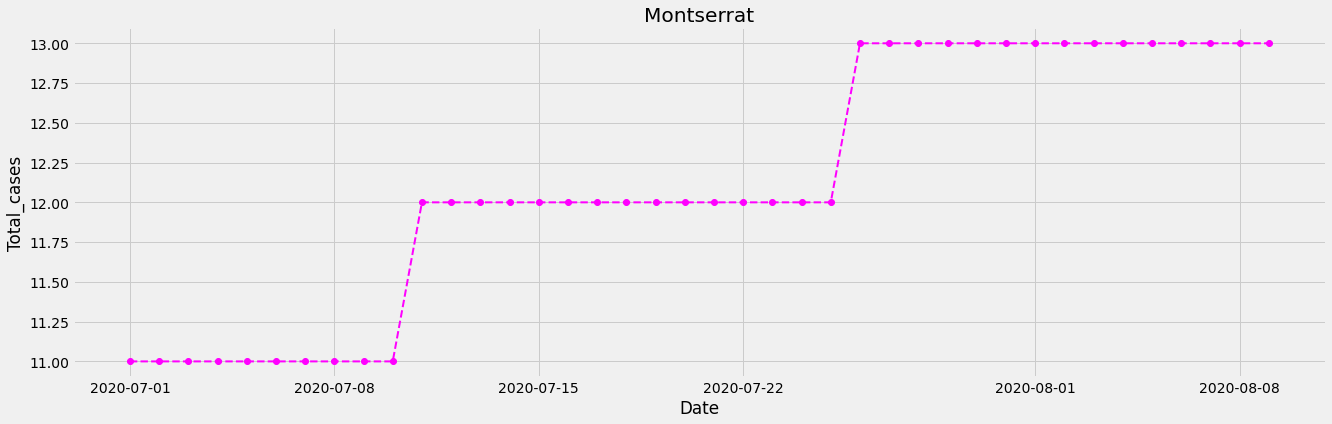

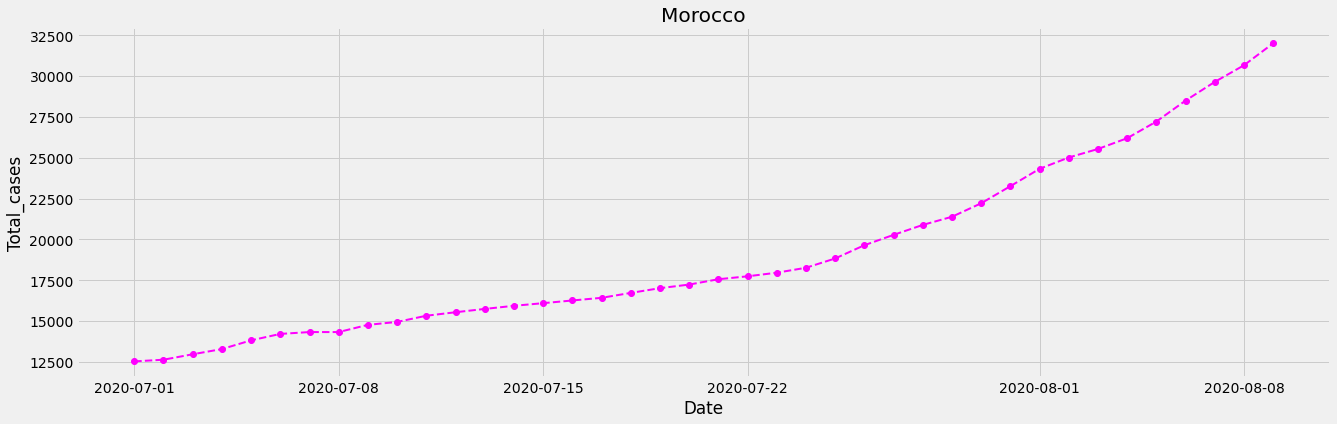

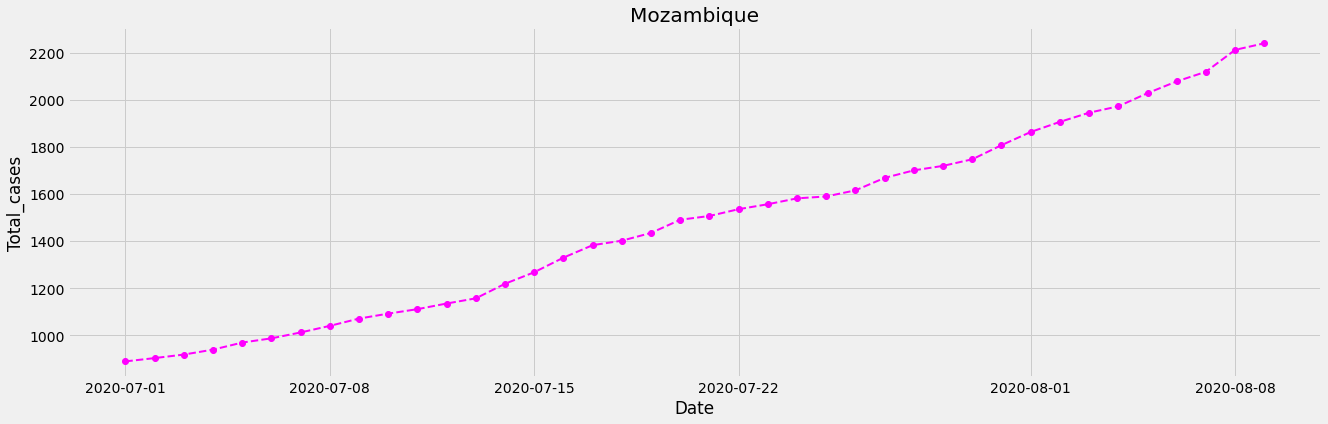

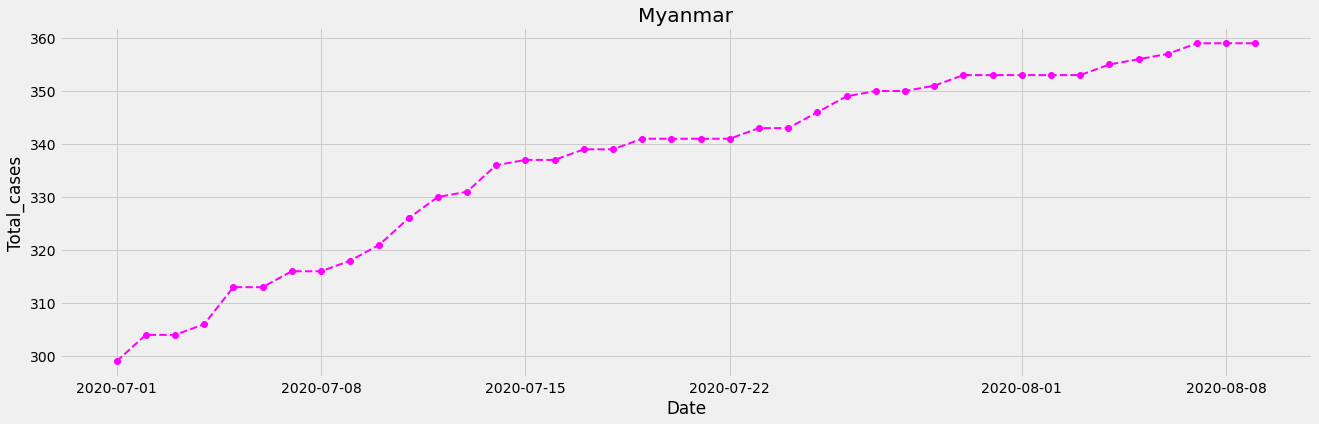

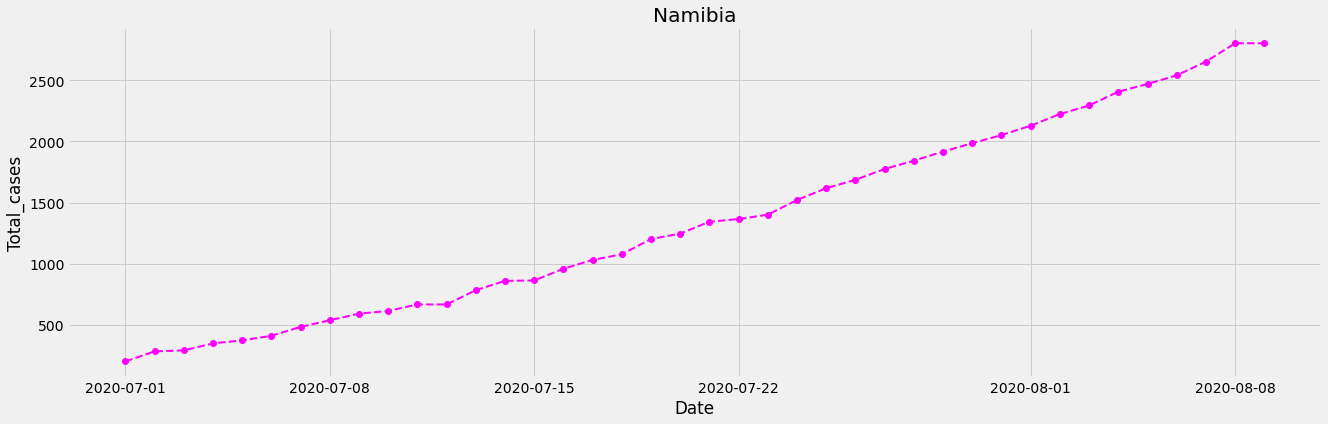

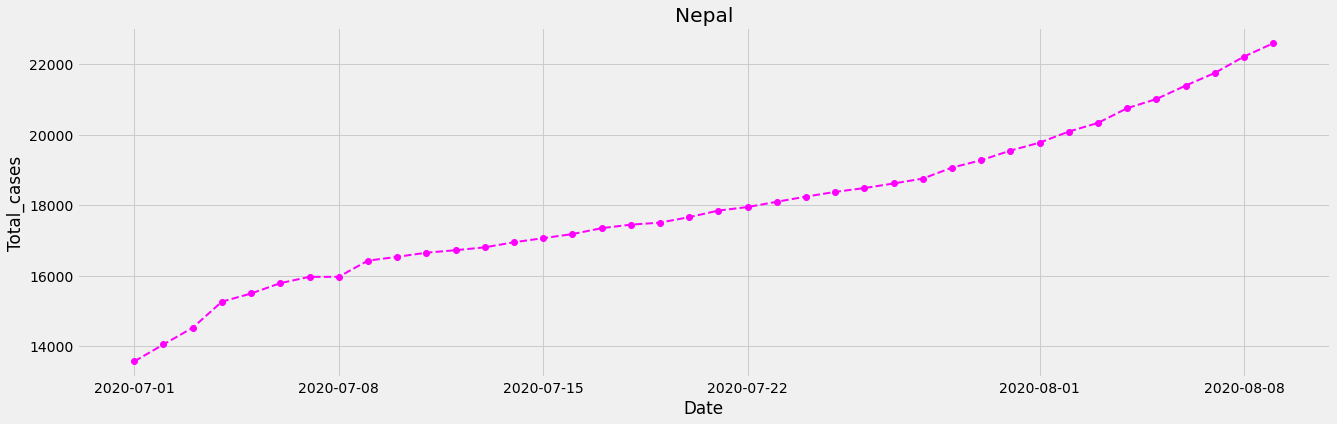

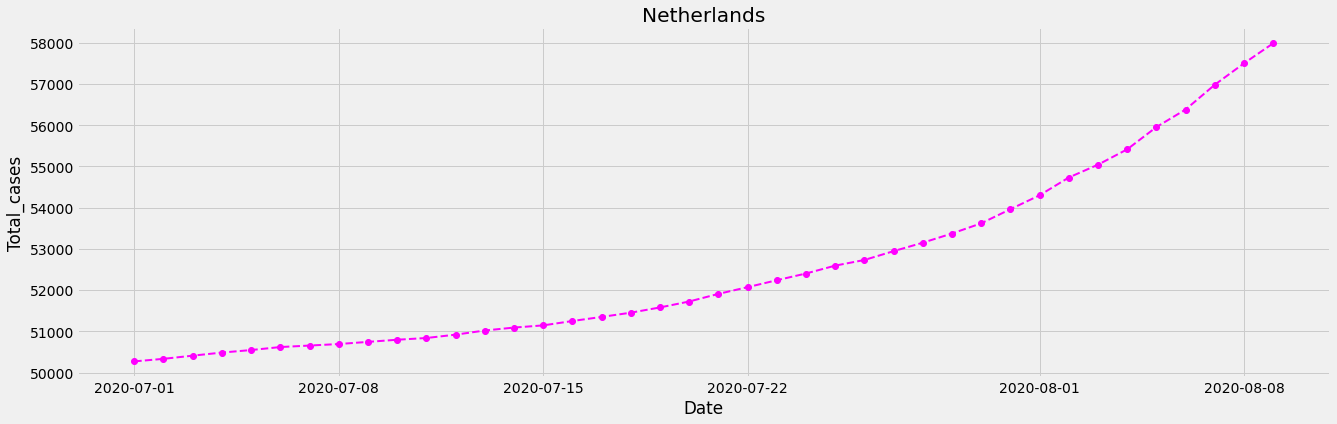

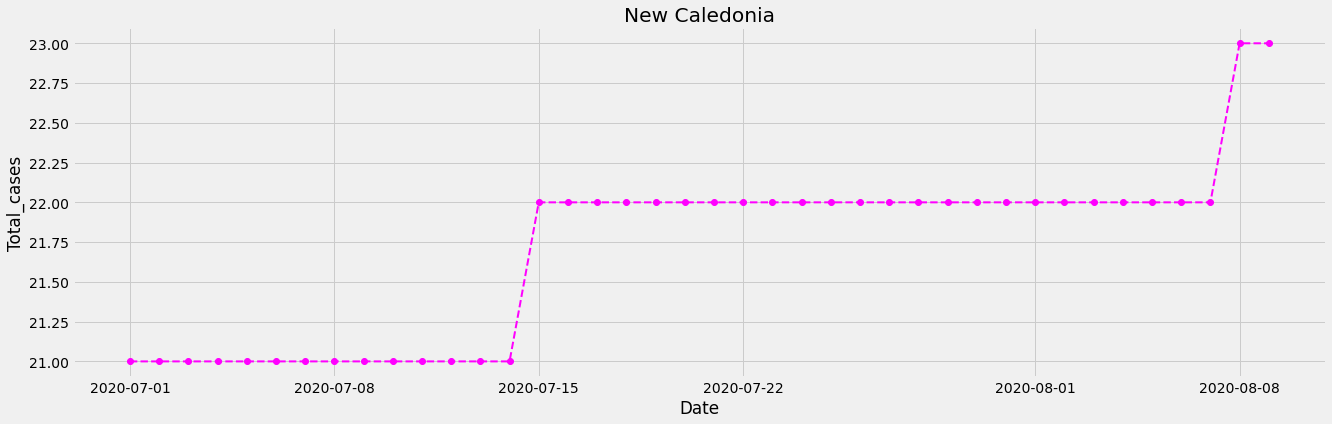

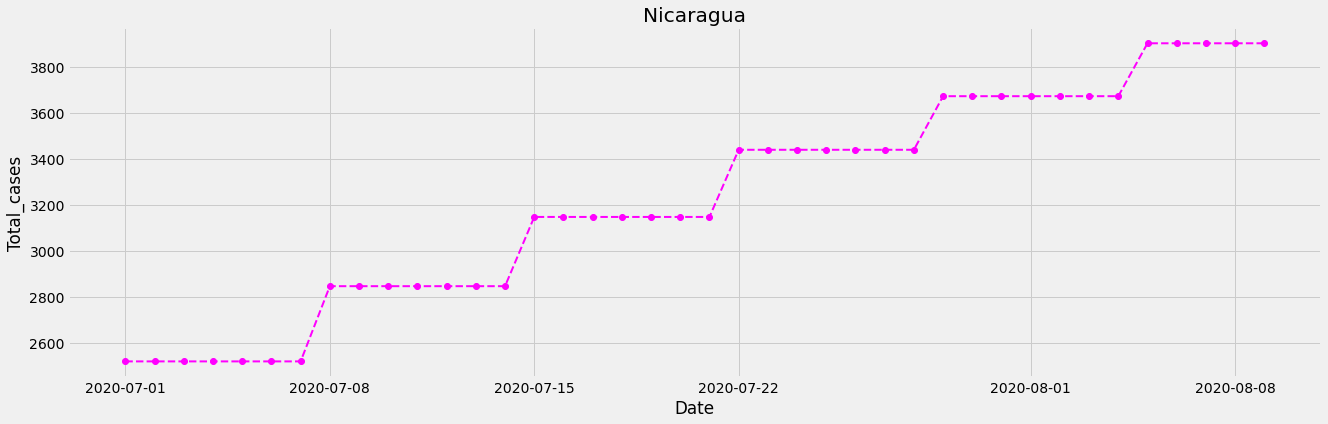

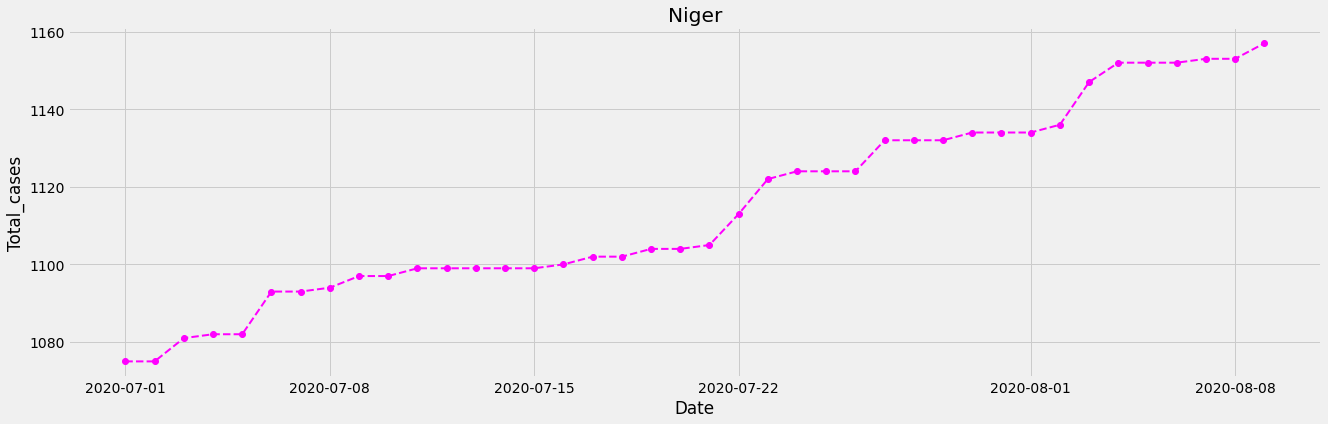

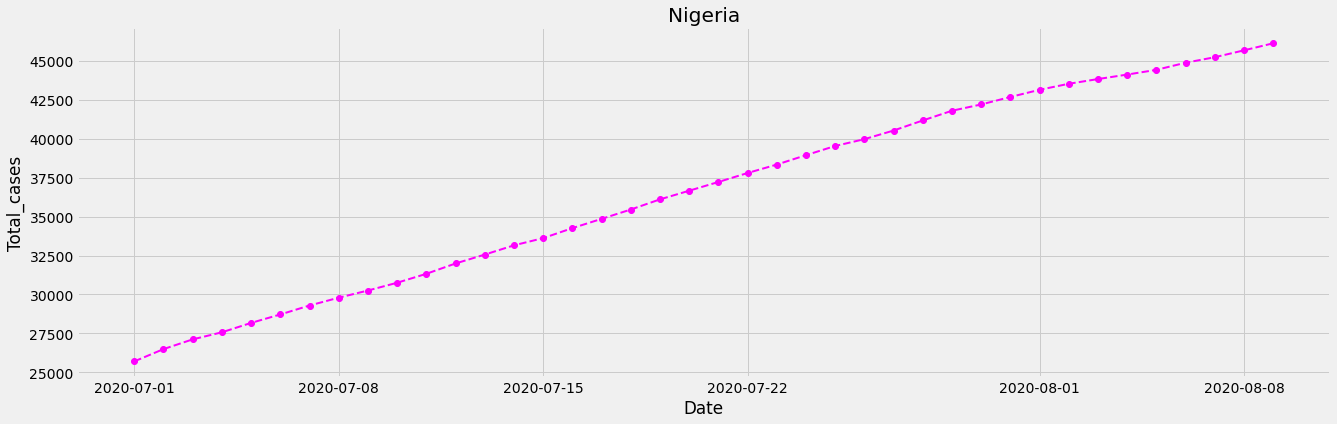

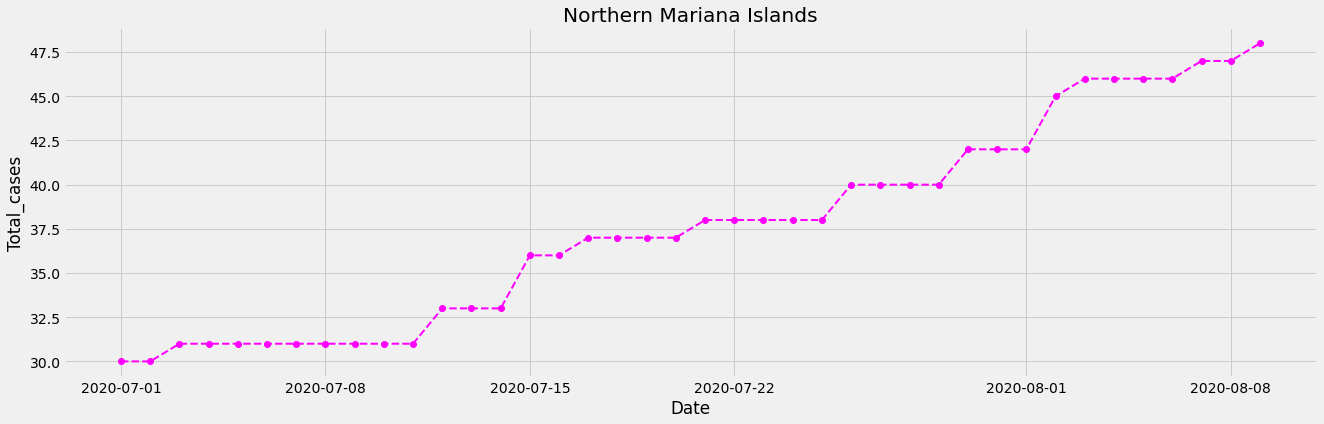

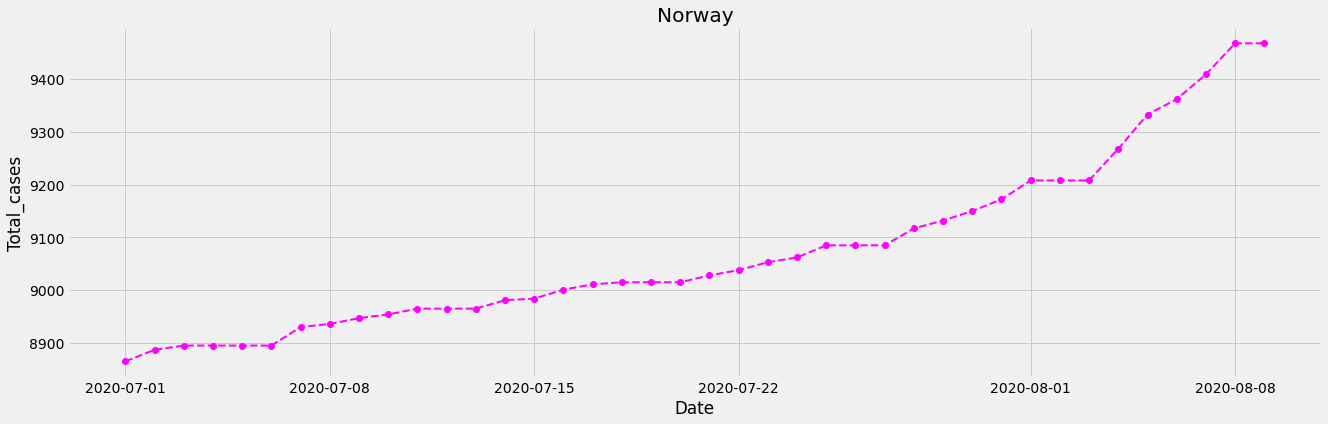

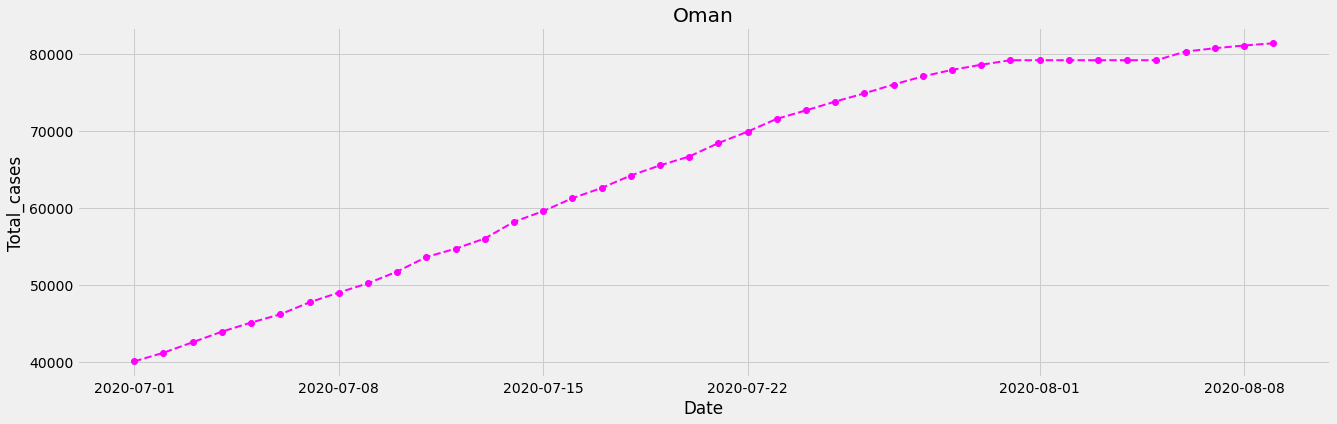

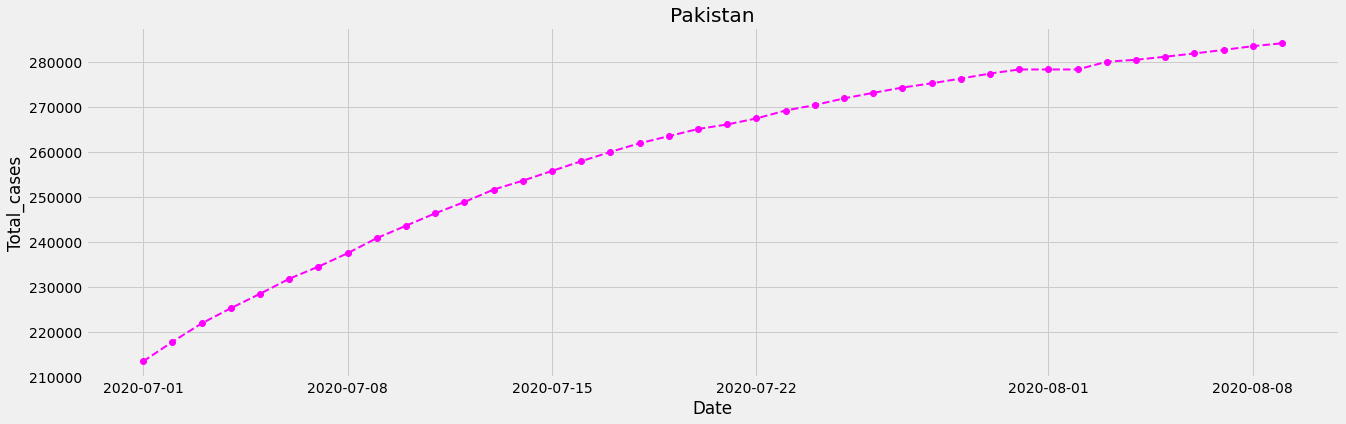

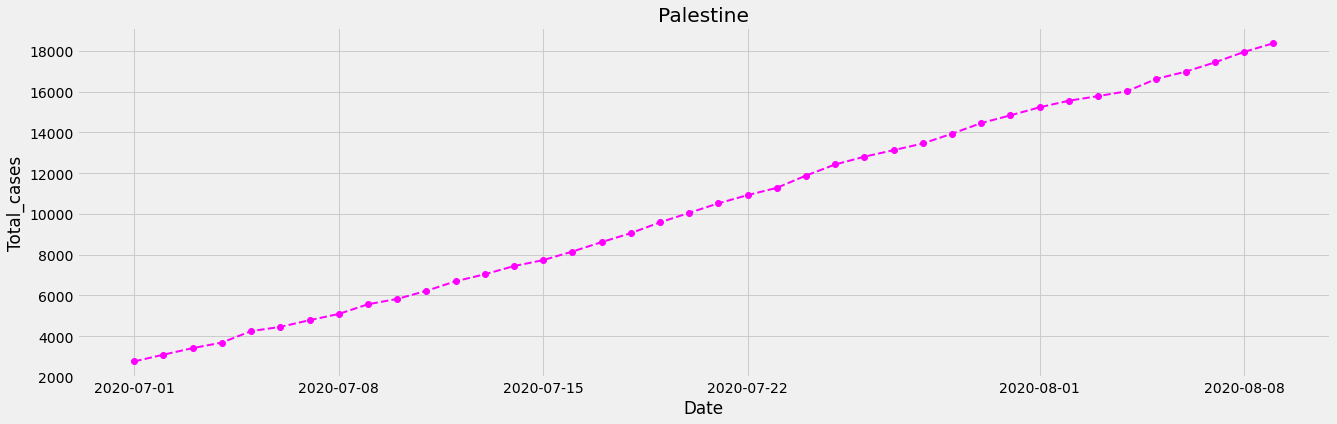

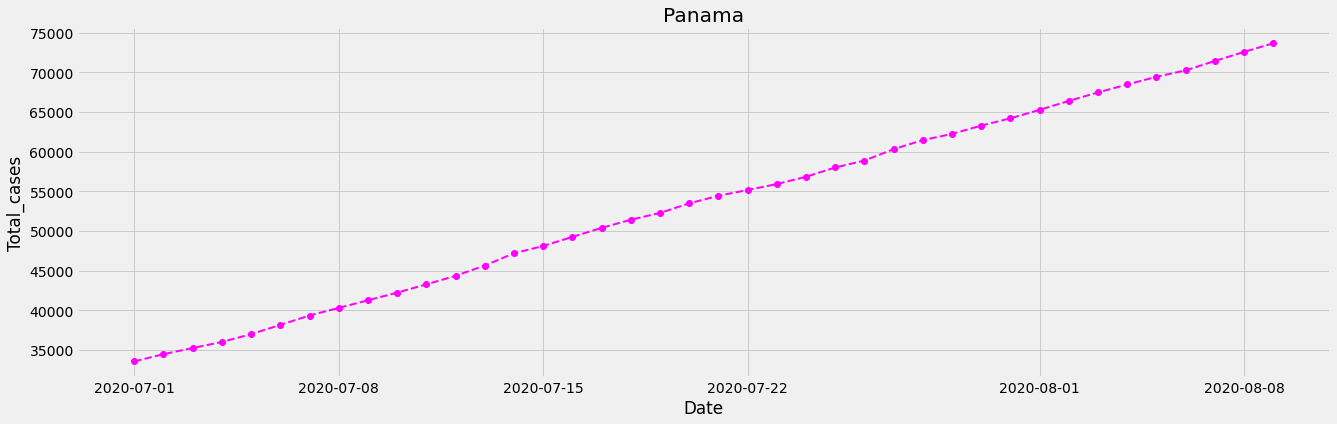

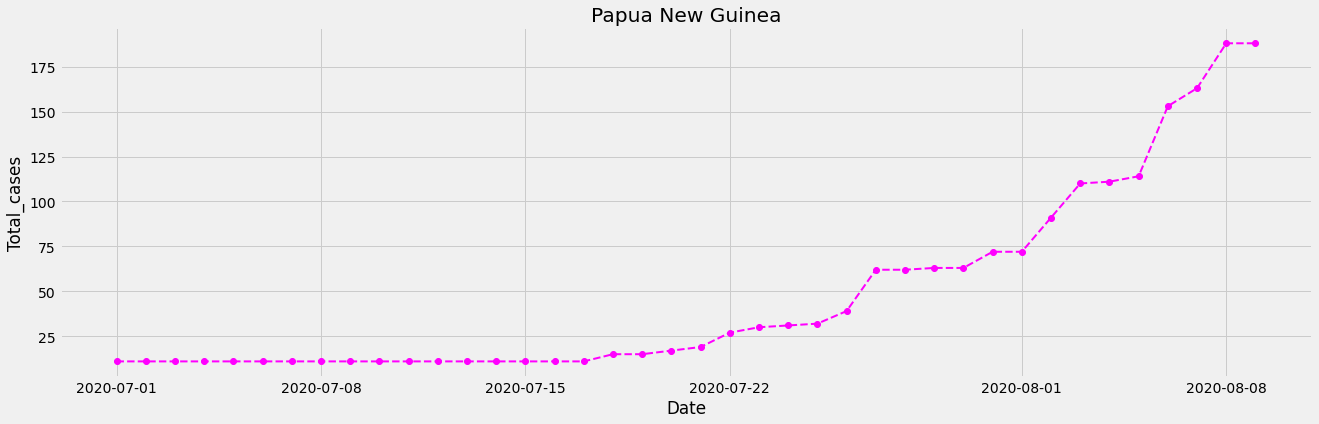

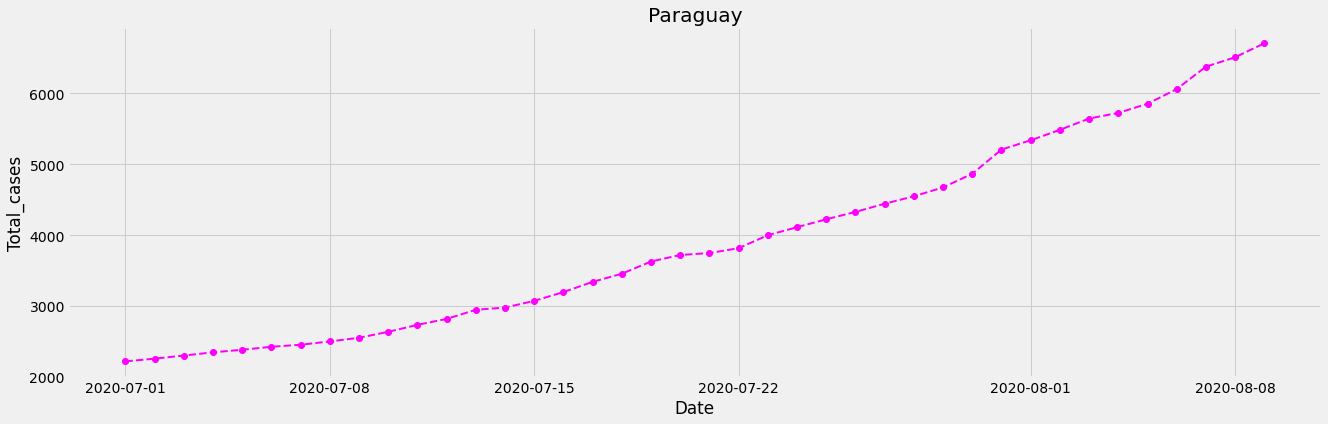

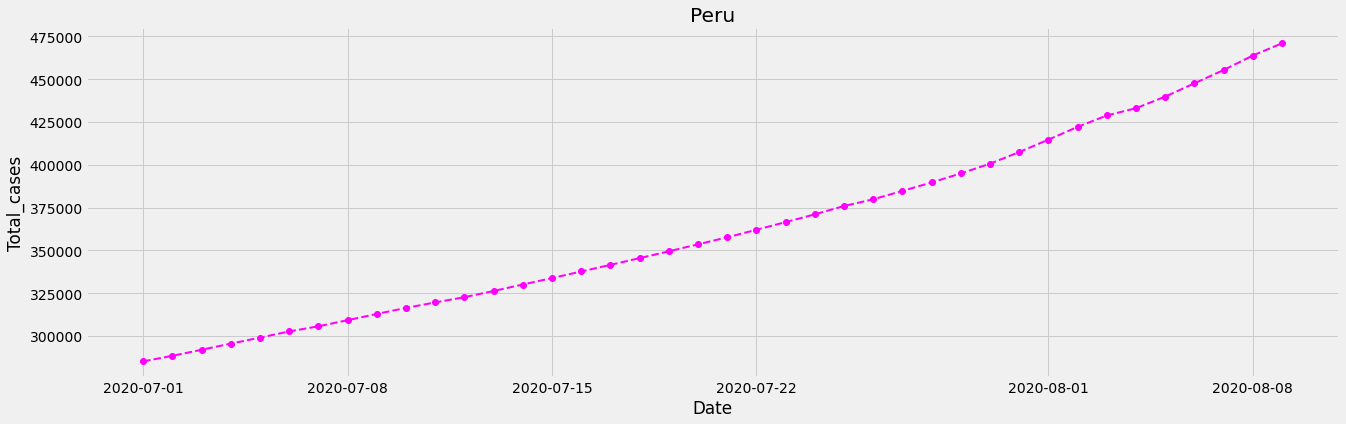

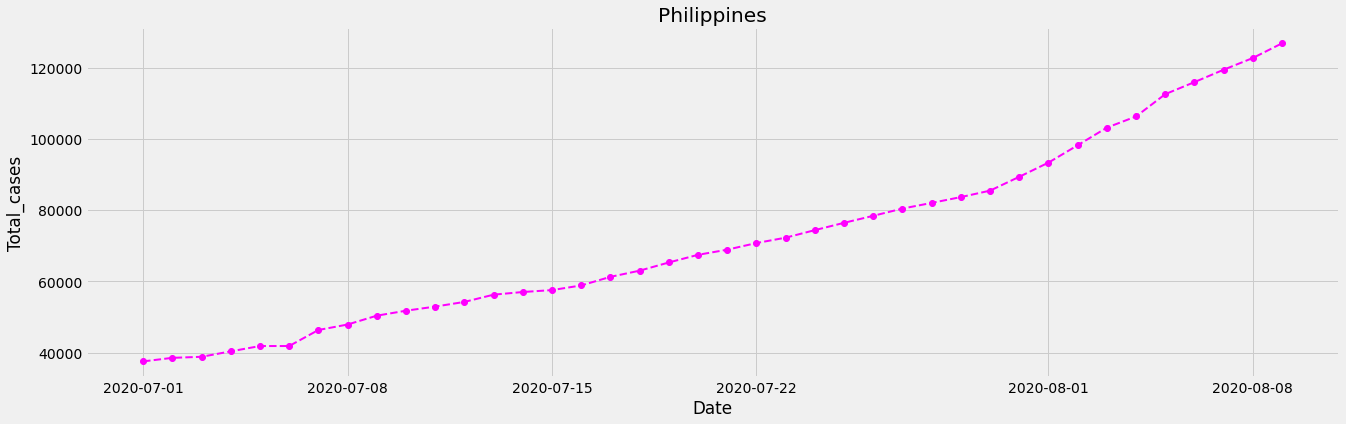

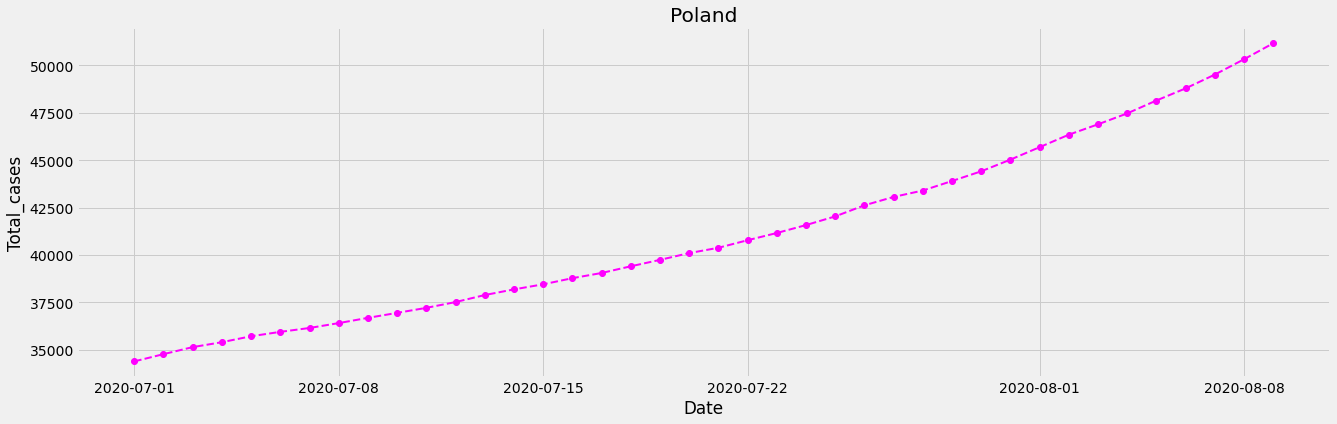

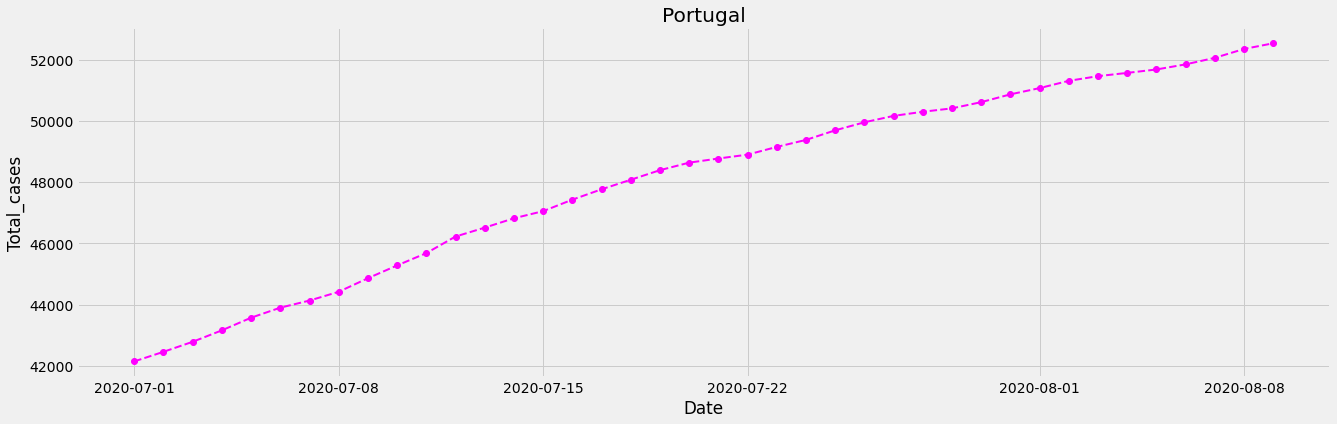

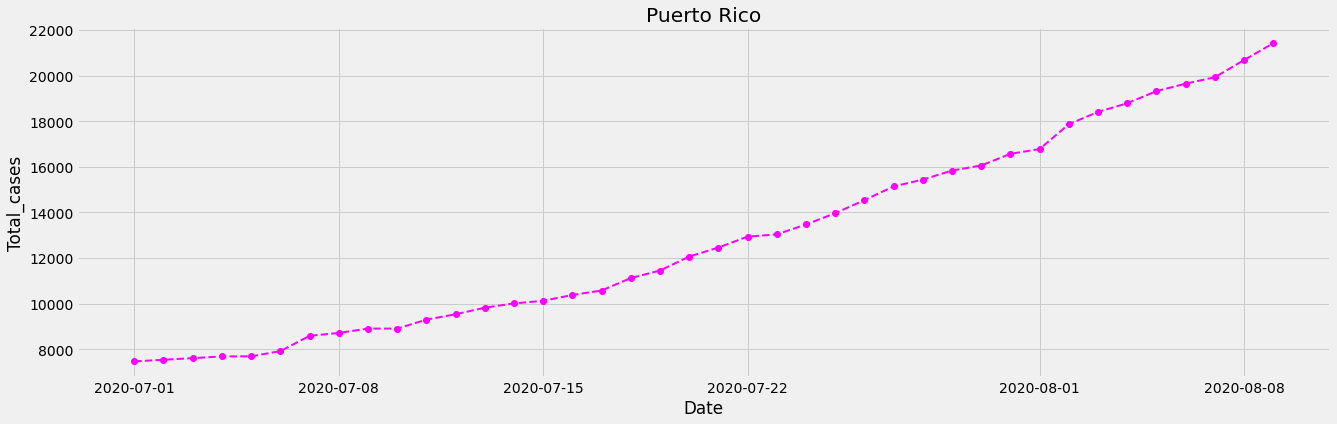

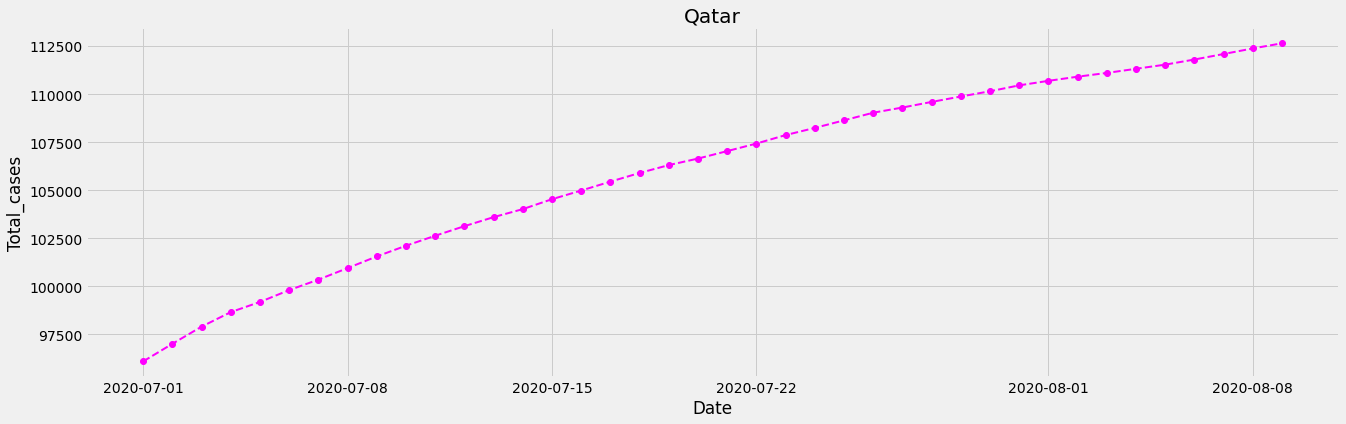

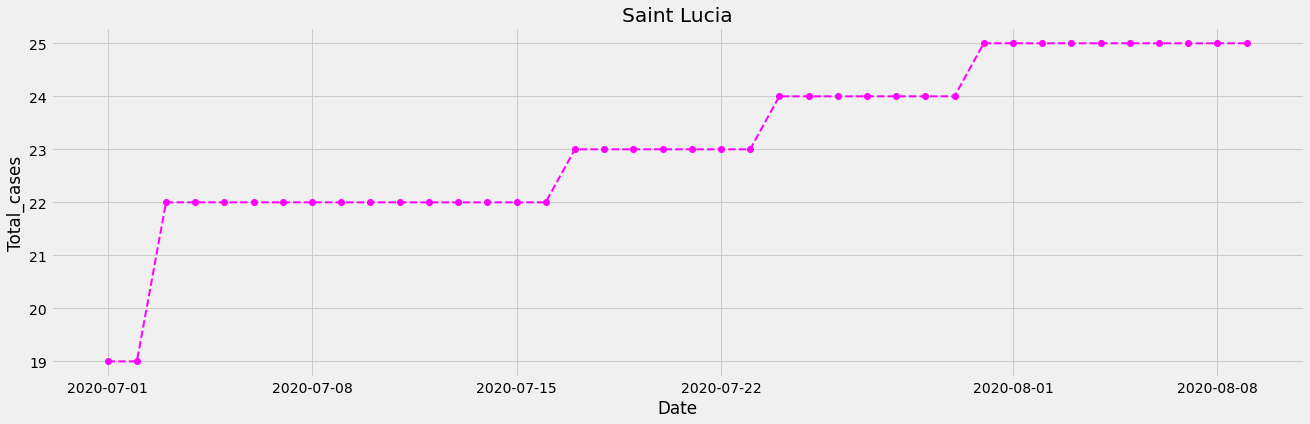

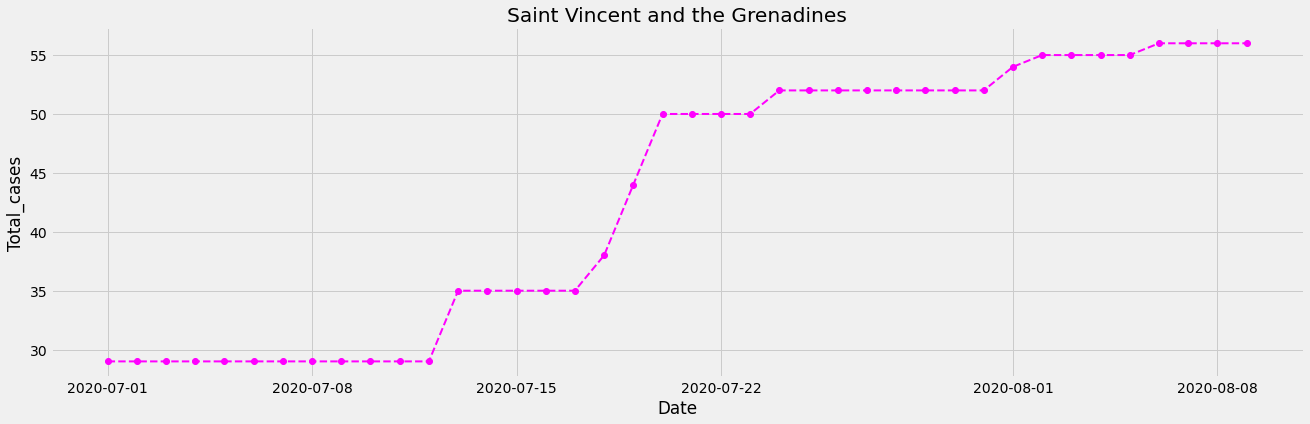

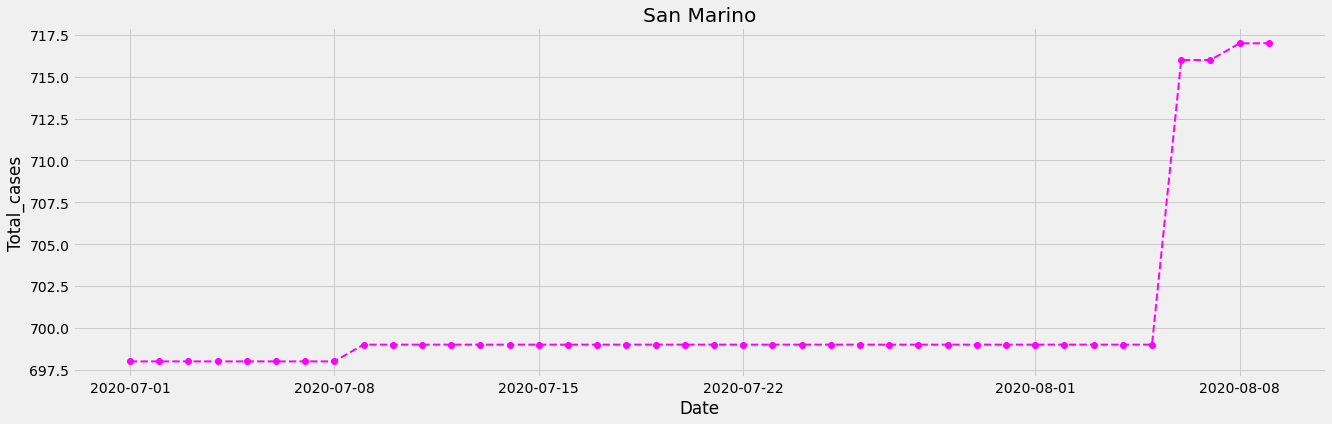

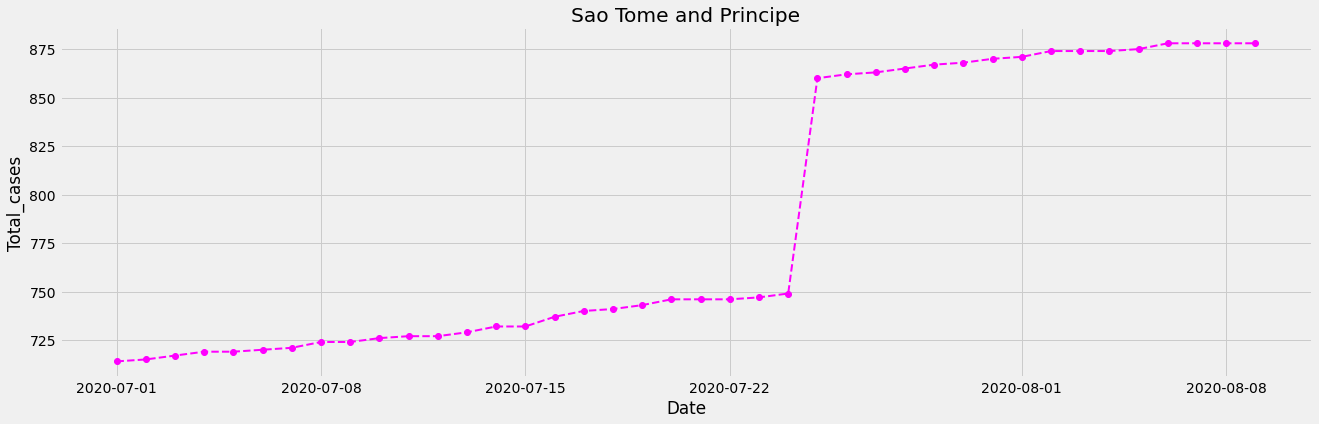

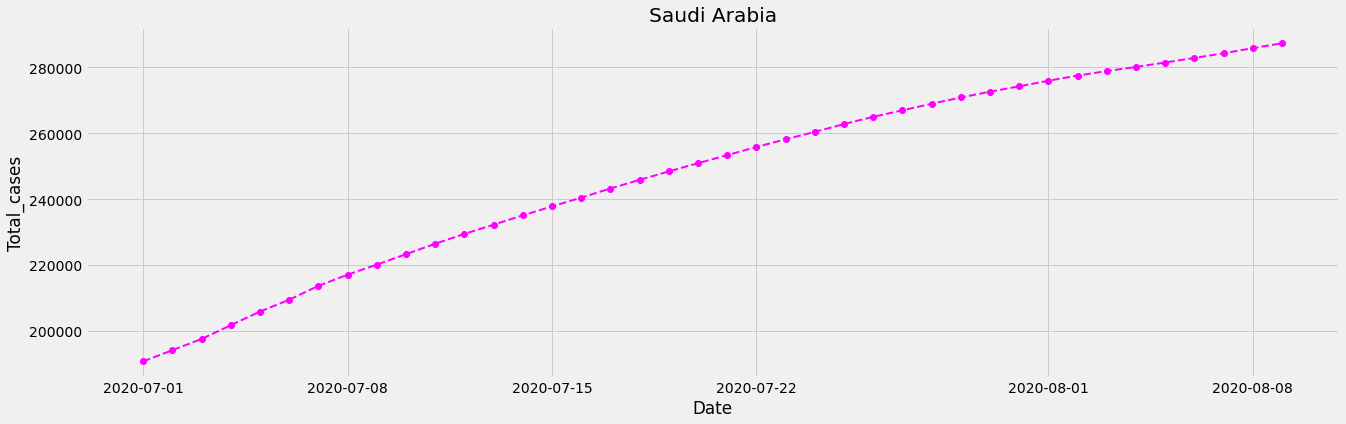

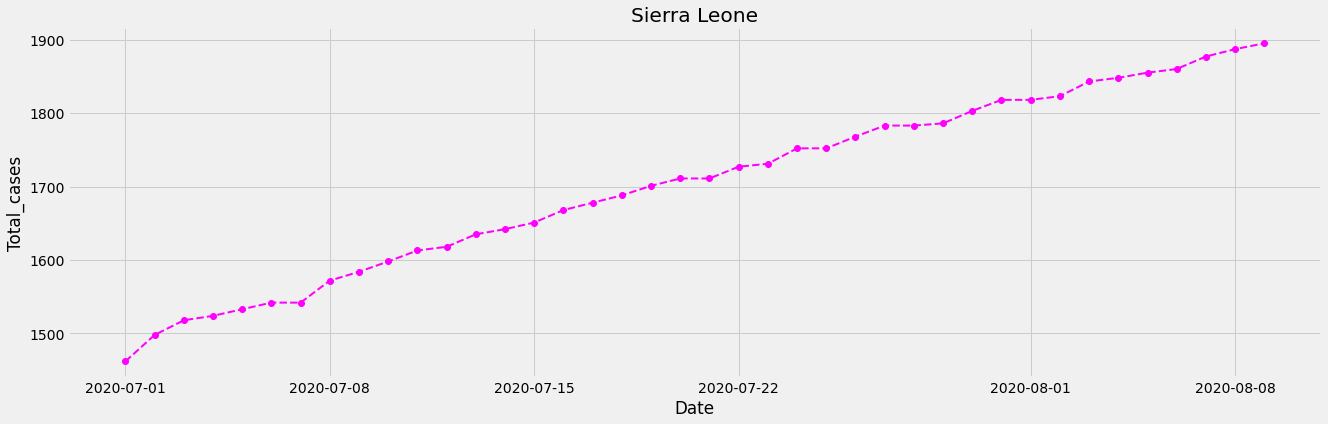

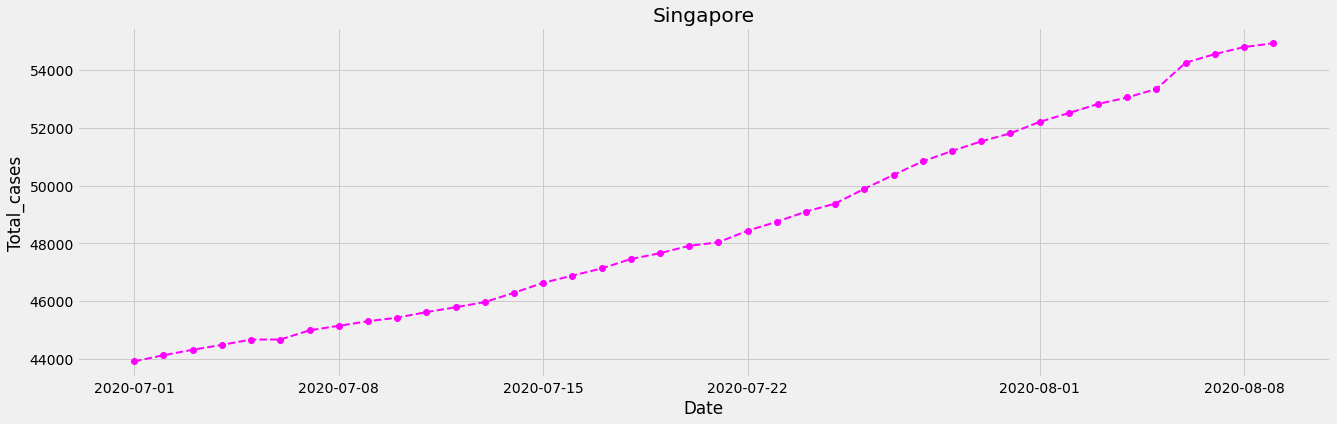

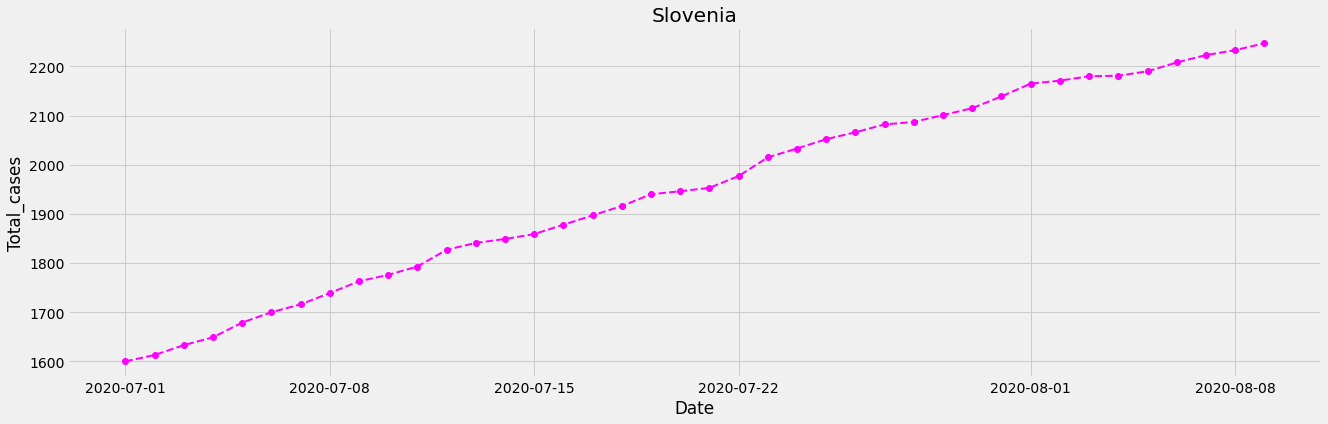

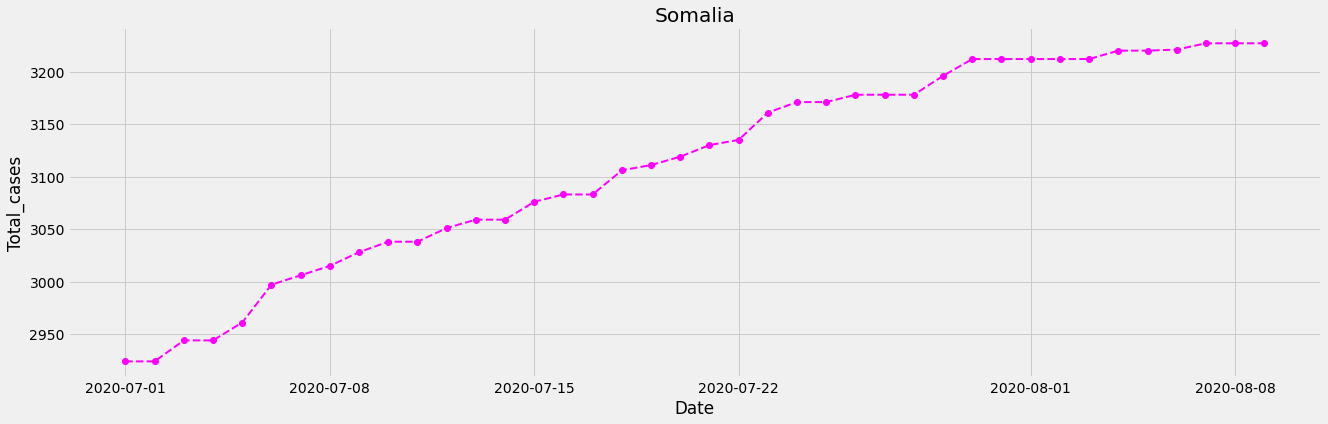

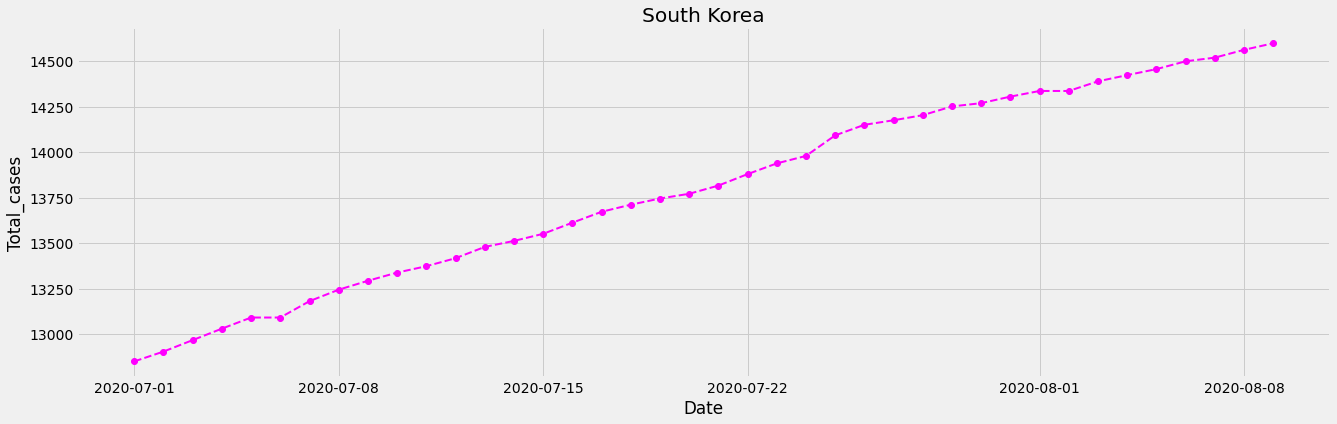

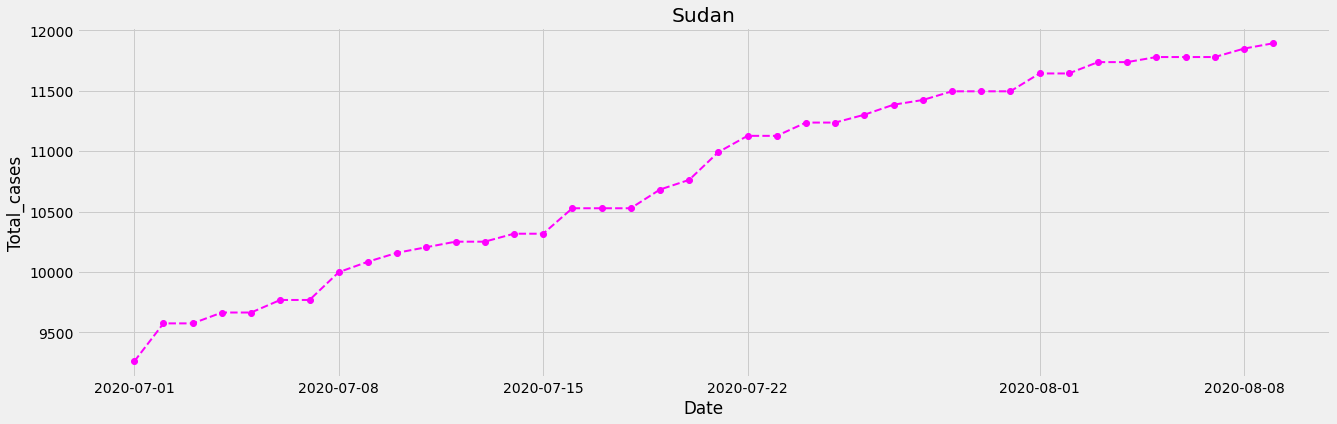

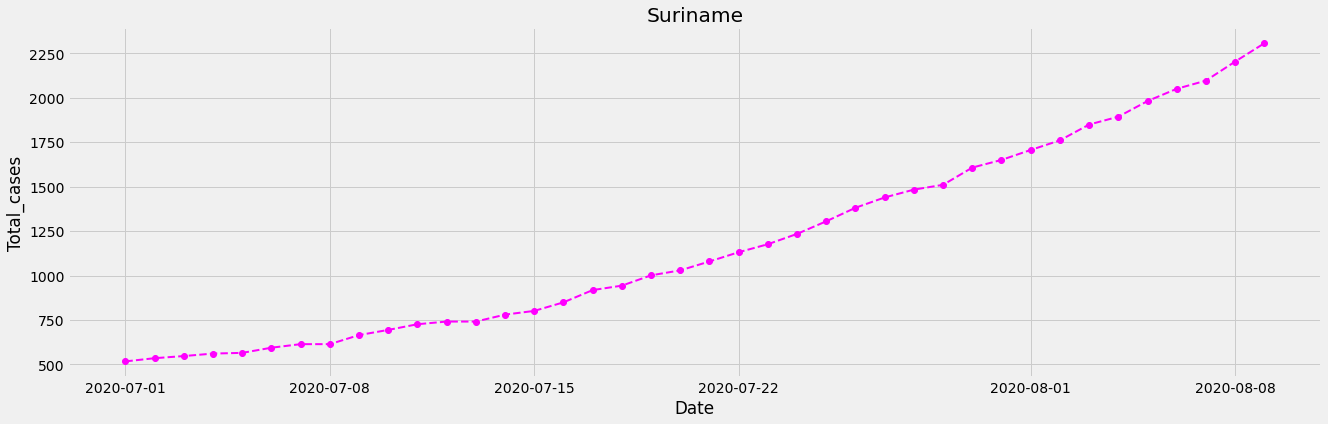

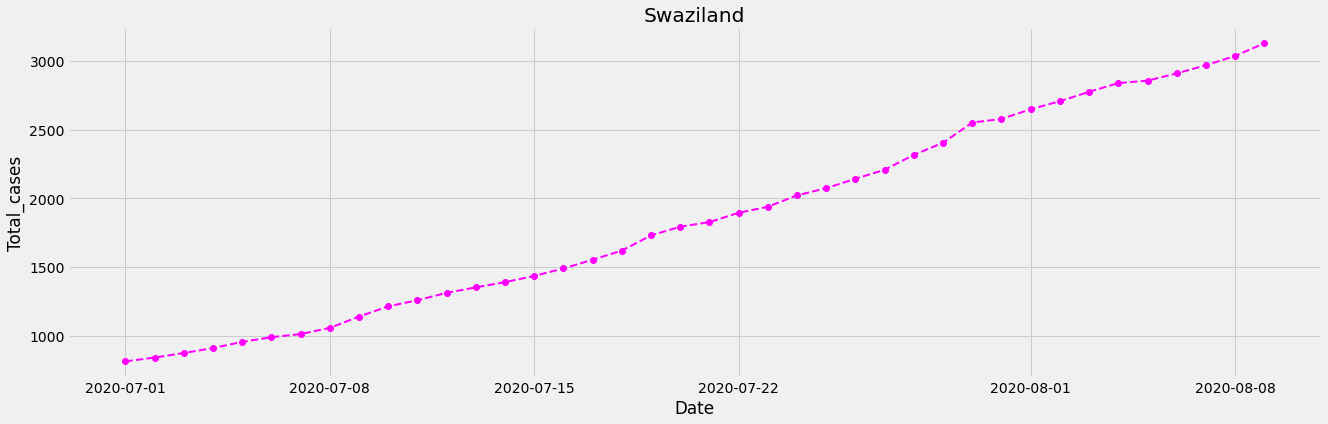

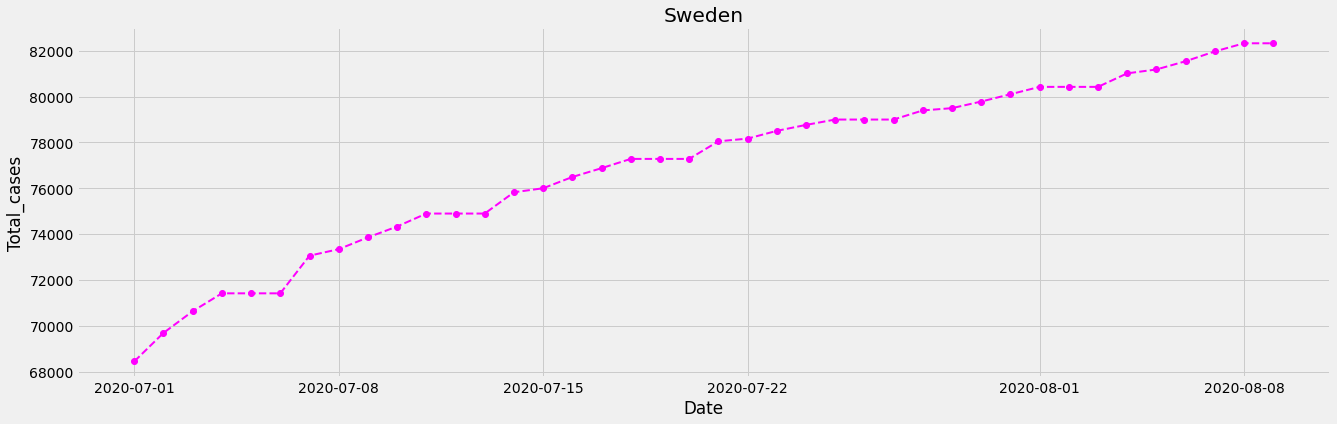

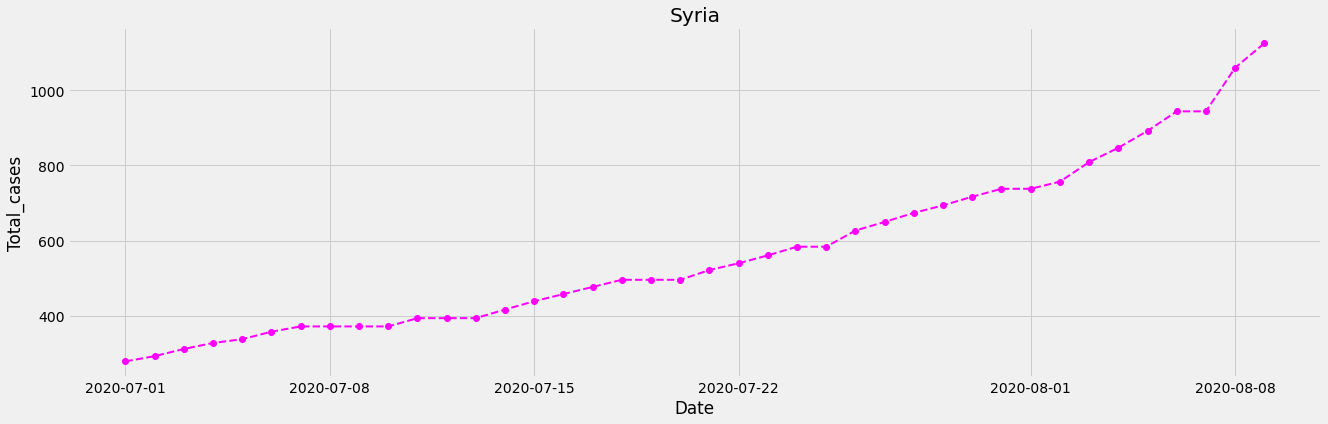

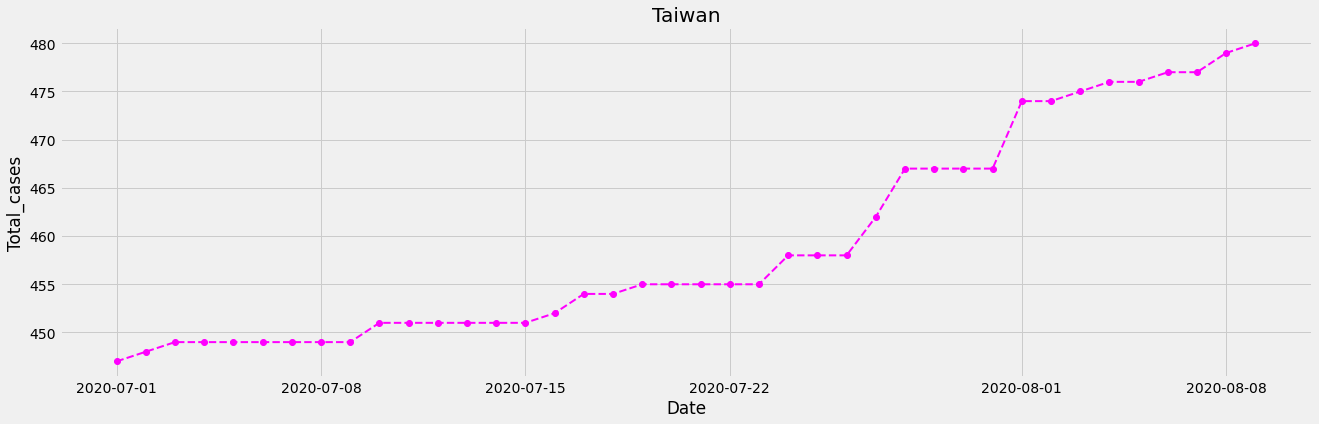

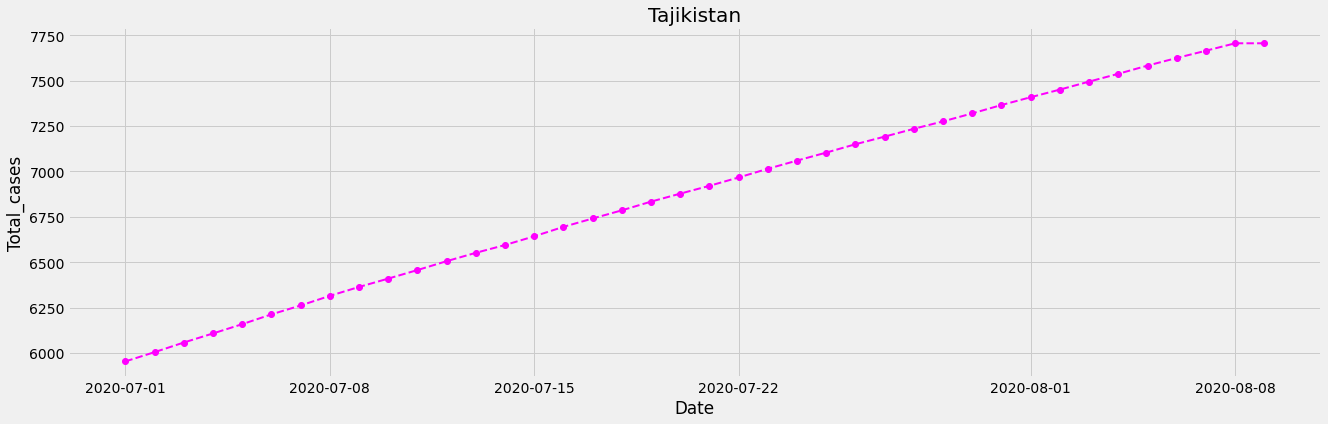

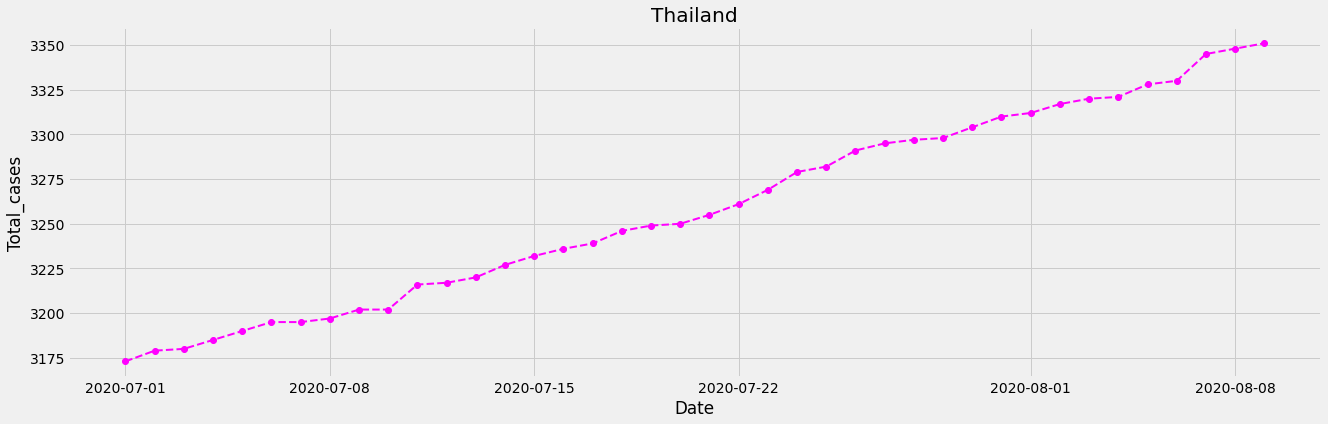

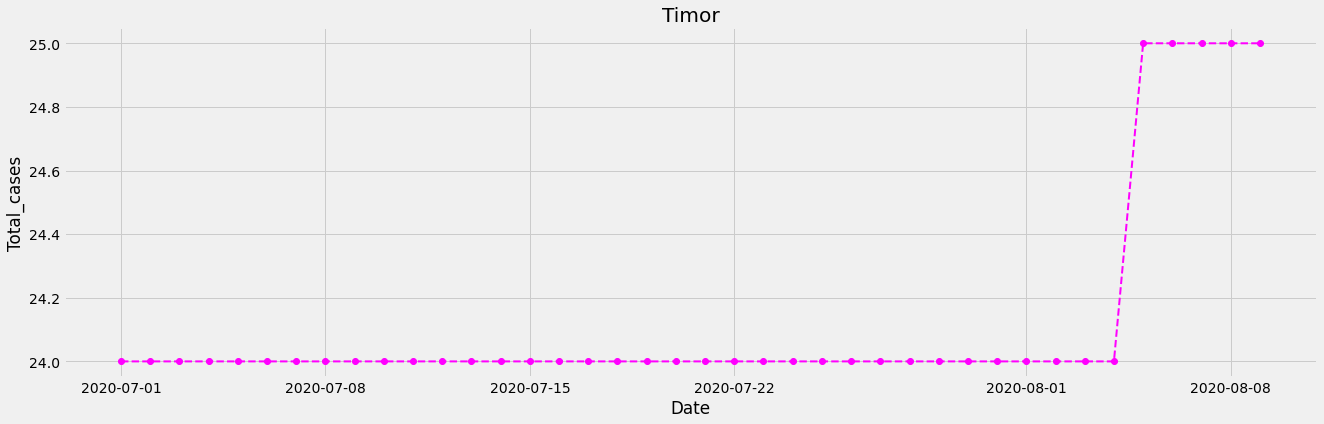

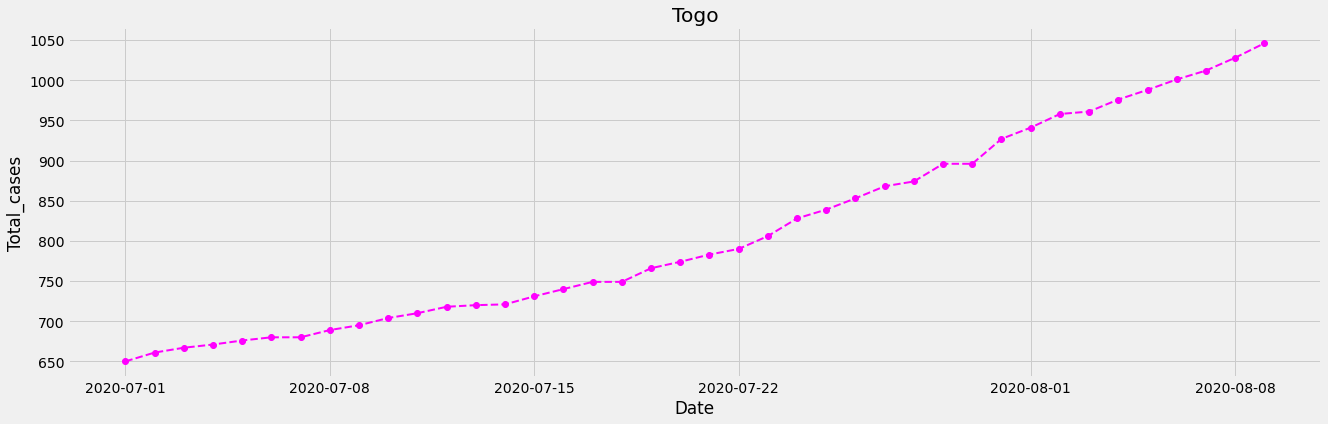

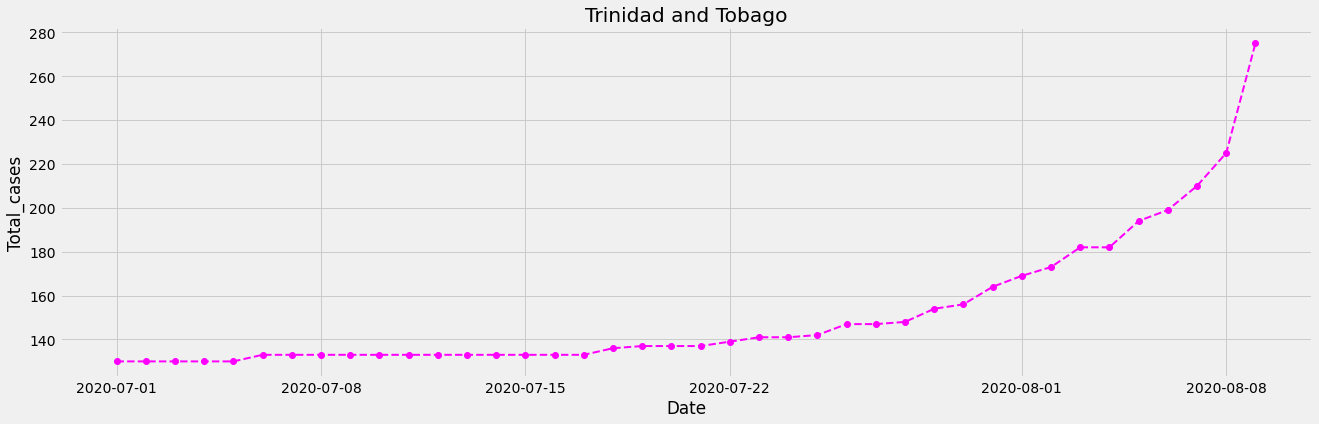

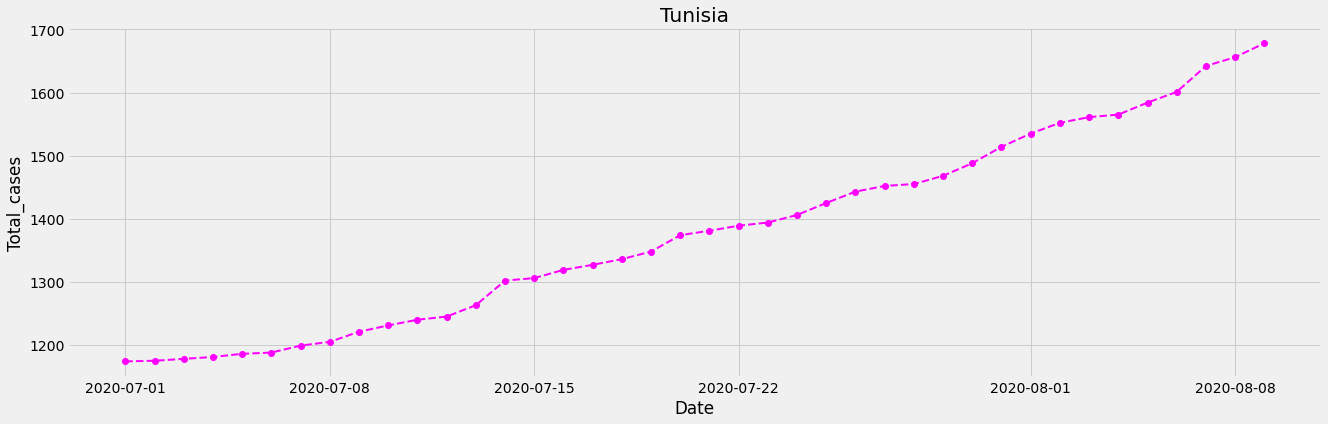

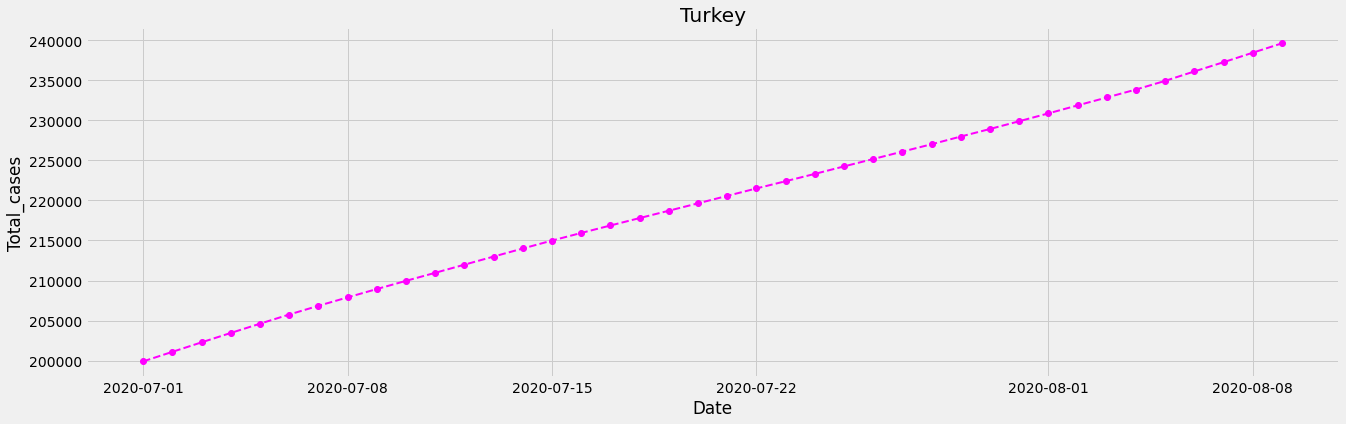

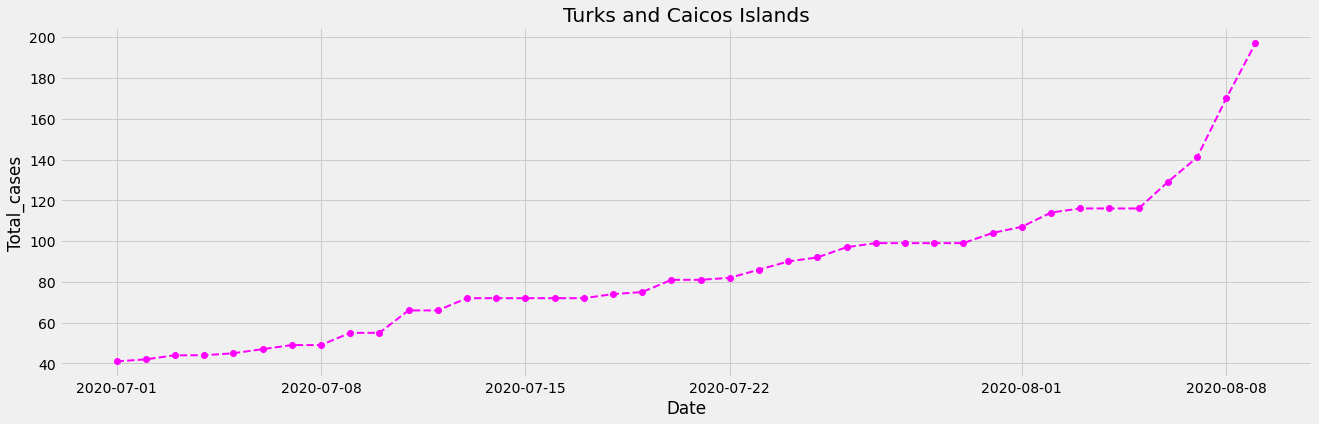

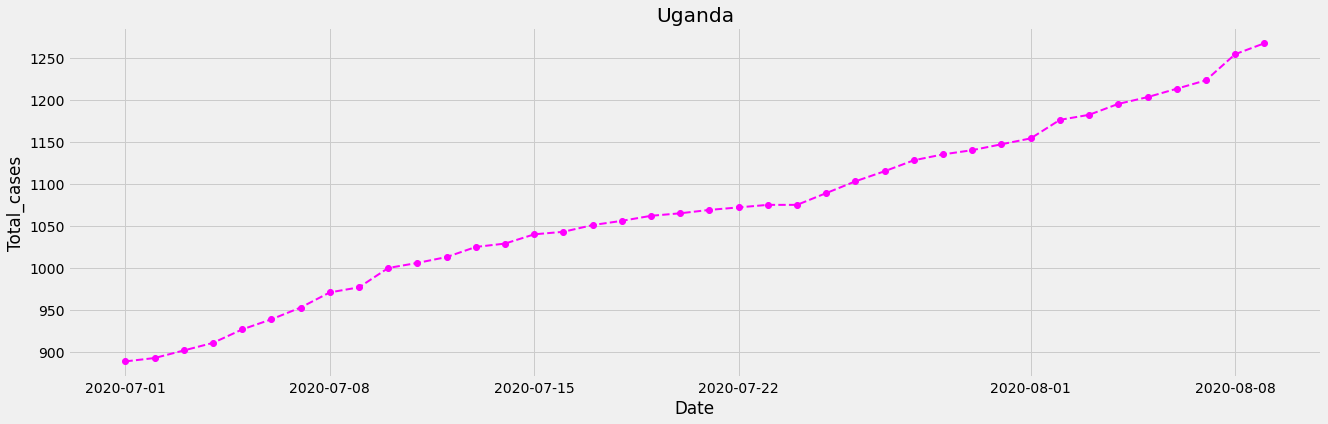

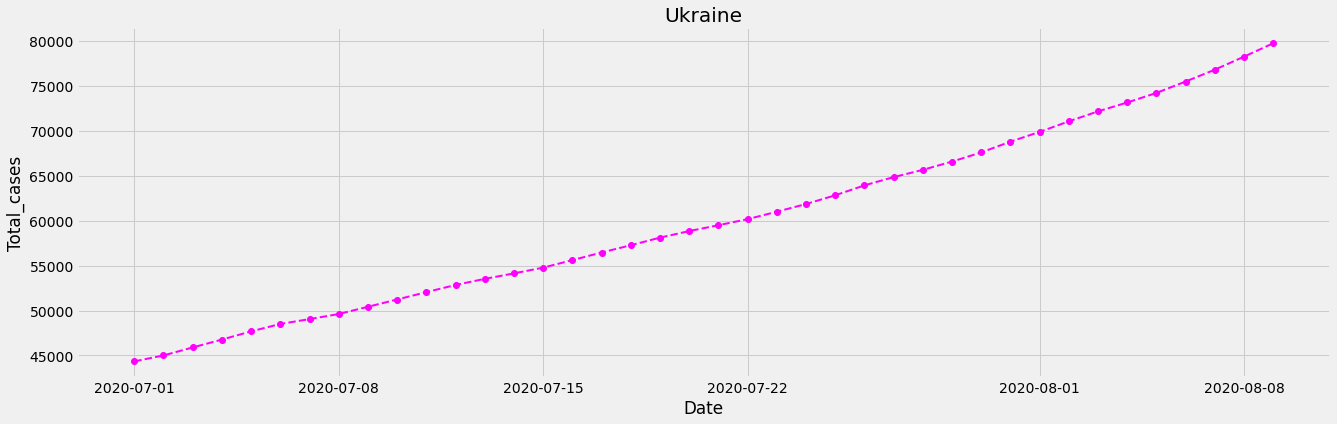

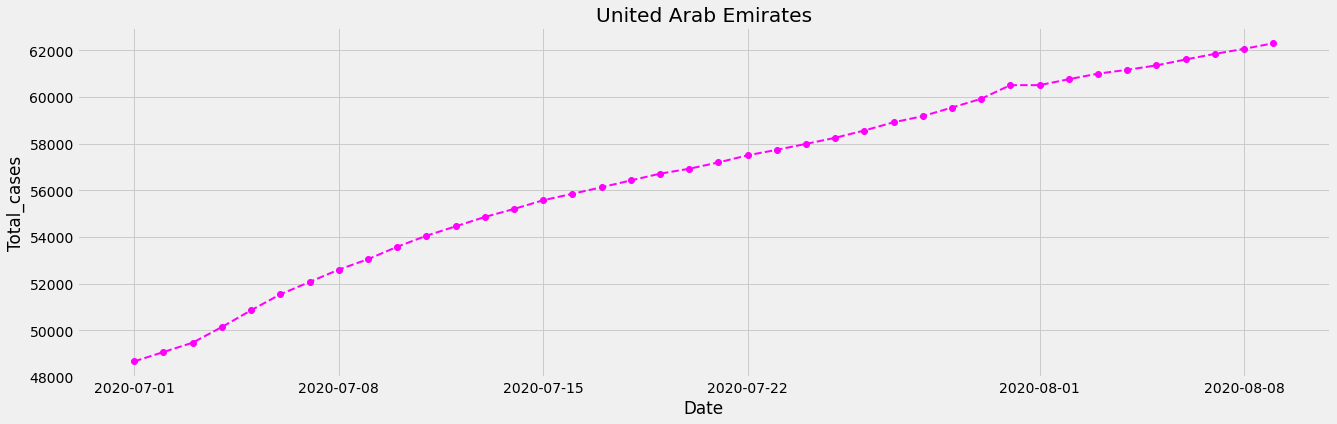

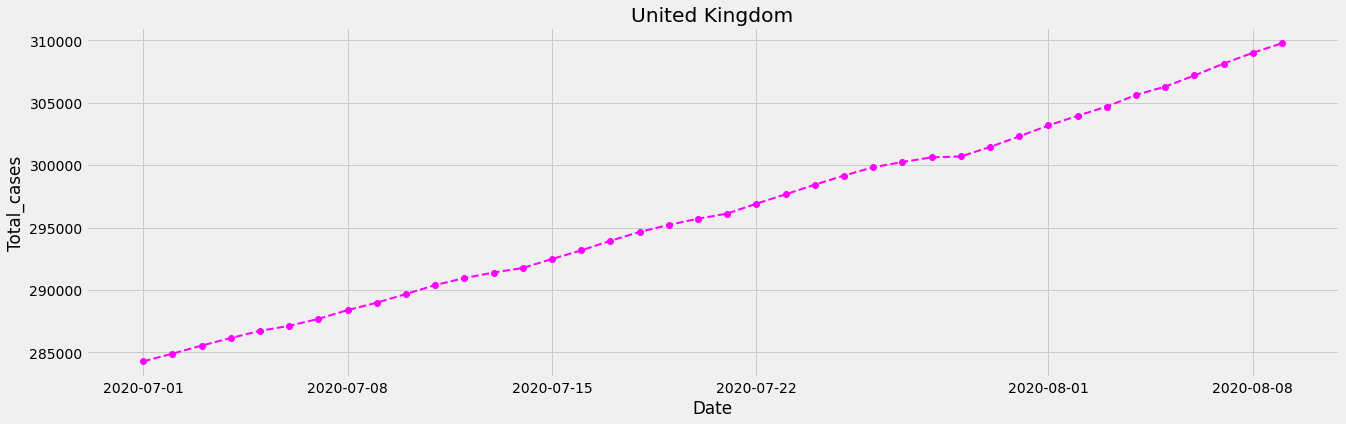

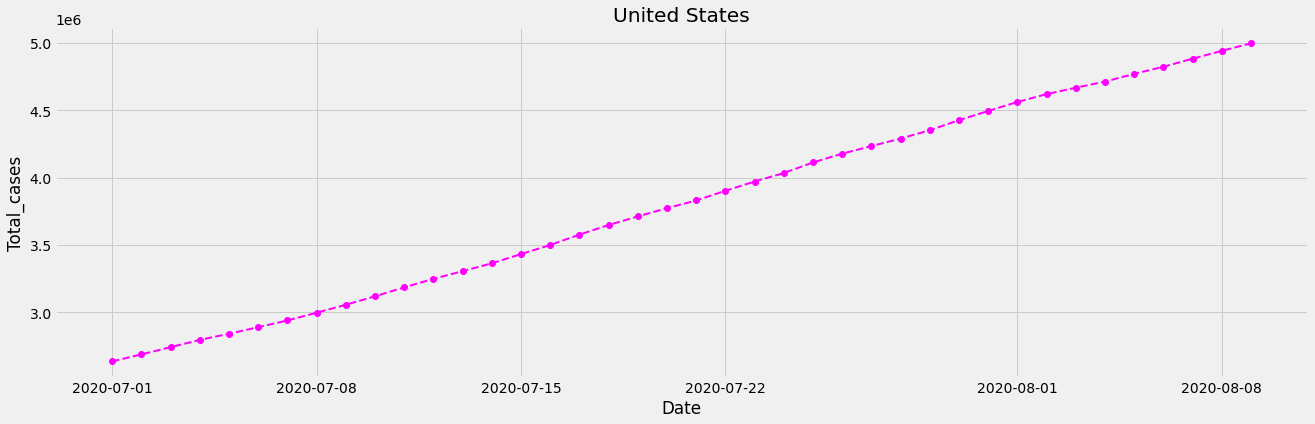

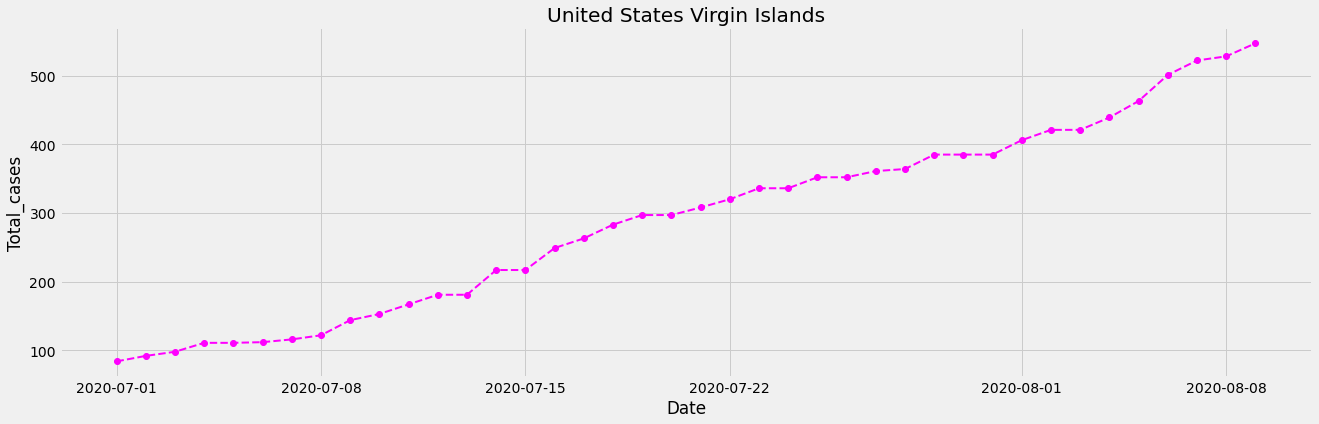

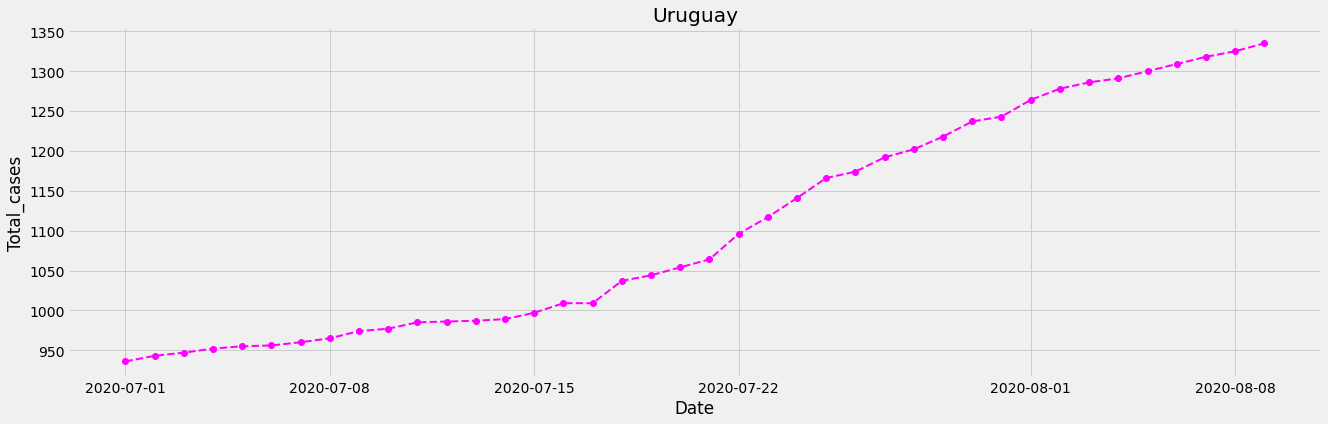

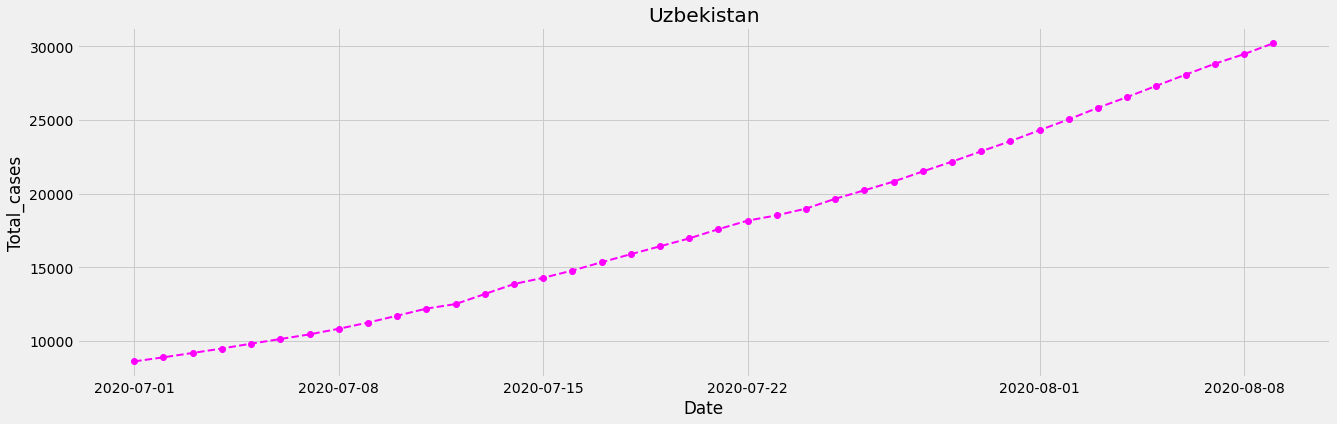

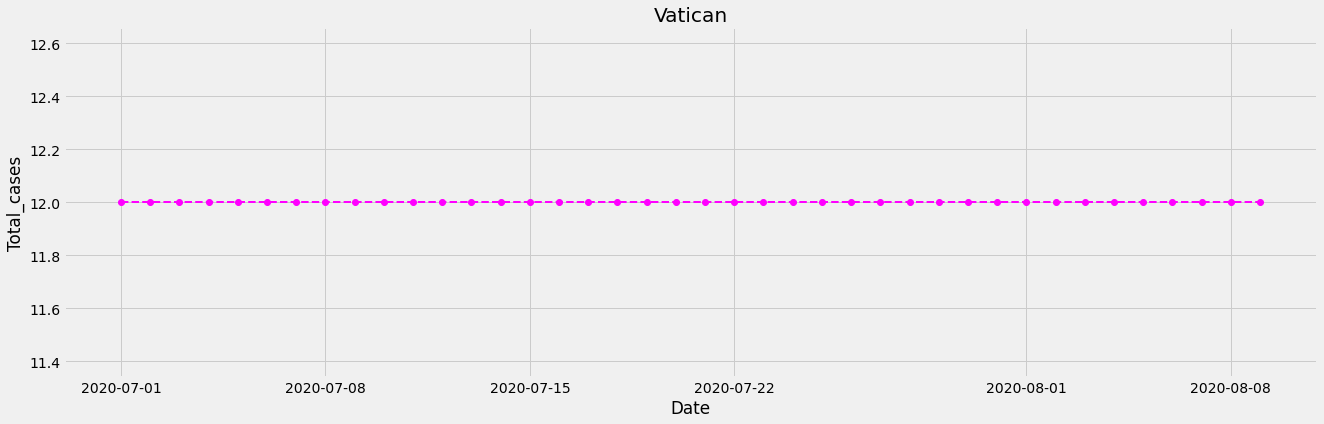

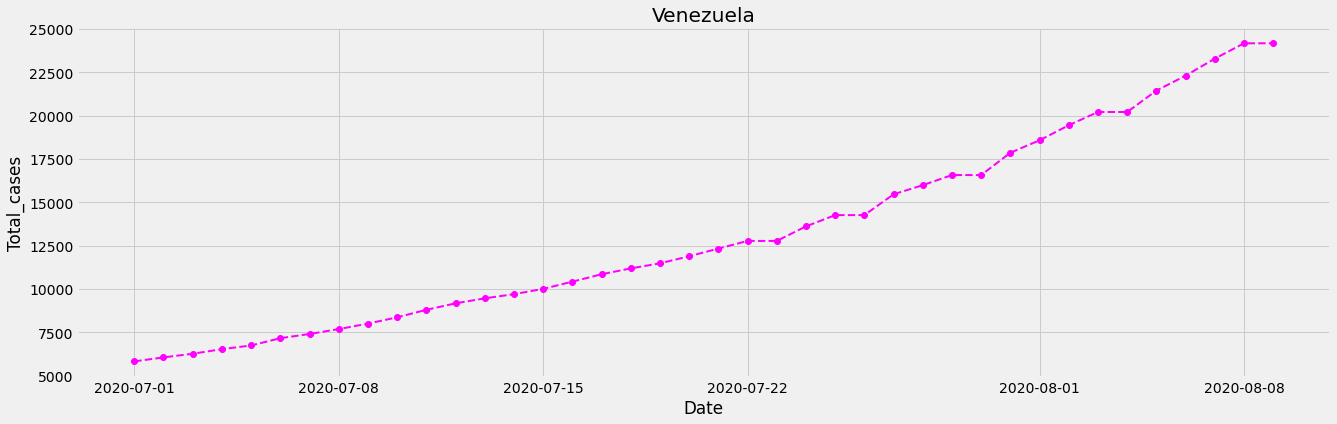

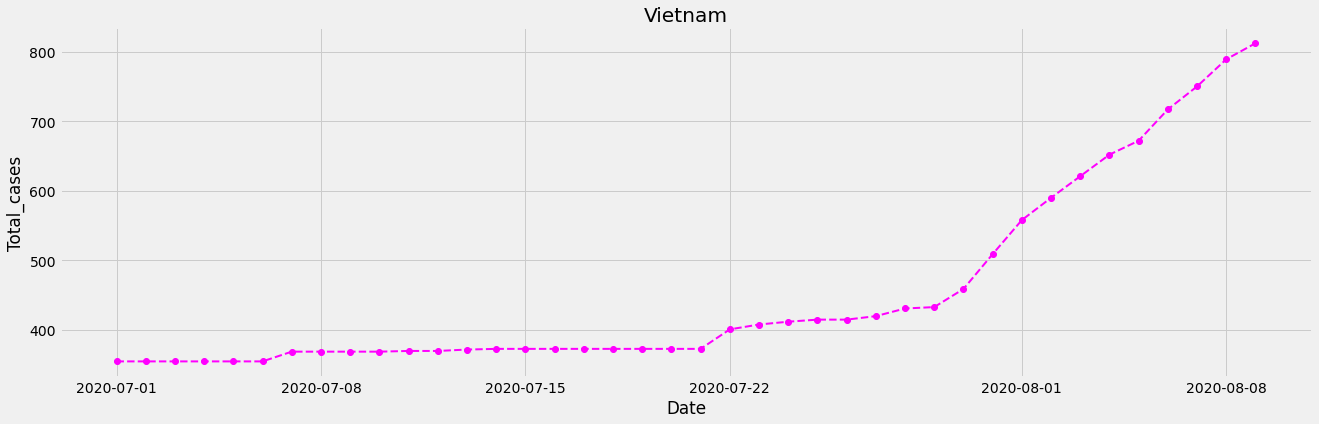

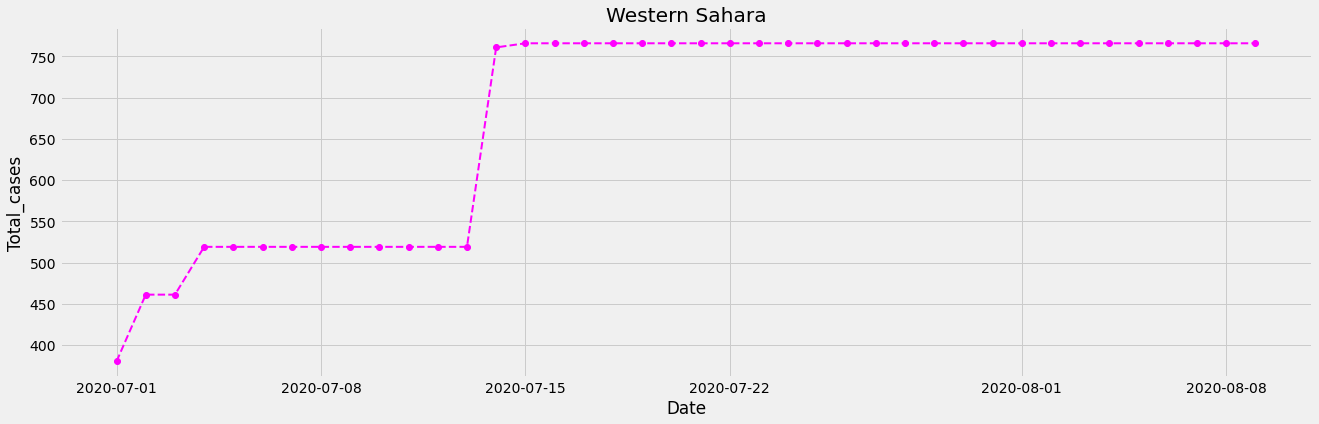

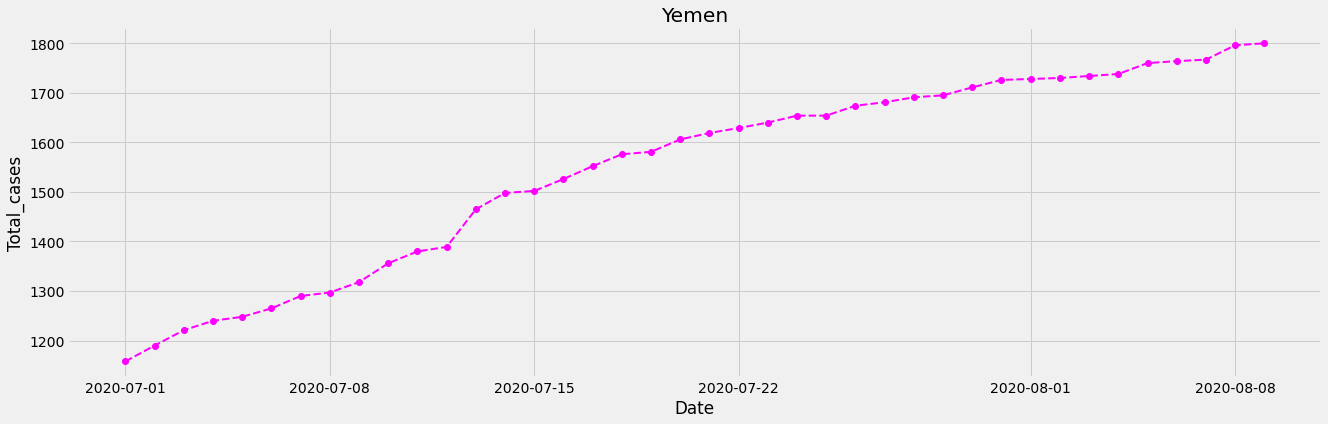

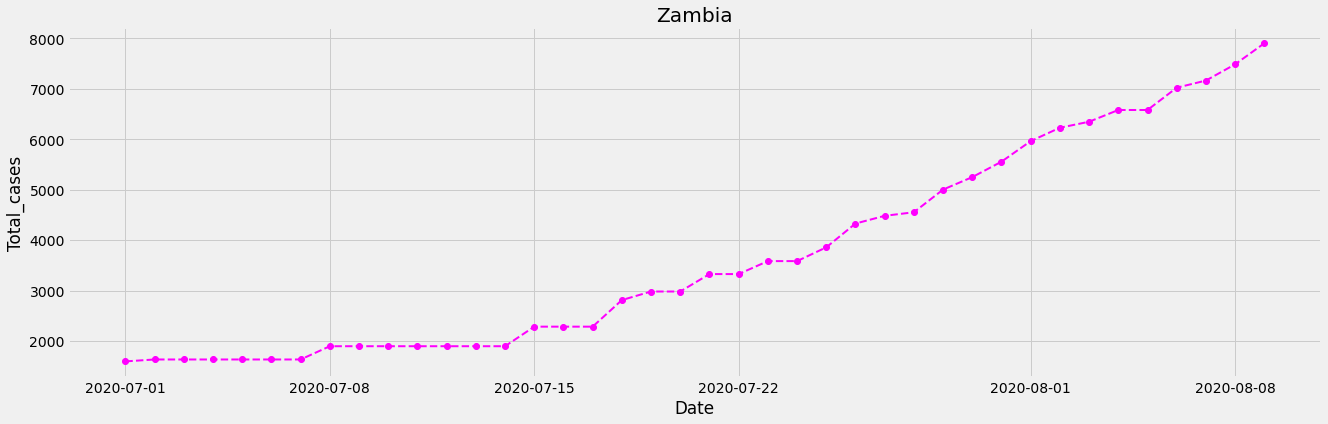

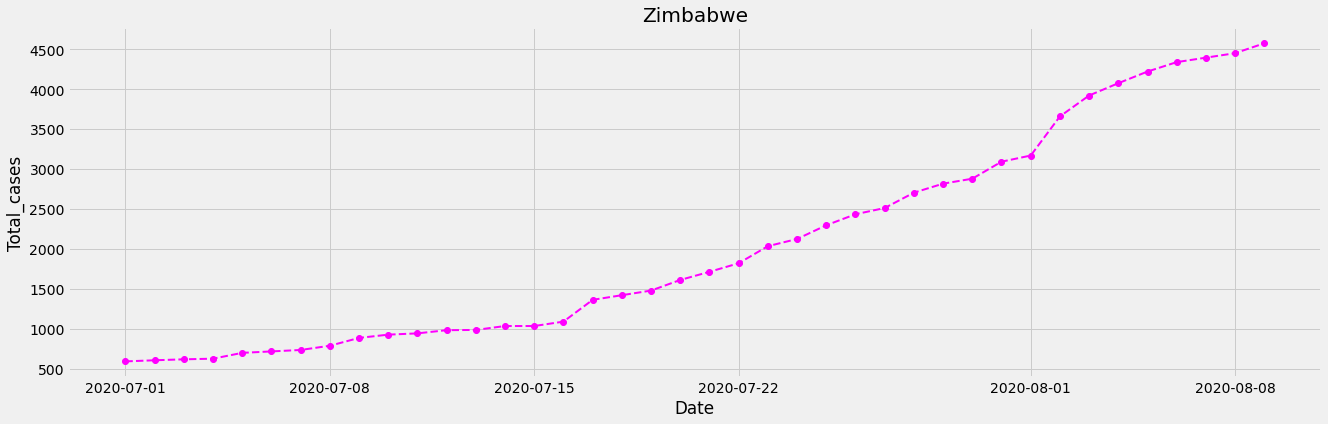

In [8]:
#Call the function latest_pattern() by passing the dataframe df
latest_pattern(df)

# ARIMA(Auto Regressive Integrated Moving Average) Model

**ARIMA is a very popular statistical method for time series forecasting. ARIMA stands for Auto-Regressive Integrated Moving Averages. ARIMA models work on the following assumptions –**

* The data series is stationary, which means that the mean and variance should not vary with time. A series can be made stationary by using log transformation or differencing the series.
* The data provided as input must be a univariate series, since arima uses the past values to predict the future values.

**ARIMA has three components – AR (autoregressive term), I (differencing term) and MA (moving average term). Let us understand each of these components –**

* AR term refers to the past values used for forecasting the next value. The AR term is defined by the parameter ‘p’ in arima. The value of ‘p’ is determined using the PACF plot.
* MA term is used to defines number of past forecast errors used to predict the future values. The parameter ‘q’ in arima represents the MA term. ACF plot is used to identify the correct ‘q’ value.
* Order of differencing  specifies the number of times the differencing operation is performed on series to make it stationary

# India Predictions

Using ARIMA model predicting the number of covid cases from August 1st to August 9th of 2020. The csv file which we using in this project contains COVID cases data from December 31st of 2019 to August 9th of 2020. 

In [9]:
#Get the cases history of India from the dataframe df and store it in a variable India_df
India_df= covid[covid['location']== "India"]
#Get the date and total_cases of the dataframe India_df and store it in the same dataframe
India_df = India_df[['date','total_cases']]

In [10]:
#Converting the date column into datetime using pd.datetimeI()
India_df['date'] = pd.to_datetime(India_df['date'])
#Checking the data type of the column date
print("Data type of India_df :",India_df['date'].dtypes)
#Slice the 
India_df = India_df[(India_df['date'].dt.month == 7) | (India_df['date'].dt.month == 8) ]
India_df.reset_index(drop=True, inplace=True)
India_df.tail()

Data type of India_df : datetime64[ns]


date  total_cases
35 2020-08-05    1908254.0
36 2020-08-06    1964536.0
37 2020-08-07    2027074.0
38 2020-08-08    2088611.0
39 2020-08-09    2153010.0

In [11]:
#Using to_list() and converting the total_cases column of India_df into list
#And storing the list into a variable confirmedcases_India
confirmedcases_India = India_df['total_cases'].to_list()
#Printing the length of confirmedcases_India
print("The length of confirmedcases_India is : ", len(confirmedcases_India))

The length of confirmedcases_India is :  40


In [12]:
#Storing the India_df's total_cases columns as series into variable plotconf
plotconf = India_df['total_cases']

<font color = 'teal'>Plotting the Autucorrelation Function and Partial Autocorrelation Function<font />

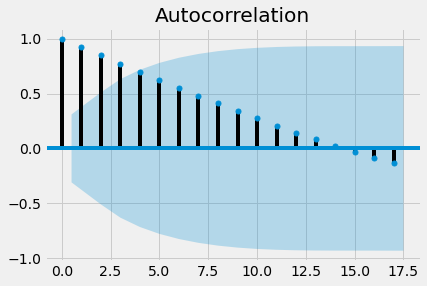

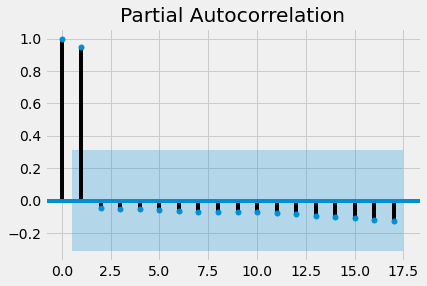

In [13]:
#Plotting the autocorrelation function of plotconf
plot_acf(plotconf)
plt.show()
#Plotting the partial autocorrelation function plotconf
plot_pacf(plotconf)
plt.show()

In [14]:
#Define the model by calling ARIMA() and passing in the p, d, and q(10,2,0) parameters and confirmedcases_India 
model_arima=ARIMA(confirmedcases_India[0:31],(10,2,0))
#Fit the model
model_arima_fit=model_arima.fit()
#Forecast the next nine days(from August 1st,2020 to August 9th,2020)
prediction_arima=model_arima_fit.forecast(9)[0]
#Printing the predicted values
print("Predictions :",prediction_arima)
#Printing the metric Akaike Information Critera(AIC) of model_arima_fit
print("AIC value of this ARIMA model : ",model_arima_fit.aic)

Predictions : [1693287.00217678 1747689.90113532 1802471.45021112 1857842.92554785
 1914514.95002075 1974233.0730838  2036002.77926379 2098004.03796924
 2159735.20449407]
AIC value of this ARIMA model :  523.4220881146836


In [15]:
plotingconfirmed_India = India_df[0:31].copy()

In [16]:
plotingconfirmed_India.tail()

date  total_cases
26 2020-07-27    1435453.0
27 2020-07-28    1483156.0
28 2020-07-29    1531669.0
29 2020-07-30    1583792.0
30 2020-07-31    1638870.0

In [17]:
#Make a list of dates for which the covid-19 cases needed to be predicted 
#And store that in a variable oneweekdates
oneweekdates = ['2020-08-01','2020-08-02','2020-08-03','2020-08-04','2020-08-05','2020-08-06','2020-08-07','2020-08-08','2020-08-09']

In [18]:
#Intialise j=1
j=1
#Iterate through len(oneweekdates)
for i in range(len(oneweekdates)):
    #Adding the onewwekdates into plottingconfirmed_India's date column 
    plotingconfirmed_India.loc[30+j,'date'] = oneweekdates[i]
    #Adding the prediction_arima into plottingconfirmed_India's total_cases column 
    plotingconfirmed_India.loc[30+j,'total_cases'] =int(prediction_arima[i])
    j=j+1

In [19]:
# Changing the date column of plotingconfirmed_India dataframe as datetime 
plotingconfirmed_India['date'] = pd.to_datetime(plotingconfirmed_India['date'])
#Making the date column as index
plotingconfirmed_India = plotingconfirmed_India.set_index('date')

# Changing the date column of India_df dataframe as datetime 
India_df['date'] = pd.to_datetime(India_df['date'])
#Making the date column as index
India_df = India_df.set_index('date')


<font color = 'teal'> Plotting the ARIMA predicted COVID cases in India (from August 10th,2020 to August 16th,2020) and original cases(from July 1st,2020 to August 9th,2020) from the csv file<font />

(array([737607., 737614., 737621., 737628., 737638., 737645.]),
 <a list of 6 Text major ticklabel objects>)

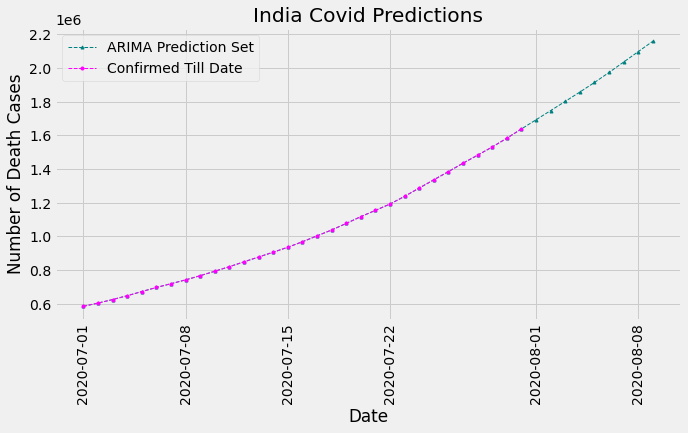

In [20]:
plt.figure(figsize=(10,5))
#Plotting the ARIMA predicted value 
plt.plot(plotingconfirmed_India["total_cases"],label="ARIMA Prediction Set",marker="^",color='teal', linestyle='dashed',linewidth=1, markersize=3)
plt.plot(India_df["total_cases"][:31],label="Confirmed Till Date",marker="o",color='magenta', linestyle='dashed',linewidth=1, markersize=3)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Number of Death Cases")
plt.title("India Covid Predictions")
plt.xticks(rotation=90)

# Predicted VS Actual India COVID-19 cases

In [21]:
#Creating a new dataframe India_Actual_Predicted holding the predicted and actual values
India_Actual_Predicted = plotingconfirmed_India[31:]
#Renaming the  total_cases column as Predicted_cases 
India_Actual_Predicted.rename(columns={"total_cases": "Predicted_cases"},inplace=True)
#Creating a column Actual_cases and storing the India_df['total_cases']
India_Actual_Predicted['Actual_cases'] = India_df["total_cases"][31:]
#Printing the Dataframe India_Actual_Predicted
India_Actual_Predicted.head(9)

Predicted_cases  Actual_cases
date                                     
2020-08-01        1693287.0     1695988.0
2020-08-02        1747689.0     1750723.0
2020-08-03        1802471.0     1803695.0
2020-08-04        1857842.0     1855745.0
2020-08-05        1914514.0     1908254.0
2020-08-06        1974233.0     1964536.0
2020-08-07        2036002.0     2027074.0
2020-08-08        2098004.0     2088611.0
2020-08-09        2159735.0     2153010.0

<Figure size 2880x2880 with 0 Axes>

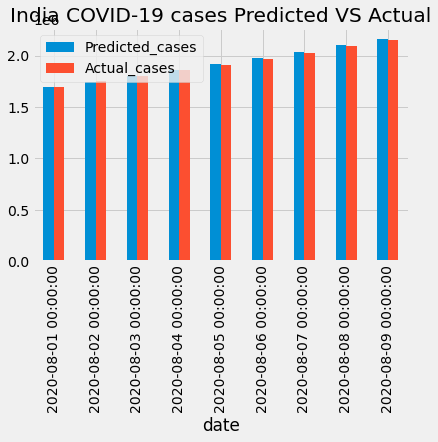

In [22]:
plt.figure(figsize=(40,40))
India_Actual_Predicted[['Predicted_cases','Actual_cases']].plot(kind='bar')
plt.title("India COVID-19 cases Predicted VS Actual")
plt.show()

# Brazil COVID predictions

In [23]:
#Get the cases history of US from the dataframe df and store it in a variable India_df
Brazil_df= covid[covid['location']== "Brazil"]
#Get the date and total_cases of the dataframe US_df and store it in the same dataframe
Brazil_df = Brazil_df[['date','total_cases']]

In [24]:
#Converting the date column into datetime using pd.datetimeI()
Brazil_df['date'] = pd.to_datetime(Brazil_df['date'])
#Checking the data type of the column date
print("Data type of India_df :",Brazil_df['date'].dtypes)
#Slice the dataframe US_df July and August covid cases
Brazil_df = Brazil_df[(Brazil_df['date'].dt.month == 7) | (Brazil_df['date'].dt.month == 8) ]
Brazil_df.reset_index(drop=True, inplace=True)
Brazil_df.tail()

Data type of India_df : datetime64[ns]


date  total_cases
35 2020-08-05    2801921.0
36 2020-08-06    2859073.0
37 2020-08-07    2912212.0
38 2020-08-08    2962442.0
39 2020-08-09    3012412.0

In [25]:
#Using to_list() and converting the total_cases column of Brazil_df into list
#And storing the list into a variable confirmedcases_Brazil
confirmedcases_Brazil = Brazil_df['total_cases'].to_list()
#Print the length of confirmedcases_Brazil
print("The length of confirmedcases_Brazil is : ",len(confirmedcases_Brazil))

The length of confirmedcases_Brazil is :  40


In [26]:
#Storing the Brazil_df's total_cases columns as series into variable plotconf
plotconf = Brazil_df['total_cases']

<font color = 'teal'>Plotting the Autucorrelation Function and Partial Autocorrelation Function<font />

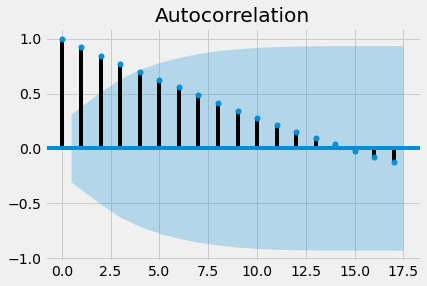

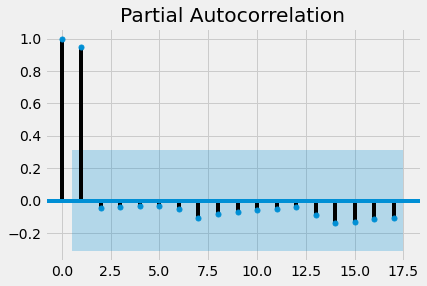

In [27]:
#Plotting the autocorrelation function of plotconf
plot_acf(plotconf)
plt.show()
#Plotting the partial autocorrelation function of plotconf
plot_pacf(plotconf)
plt.show()

In [28]:
#Define the model by calling ARIMA() and passing in the p, d, and q(10,2,0) parameters and confirmedcases_Brazil 
model_arima=ARIMA(confirmedcases_Brazil,(6,1,1))
#Fit the model
model_arima_fit=model_arima.fit()
#Forecast the covid-19 cases next nine days(from August 1st,2020 to August 9th,2020)
prediction_arima=model_arima_fit.forecast(9)[0]
#Printing the predicted values
print("Predictions :",prediction_arima)
#Printing the metric Akaike Information Critera(AIC) of model_arima_fit
print("AIC value of this ARIMA model : ",model_arima_fit.aic)

Predictions : [3037959.52272404 3065654.18362851 3108960.80762793 3159315.69458576
 3208295.96108686 3261996.87170544 3304975.84410345 3334358.02818982
 3365277.31406119]
AIC value of this ARIMA model :  829.385291729228


In [29]:
plotingconfirmed_Brazil = Brazil_df[0:31].copy()
plotingconfirmed_Brazil.tail()

date  total_cases
26 2020-07-27    2419091.0
27 2020-07-28    2442375.0
28 2020-07-29    2483191.0
29 2020-07-30    2552265.0
30 2020-07-31    2610102.0

In [30]:
#Make a list of dates for which the covid-19 cases needed to be predicted 
#And store that in a variable oneweekdates
oneweekdates = ['2020-08-01','2020-08-02','2020-08-03','2020-08-04','2020-08-05','2020-08-06','2020-08-07','2020-08-08','2020-08-09']

In [31]:
#Intialise j=1
j=1
#Iterate through len(oneweekdates)
for i in range(len(oneweekdates)):
     #Adding the onewwekdates into plottingconfirmed_Brazil's date column 
    plotingconfirmed_Brazil.loc[30+j,'date'] = oneweekdates[i]
    #Adding the prediction_arima into plottingconfirmed_Brazil's total_cases column
    plotingconfirmed_Brazil.loc[30+j,'total_cases'] =int(prediction_arima[i])
    j=j+1

In [32]:
# Changing the date column of plotingconfirmed_India dataframe as datetime 
plotingconfirmed_Brazil['date'] = pd.to_datetime(plotingconfirmed_Brazil['date'])
#Making the date column as index
plotingconfirmed_Brazil = plotingconfirmed_Brazil.set_index('date')

# Changing the date column of India_df dataframe as datetime 
Brazil_df['date'] = pd.to_datetime(Brazil_df['date'])
#Making the date column as index
Brazil_df = Brazil_df.set_index('date')

<font color = 'teal'> Plotting the ARIMA predicted COVID cases in Brazil (from August 10th,2020 to August 16th,2020) and original cases(from July 1st,2020 to August 9th,2020) from the csv file<font />

(array([737607., 737614., 737621., 737628., 737638., 737645.]),
 <a list of 6 Text major ticklabel objects>)

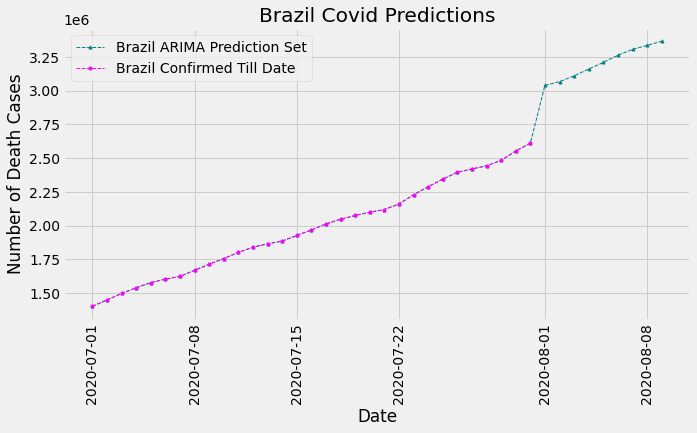

In [34]:
plt.figure(figsize=(10,5))
plt.plot(plotingconfirmed_Brazil["total_cases"],label="Brazil ARIMA Prediction Set",marker="^",color='teal', linestyle='dashed',linewidth=1, markersize=3)
plt.plot(Brazil_df["total_cases"][:31],label="Brazil Confirmed Till Date",marker="o",color='magenta', linestyle='dashed',linewidth=1, markersize=3)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Number of Death Cases")
plt.title("Brazil Covid Predictions")
plt.xticks(rotation=90)

# Prediction VS Actual COVID-19 Cases in Brazil

In [35]:
#Creating a new dataframe Brazil_Actual_Predicted holding the predicted and actual values
Brazil_Actual_Predicted = plotingconfirmed_Brazil[31:]
#Renaming the  total_cases column as Predicted_cases 
Brazil_Actual_Predicted.rename(columns={"total_cases": "Predicted_cases"},inplace=True)
#Creating a column Actual_cases and storing the Brazil_df['total_cases']
Brazil_Actual_Predicted['Actual_cases'] = Brazil_df["total_cases"][31:]
#Printing the Dataframe India_Actual_Predicted
Brazil_Actual_Predicted.head(9)

Predicted_cases  Actual_cases
date                                     
2020-08-01        3037959.0     2662485.0
2020-08-02        3065654.0     2707877.0
2020-08-03        3108960.0     2733677.0
2020-08-04        3159315.0     2750318.0
2020-08-05        3208295.0     2801921.0
2020-08-06        3261996.0     2859073.0
2020-08-07        3304975.0     2912212.0
2020-08-08        3334358.0     2962442.0
2020-08-09        3365277.0     3012412.0

<Figure size 2880x2880 with 0 Axes>

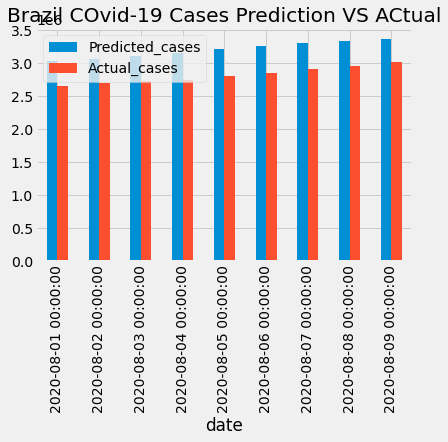

In [36]:
#plt.figure()
plt.figure(figsize=(40,40))
#Brazil_Actual_Predicted.plot.barh(rot=0)
#Brazil_Actual_Predicted.plot(kind='bar',grid=True,subplots=True,sharex=True); 
#Brazil_Actual_Predicted.plot( kind= 'barh' , secondary_y= 'Predicted_cases' , rot= 0 )
Brazil_Actual_Predicted[['Predicted_cases','Actual_cases']].plot(kind='bar')
plt.title("Brazil COvid-19 Cases Prediction VS ACtual")
plt.show()
#plt.legend(loc='upper left')
#import seaborn as sns
#sns.scatterplot(x='date', y="Predicted_cases",data=Brazil_Actual_Predicted)
#plt.bar(Brazil_Actual_Predicted['Predicted_cases'], Brazil_Actual_Predicted['Actual_cases'])
#sns.barplot(x=Brazil_Actual_Predicted.index, y=Brazil_Actual_Predicted[['Predicted_cases', 'Actual_cases']])

# Russia COVID predictions 

In [37]:
#Get the cases history of US from the dataframe df and store it in a variable India_df
Russia_df= covid[covid['location']== "Russia"]
#Get the date and total_cases of the dataframe US_df and store it in the same dataframe
Russia_df = Russia_df[['date','total_cases']]

In [38]:
#Converting the date column into datetime using pd.datetimeI()
Russia_df['date'] = pd.to_datetime(Russia_df['date'])
#Checking the data type of the column date
print("Data type of Russia_df :",Russia_df['date'].dtypes)
#Slice the dataframe US_df July and August covid cases
Russia_df = Russia_df[(Russia_df['date'].dt.month == 7) | (Russia_df['date'].dt.month == 8) ]
Russia_df.reset_index(drop=True, inplace=True)
Russia_df.tail()

Data type of Russia_df : datetime64[ns]


date  total_cases
35 2020-08-05     861423.0
36 2020-08-06     867343.0
37 2020-08-07     871894.0
38 2020-08-08     877135.0
39 2020-08-09     882347.0

In [39]:
#Using to_list() and converting the total_cases column of Russia_df into list
#And storing the list into a variable confirmedcases_Russia
confirmedcases_Russia = Russia_df['total_cases'].to_list()
#Print the length of confirmedcases_Russia
len(confirmedcases_Russia)

40

In [40]:
#Storing the Russia_df's total_cases columns as series into variable plotconf
plotconf = Russia_df['total_cases']

<font color ='teal'>Autocorrelation Function and Partial Autocorrelation Function  <font />


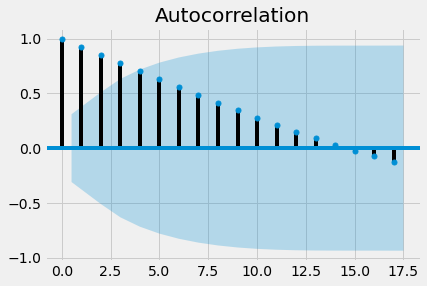

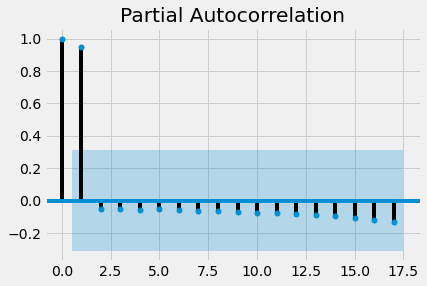

In [41]:
#Ploting the autocorrealtaion funtion of plotconf
plot_acf(plotconf)
plt.show()
#PLoting the partial autocorrelation of plotconf
plot_pacf(plotconf)
plt.show()

In [42]:
#Define the model by calling ARIMA() and passing in the p, d, and q(10,2,0) parameters and confirmedcases_Russia 
model_arima=ARIMA(confirmedcases_Russia,(1,1,1))
#Fit the model
model_arima_fit=model_arima.fit()
#Forecast the covid-19 cases next nine days(from August 1st,2020 to August 9th,2020)
prediction_arima=model_arima_fit.forecast(10)[0]
#Printing the predicted values
print("Predictions :",prediction_arima)
#Printing the metric Akaike Information Critera(AIC) of model_arima_fit
print("AIC value of this ARIMA model : ",model_arima_fit.aic)

Predictions : [887400.78618748 894047.85879432 900016.86494171 906274.44075106
 912409.20787603 918596.23958369 924761.02867376 930935.28371594
 937105.51026422 943277.45124787]
AIC value of this ARIMA model :  682.4415286635918


C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [43]:
plotingconfirmed_Russia = Russia_df[0:31].copy()
plotingconfirmed_Russia.tail()

date  total_cases
26 2020-07-27     812485.0
27 2020-07-28     818120.0
28 2020-07-29     823515.0
29 2020-07-30     828990.0
30 2020-07-31     834499.0

In [44]:
#Make a list of dates for which the covid-19 cases needed to be predicted 
#And store that in a variable oneweekdates
oneweekdates = ['2020-08-01','2020-08-02','2020-08-03','2020-08-04','2020-08-05','2020-08-06','2020-08-07','2020-08-08','2020-08-09']

In [45]:
#Intialise j=1
j=1
#Iterate through len(oneweekdates)
for i in range(len(oneweekdates)):
    #Adding the onewwekdates into plottingconfirmed_Russia's date column
    plotingconfirmed_Russia.loc[30+j,'date'] = oneweekdates[i]
    #Adding the prediction_arima into plottingconfirmed_Russia's total_cases column
    plotingconfirmed_Russia.loc[30+j,'total_cases'] =int(prediction_arima[i])
    j=j+1

In [46]:
# Changing the date column of plotingconfirmed_India dataframe as datetime 
plotingconfirmed_Russia['date'] = pd.to_datetime(plotingconfirmed_Russia['date'])
#Making the date column as index
plotingconfirmed_Russia = plotingconfirmed_Russia.set_index('date')

# Changing the date column of India_df dataframe as datetime 
Russia_df['date'] = pd.to_datetime(Russia_df['date'])
#Making the date column as index
Russia_df = Russia_df.set_index('date')

<font color = 'teal'> Plotting the ARIMA predicted COVID cases in Russia (from August 10th,2020 to August 16th,2020) and original cases(from July 1st,2020 to August 9th,2020) from the csv file<font />

(array([737607., 737614., 737621., 737628., 737638., 737645.]),
 <a list of 6 Text major ticklabel objects>)

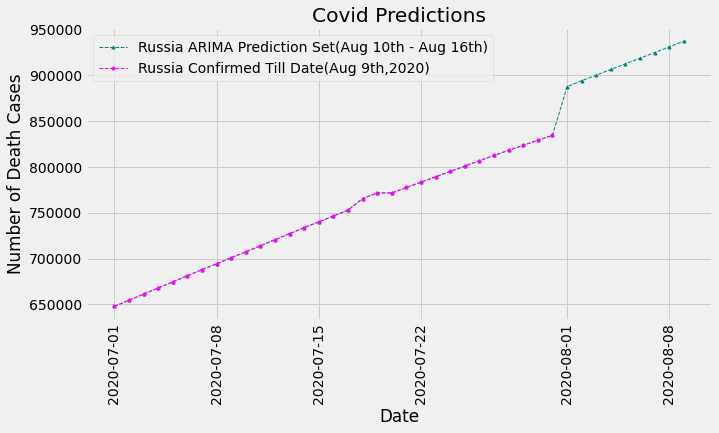

In [47]:
plt.figure(figsize=(10,5))
plt.plot(plotingconfirmed_Russia["total_cases"],label="Russia ARIMA Prediction Set(Aug 10th - Aug 16th)",marker="^",color='teal', linestyle='dashed',linewidth=1, markersize=3)
plt.plot(Russia_df["total_cases"][0:31],label="Russia Confirmed Till Date(Aug 9th,2020)",marker="o",color='magenta', linestyle='dashed',linewidth=1, markersize=3)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Number of Death Cases")
plt.title("Covid Predictions")
plt.xticks(rotation=90)

# Prediction VS Actual COVID-19 cases in Russia

In [48]:
#Creating a new dataframe Russia_Actual_Predicted holding the predicted and actual values
Russia_Actual_Predicted = plotingconfirmed_Russia[31:]
#Renaming the  total_cases column as Predicted_cases 
Russia_Actual_Predicted.rename(columns={"total_cases": "Predicted_cases"},inplace=True)
#Creating a column Actual_cases and storing the Russia_df['total_cases']
Russia_Actual_Predicted['Actual_cases'] = Russia_df["total_cases"][31:]
#Printing the Dataframe India_Actual_Predicted
Russia_Actual_Predicted.head(9)

Predicted_cases  Actual_cases
date                                     
2020-08-01         887400.0      839981.0
2020-08-02         894047.0      845443.0
2020-08-03         900016.0      850870.0
2020-08-04         906274.0      856264.0
2020-08-05         912409.0      861423.0
2020-08-06         918596.0      867343.0
2020-08-07         924761.0      871894.0
2020-08-08         930935.0      877135.0
2020-08-09         937105.0      882347.0

<Figure size 2880x2880 with 0 Axes>

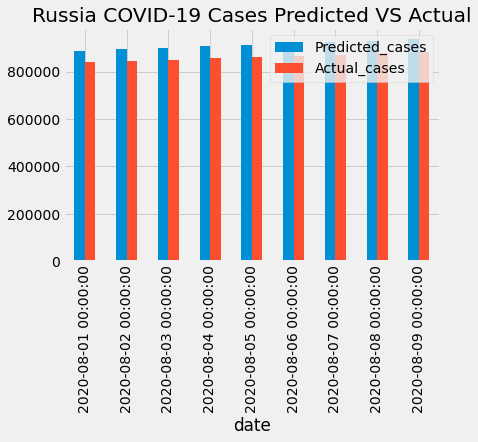

In [52]:
plt.figure(figsize=(40,40))
Russia_Actual_Predicted[['Predicted_cases','Actual_cases']].plot(kind='bar')
plt.title("Russia COVID-19 Cases Predicted VS Actual")
plt.show()